# Analysis

## Data
Struktur der Daten: Instanzname, Optimierungsstatus (Feasible oder Optimal), Fitness-Value, Lower Bound, Runtime (limitiert auf 3600 Sekunden), gefolgt von den Ergebnisvektoren, die aber für die Analyse eher zweitrangig sind

### Imports

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from benchmarkrewriter.benchmark_parser import WorkerBenchmarkParser, BenchmarkParser
import statistics

In [11]:
file = r'C:\Users\huda\Downloads\results_ortools.txt'
file = r'C:\Users\huda\Downloads\results_cplex_cp.txt'
file_content = pd.read_csv(file, names=['name','optimization_status','fitness_value','lower_bound', 'runtime', 'result_vector1', 'result_vector2', 'result_vector3', 'peak_cpu', 'peak_ram', 'resource_history', 'best_result_history'], sep=';')#, converters={'best_result_history': pd.eval})
data = pd.DataFrame(file_content)

data

name  optimization_status  fitness_value  \
0    0_BehnkeGeiger_10_workers.fjs                  0.0          125.0   
1    0_BehnkeGeiger_11_workers.fjs                  0.0          228.0   
2    0_BehnkeGeiger_12_workers.fjs                  0.0          223.0   
3    0_BehnkeGeiger_13_workers.fjs                  0.0          234.0   
4    0_BehnkeGeiger_14_workers.fjs                  0.0          238.0   
..                             ...                  ...            ...   
397        6_Fattahi_5_workers.fjs                  1.0          117.0   
398        6_Fattahi_6_workers.fjs                  1.0          305.0   
399        6_Fattahi_7_workers.fjs                  1.0          386.0   
400        6_Fattahi_8_workers.fjs                  1.0          240.0   
401        6_Fattahi_9_workers.fjs                  1.0          199.0   

     lower_bound   runtime                                     result_vector1  \
0           76.0  1200.180  [48, 78, 88, 100, 116, 48, 64, 74, 86, 105, 0,...   
1           74.0  1200.270  [94, 112, 121, 133, 166, 108, 123, 134, 160, 1...   
2           72.0  1200.270  [152, 171, 183, 192, 204, 20, 31, 73, 89, 98, ...   
3           76.0  1200.070  [134, 155, 165, 176, 193, 0, 9, 18, 29, 43, 79...   
4           82.0  1200.280  [9, 132, 158, 179, 198, 76, 90, 112, 127, 154,...   
..           ...       ...                                                ...   
397        117.0     0.077                             [0, 55, 0, 93, 35, 55]   
398        305.0     0.094               [0, 18, 57, 57, 87, 231, 0, 55, 220]   
399        386.0     0.026             [0, 113, 240, 0, 162, 217, 0, 79, 156]   
400        240.0     0.256               [27, 53, 80, 0, 27, 79, 27, 80, 148]   
401        199.0     0.104                [0, 48, 86, 0, 86, 142, 0, 48, 111]   

                                        result_vector2  \
0    [0, 4, 6, 4, 16, 2, 12, 9, 5, 16, 0, 14, 15, 6...   
1    [3, 11, 15, 12, 16, 3, 8, 15, 12, 16, 2, 4, 12...   
2    [0, 11, 14, 11, 16, 2, 9, 7, 12, 19, 1, 4, 5, ...   
3    [2, 8, 7, 8, 16, 0, 5, 14, 13, 16, 0, 8, 9, 12...   
4    [3, 9, 9, 5, 16, 2, 13, 13, 5, 19, 1, 5, 12, 8...   
..                                                 ...   
397                                 [1, 0, 0, 1, 0, 1]   
398                        [0, 0, 1, 0, 0, 2, 1, 2, 1]   
399                        [1, 1, 4, 2, 2, 2, 0, 3, 3]   
400                        [1, 1, 3, 0, 3, 2, 0, 1, 2]   
401                        [1, 0, 2, 2, 0, 2, 0, 1, 1]   

                                        result_vector3  peak_cpu  peak_ram  \
0    [2, 20, 25, 7, 10, 10, 6, 10, 15, 11, 5, 15, 2...       0.0       0.0   
1    [8, 0, 19, 16, 16, 6, 10, 19, 21, 22, 1, 27, 2...       0.0       0.0   
2    [18, 18, 25, 13, 3, 18, 4, 19, 25, 10, 29, 1, ...       0.0       0.0   
3    [25, 19, 13, 8, 20, 17, 13, 17, 6, 19, 6, 23, ...       0.0       0.0   
4    [3, 24, 7, 6, 25, 21, 29, 3, 10, 20, 4, 19, 13...       0.0       0.0   
..                                                 ...       ...       ...   
397                                 [2, 2, 1, 1, 1, 1]       0.0       0.0   
398                        [3, 3, 0, 3, 3, 3, 2, 1, 1]       0.0       0.0   
399                        [1, 0, 0, 4, 5, 1, 0, 6, 2]       0.0       0.0   
400                        [2, 1, 3, 2, 3, 5, 0, 2, 1]       0.0       0.0   
401                        [3, 1, 1, 2, 2, 2, 0, 3, 0]       0.0       0.0   

                                      resource_history  \
0    [(0, 0), (35.0, 28.0), (91.4, 28.4), (100.0, 2...   
1    [(0, 0), (43.9, 28.3), (69.2, 28.4), (68.4, 28...   
2    [(0, 0), (44.6, 27.9), (67.1, 28.3), (53.4, 28...   
3    [(0, 0), (46.5, 27.9), (70.6, 28.0), (75.0, 28...   
4    [(0, 0), (46.3, 27.7), (67.5, 27.8), (75.1, 28...   
..                                                 ...   
397  [(0, 0), (18.5, 26.3), (0.0, 26.3), (0.0, 26.3...   
398  [(0, 0), (18.1, 26.2), (0.0, 26.2), (0.0, 26.2...   
399         

In [12]:
data.loc[data['name'].str.startswith('Error')]

name  optimization_status  \
60  Error on instance 1_Brandimarte_10_workers.fjs...                  NaN   
73  Error on instance 1_Brandimarte_8_workers.fjs ...                  NaN   

    fitness_value  lower_bound  runtime result_vector1 result_vector2  \
60            NaN          NaN      NaN            NaN            NaN   
73            NaN          NaN      NaN            NaN            NaN   

   result_vector3  peak_cpu  peak_ram resource_history best_result_history  
60            NaN       NaN       NaN              NaN                 NaN  
73            NaN       NaN       NaN              NaN                 NaN

In [13]:
#data.drop(data['name'].str.startswith('Error').index, inplace=True)

In [14]:
data = data[~data['name'].str.startswith('Error')]

In [15]:
data.loc[data['name'].str.startswith('Error')]

Empty DataFrame
Columns: [name, optimization_status, fitness_value, lower_bound, runtime, result_vector1, result_vector2, result_vector3, peak_cpu, peak_ram, resource_history, best_result_history]
Index: []

In [16]:
data.loc[data['optimization_status'] > 0.0].count()

name                   55
optimization_status    55
fitness_value          55
lower_bound            55
runtime                55
result_vector1         55
result_vector2         55
result_vector3         55
peak_cpu               55
peak_ram               55
resource_history       55
best_result_history    55
dtype: int64

### Basic dataset characteristics

In [17]:
print(f"Dimensions of dataset: {data.shape} \n")
print(data.info())

Dimensions of dataset: (400, 12) 

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 401
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 400 non-null    object 
 1   optimization_status  400 non-null    float64
 2   fitness_value        400 non-null    float64
 3   lower_bound          400 non-null    float64
 4   runtime              400 non-null    float64
 5   result_vector1       400 non-null    object 
 6   result_vector2       400 non-null    object 
 7   result_vector3       400 non-null    object 
 8   peak_cpu             400 non-null    float64
 9   peak_ram             400 non-null    float64
 10  resource_history     400 non-null    object 
 11  best_result_history  400 non-null    object 
dtypes: float64(6), object(6)
memory usage: 40.6+ KB
None


In [18]:
print(f"\nUnique values for 'name': {data['name'].nunique()}")
print(f"\nUnique values for 'optimization_status': {data['optimization_status'].nunique()}")


Unique values for 'name': 400

Unique values for 'optimization_status': 2


In [19]:
data.describe()

optimization_status  fitness_value  lower_bound      runtime  peak_cpu  \
count           400.000000      400.00000   400.000000   400.000000     400.0   
mean              0.137500     1203.70750   782.240000  1050.202127       0.0   
std               0.344806     1545.52442  1031.288817   385.565368       0.0   
min               0.000000        7.00000     7.000000     0.022000       0.0   
25%               0.000000      480.50000   351.250000  1200.020000       0.0   
50%               0.000000      824.00000   598.500000  1200.040000       0.0   
75%               0.000000     1101.75000   697.250000  1200.142500       0.0   
max               1.000000     7975.00000  6832.000000  1224.460000       0.0   

       peak_ram  
count     400.0  
mean        0.0  
std         0.0  
min         0.0  
25%         0.0  
50%         0.0  
75%         0.0  
max         0.0

## Report

Kennzahlen zu der jeweiligen Benchmarkinstanz (für alle Instanzen), inklusive Anzahl Maschinen, Operationen, Flexibilität und Duration Variety, und eine statistische Analyse (normalerweise eher in Form von Plots), wie zBsp:

- Laufzeit im Vergleich zu der Problemgröße (Anzahl Operationen)
- Laufzeit im Vergleich zur Flexibilität
- Laufzeit im Vergleich zur Duration Variety
- Wie viel % der Instanzen konnten tatsächlich gelöst werden ( Status = Optimal)
- Das Ganze für alle Instanzen als Gesamtübersicht und dann zum Vergleich auch noch aufgeteilt auf die einzelnen Instanzgruppen (Quellen der Benchmarkinstanzen)

Die Flexibilität ist Durchschnittliche Anzahl von verfügbaren Maschinen für jede Operation / Gesamtanzahl Maschinen im System
Die Duration Variety ist Anzahl unterschiedlicher Duration Values in der Benchmarkinstanz / Gesamtanzahl von Duration Values der Instanz

### Methods

In [20]:
# assembles the path of the FJSSPinstanes for a given name
def get_path(name: str):
    path = "../external_test_data/FJSSPinstances"
    path = r'C:\Users\dhutt\Downloads\benchmarks_with_workers\benchmarks_with_workers\\'
    return path + name
    if name.startswith("0"):
        path += "/0_BehnkeGeiger/" + name 
    elif name.startswith("1"):
        path += "/1_Brandimarte/" + name
    elif name.startswith("2a"):
        path += "/2a_Hurink_sdata/" + name
    elif name.startswith("2b"):
        path += "/2b_Hurink_edata/" + name 
    elif name.startswith("2c"):
        path += "/2c_Hurink_rdata/" + name 
    elif name.startswith("2d"):
        path += "/2d_Hurink_vdata/" + name 
    elif name.startswith("3"):
        path += "/3_DPpaulli/" + name 
    elif name.startswith("4"):
        path += "/4_ChambersBarnes/" + name
    elif name.startswith("5"):
        path += "/5_Kacem/" + name
    elif name.startswith("6"):
        path += "/6_Fattahi/" + name

    return path# + ".fjs"

In [21]:
#Die Flexibilität ist Durchschnittliche Anzahl von verfügbaren Maschinen für jede Operation / Gesamtanzahl Maschinen im System.
def calculate_flexibility(machines_for_all_operations, n_machines): 
    counts = []

    for m in machines_for_all_operations:
        counts.append(len(m))
    
    return statistics.mean(counts) / n_machines

#Die Duration Variety ist Anzahl unterschiedlicher Duration Values in der Benchmarkinstanz / Gesamtanzahl von Duration Values der Instanz.
def calculate_duration_variety(durations):
    counts = []

    for d in durations:
        counts.append(len(d))

    return len(set(counts)) / len(counts)

In [22]:
# prints how many instances could be solved and shows the distribution of optimization status in the provided dataset
def solved_instances(data):
    # Wie viel % der Instanzen konnten tatsächlich gelöst werden ( Status = Optimal)
    solved_instances = ([x for i, x in data.iterrows() if x["optimization_status"] == "Optimal"])
    
    print(f"{len(solved_instances) / len(data) * 100}% of all instances could be solved")
    
    fig, ax = plt.subplots(figsize=(6, 4))
    values = data["optimization_status"].value_counts()
    ax.pie(values, labels = values.index.tolist(), autopct='%1.1f%%') # donut: wedgeprops=dict(width=0.5), startangle=-40
    ax.set_title("Optimization status")
    plt.show()
    
# plots runtime vs problem size
def runtime_vs_problem_size(data, extracted_attributes): 
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(data["runtime"], extracted_attributes["n_operations"], 'o')
    ax.set_title("Runtime in comparison to problem size (number of operations)")
    ax.set_xlabel("Runtime (in seconds)")
    ax.set_ylabel("Number of operations")
    plt.show()

# plots runtime vs flexibility
def runtime_vs_flexibility(data, extracted_attributes): 
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(data["runtime"], extracted_attributes["flexibility"], 'o')
    ax.set_title("Runtime in comparison to flexibility")
    ax.set_xlabel("Runtime (in seconds)")
    ax.set_ylabel("Flexibility")
    plt.show()

# plots runtime vs duration variety
def runtime_vs_duration_variety(data, extracted_attributes): 
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(data["runtime"], extracted_attributes["duration_variety"], 'o')
    ax.set_title("Runtime in comparison to duration variety")
    ax.set_xlabel("Runtime (in seconds)")
    ax.set_ylabel("Flexibility")
    plt.show()

# plots optimization status vs fitness value
def optimization_status_vs_fitness_value(data): 
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(data["optimization_status"], data["fitness_value"])
    ax.set_title("optimization status in comparison to fitness value")
    ax.set_xlabel("optimization status")
    ax.set_ylabel("Fitness value")
    plt.show()

# plots n_jobs vs n_machines and n_machines vs n_operations
def jobs_machines_operations(extracted_attributes): 
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(extracted_attributes["n_machines"], extracted_attributes["n_operations"])
    ax.set_title("n_machines in comparison to n_operations")
    ax.set_xlabel("Number of machines")
    ax.set_ylabel("Number of operations")

    fig2, ax2 = plt.subplots(figsize=(6, 4))
    ax2.bar(extracted_attributes["n_jobs"], extracted_attributes["n_machines"])
    ax2.set_title("n_jobs in comparison to n_machines")
    ax2.set_xlabel("Number of jobs")
    ax2.set_ylabel("Number of machines")
    
    plt.show()

# plots n_machines vs flexibility
def n_machines_vs_flexibility(extracted_attributes): 
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(extracted_attributes["n_machines"], extracted_attributes["flexibility"], 'o')
    ax.set_title("n_machines in comparison to flexibility")
    ax.set_xlabel("Number of machines")
    ax.set_ylabel("Flexibility")
    plt.show()

# prints all plots defined in the functions above
def show_all_plots(data, extracted_attributes):
    runtime_vs_problem_size(data, extracted_attributes)
    runtime_vs_flexibility(data, extracted_attributes)
    runtime_vs_duration_variety(data, extracted_attributes)
    optimization_status_vs_fitness_value(data)
    jobs_machines_operations(extracted_attributes)
    n_machines_vs_flexibility(extracted_attributes)
    solved_instances(data)

In [23]:
# reads all instances which occur in the input data and converts them into the encoding class
def get_encodings_for_group(group): 
    all_encodings = pd.DataFrame()
    
    for i, row in group.iterrows():
        if not row['name'].startswith('Error'):
            read_path = get_path(row["name"])

            parser = WorkerBenchmarkParser()
            encoding = parser.parse_benchmark(read_path)
        
            extracted_data = {
                "name": [row["name"]],
                "n_jobs": [encoding.n_jobs()], 
                "n_machines": [encoding.n_machines()],
                "n_operations": [encoding.n_operations()],
                "durations": [encoding.durations()],
                "job_sequence": [encoding.job_sequence()],
                "machines_for_all_operations": [encoding.get_all_machines_for_all_operations()]
            }
            df = pd.DataFrame(data=extracted_data)
            df.rename(index={0: i}, inplace=True)
            
            all_encodings = pd.concat([all_encodings, df])
    
    return all_encodings

# creates a dataframe with the neccessary attributes; calculates flexibility and duration variety for each encoding
def extract_data_from_encodings(encodings):
    values = pd.DataFrame()
    
    for i, b in encodings.iterrows():
        extracted_data = {
            "name": [b["name"]],
            "n_jobs": [b["n_jobs"]],
            "n_machines": [b["n_machines"]],
            "n_operations": [b["n_operations"]],  
            "flexibility": [calculate_flexibility(b["machines_for_all_operations"], b["n_machines"])],
            "duration_variety": [calculate_duration_variety(b["durations"])]
        }
    
        df = pd.DataFrame(extracted_data)
        df.rename(index={0: i}, inplace=True)
    
        values = pd.concat([values, df])
    
    return values

In [24]:
# creates list of all test instance names
def create_instance_name_list(name):
    test_instances_with_n = { 
        "Behnke": 60, 
        "BrandimarteMk": 15, 
        "HurinkSdata": 66, 
        "HurinkEdata": 66,
        "HurinkRdata": 66,
        "HurinkVdata": 66,
        "DPpaulli": 18,
        "ChambersBarnes": 21,
        "Kacem": 4,
        "Fattahi": 20
    }

    instance_names = []

    if name != "": 
        n = test_instances_with_n[name]
        for v in range(1, n):
            instance_names.append(name + str(v))
    else:
        for instance, n in test_instances_with_n.items(): 
            for v in range(1, n):
                instance_names.append(instance + str(v))

    return instance_names


# checks if any of the test instances are missing in the data
def instances_missing(df, name = ""):
    instance_names = create_instance_name_list(name)

    missing = []

    for n in instance_names: 
        if not any(df["name"] == n):
            missing.append(n)

    return missing

# returns all test instance names which had errors
def instances_with_errors(df):
    errors = []

    for i, row in df.iterrows():
        if row["optimization_status"] == "Error":
            errors.append(row["name"])

    return errors

def instances_to_be_repeated(df, name = ""): 
    missing = instances_missing(df, name)
    errors = instances_with_errors(df)

    return missing + errors


### Overview

#### Create encodings

In [25]:
benchmark_encodings = get_encodings_for_group(data)
benchmark_encodings

[Errno 2] No such file or directory: 'C:\\Users\\dhutt\\Downloads\\benchmarks_with_workers\\benchmarks_with_workers\\\\0_BehnkeGeiger_10_workers.fjs'


IndexError: list index out of range

In [91]:
benchmark_overview = extract_data_from_encodings(benchmark_encodings)
benchmark_overview

name  n_jobs  n_machines  n_operations  \
0    0_BehnkeGeiger_10_workers.fjs      20          20           100   
1    0_BehnkeGeiger_11_workers.fjs      50          20           250   
2    0_BehnkeGeiger_12_workers.fjs      50          20           250   
3    0_BehnkeGeiger_13_workers.fjs      50          20           250   
4    0_BehnkeGeiger_14_workers.fjs      50          20           250   
..                             ...     ...         ...           ...   
397        6_Fattahi_5_workers.fjs       3           2             6   
398        6_Fattahi_6_workers.fjs       3           3             9   
399        6_Fattahi_7_workers.fjs       3           5             9   
400        6_Fattahi_8_workers.fjs       3           4             9   
401        6_Fattahi_9_workers.fjs       3           3             9   

     flexibility  duration_variety  
0       0.290000          0.010000  
1       0.314400          0.004000  
2       0.322400          0.004000  
3       0.316800          0.004000  
4       0.297600          0.004000  
..           ...               ...  
397     0.666667          0.166667  
398     0.333333          0.111111  
399     0.266667          0.111111  
400     0.333333          0.111111  
401     0.444444          0.111111  

[397 rows x 6 columns]

In [92]:
benchmark_overview.describe()

n_jobs  n_machines  n_operations  flexibility  duration_variety
count  397.000000  397.000000    397.000000   397.000000        397.000000
mean    17.876574   12.926952    145.707809     0.253288          0.014370
std     16.006860   12.162295    104.734442     0.149408          0.025607
min      2.000000    2.000000      4.000000     0.062222          0.002000
25%     10.000000    5.000000     75.000000     0.108667          0.004444
50%     15.000000   10.000000    100.000000     0.216000          0.010000
75%     20.000000   13.000000    225.000000     0.360000          0.013333
max    100.000000   60.000000    500.000000     0.928571          0.250000

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

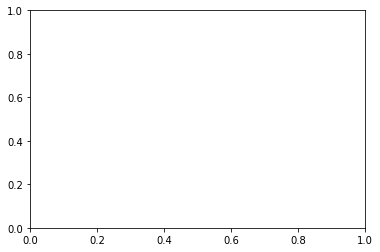

In [93]:
show_all_plots(data, benchmark_overview)

In [ ]:
print(instances_to_be_repeated(data))

['Behnke1', 'Behnke2', 'Behnke3', 'Behnke4', 'Behnke5', 'Behnke6', 'Behnke7', 'Behnke8', 'Behnke9', 'Behnke10', 'Behnke11', 'Behnke12', 'Behnke13', 'Behnke14', 'Behnke15', 'Behnke16', 'Behnke17', 'Behnke18', 'Behnke19', 'Behnke20', 'Behnke21', 'Behnke22', 'Behnke23', 'Behnke24', 'Behnke25', 'Behnke26', 'Behnke27', 'Behnke28', 'Behnke29', 'Behnke30', 'Behnke31', 'Behnke32', 'Behnke33', 'Behnke34', 'Behnke35', 'Behnke36', 'Behnke37', 'Behnke38', 'Behnke39', 'Behnke40', 'Behnke41', 'Behnke42', 'Behnke43', 'Behnke44', 'Behnke45', 'Behnke46', 'Behnke47', 'Behnke48', 'Behnke49', 'Behnke50', 'Behnke51', 'Behnke52', 'Behnke53', 'Behnke54', 'Behnke55', 'Behnke56', 'Behnke57', 'Behnke58', 'Behnke59', 'BrandimarteMk1', 'BrandimarteMk2', 'BrandimarteMk3', 'BrandimarteMk4', 'BrandimarteMk5', 'BrandimarteMk6', 'BrandimarteMk7', 'BrandimarteMk8', 'BrandimarteMk9', 'BrandimarteMk10', 'BrandimarteMk11', 'BrandimarteMk12', 'BrandimarteMk13', 'BrandimarteMk14', 'HurinkSdata1', 'HurinkSdata2', 'HurinkSdat

### Separate instances

#### Behnke

In [ ]:
behnke = pd.DataFrame([x for i, x in data.iterrows() if x["name"].startswith("0_Behnke")])
behnke_encodings = get_encodings_for_group(behnke)
behnke_data = extract_data_from_encodings(behnke_encodings)
behnke_data.describe()

n_jobs  n_machines  n_operations  flexibility  duration_variety
count   60.000000   60.000000     60.000000    60.000000         60.000000
mean    45.000000   40.000000    225.000000     0.301283          0.009000
std     35.295364   16.467739    176.476819     0.021509          0.007059
min     10.000000   20.000000     50.000000     0.224000          0.002000
25%     17.500000   20.000000     87.500000     0.291900          0.003500
50%     35.000000   40.000000    175.000000     0.304000          0.007000
75%     62.500000   60.000000    312.500000     0.314100          0.012500
max    100.000000   60.000000    500.000000     0.343000          0.020000

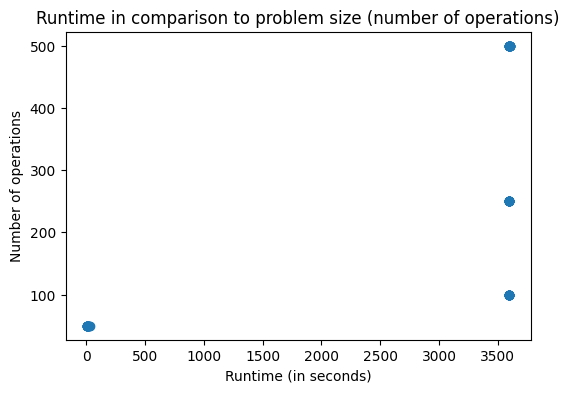

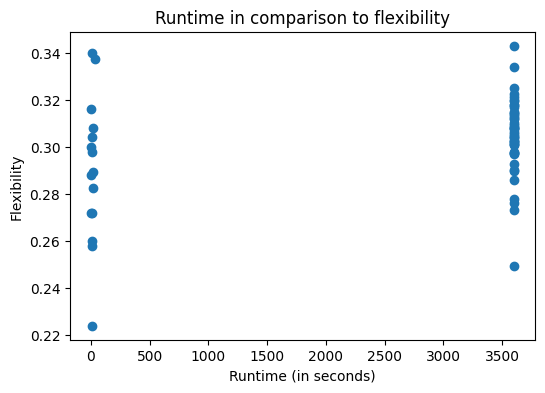

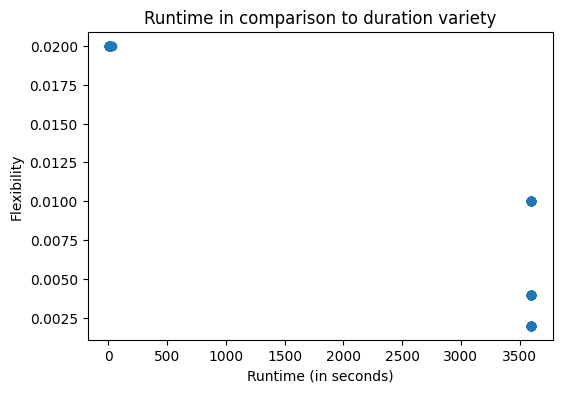

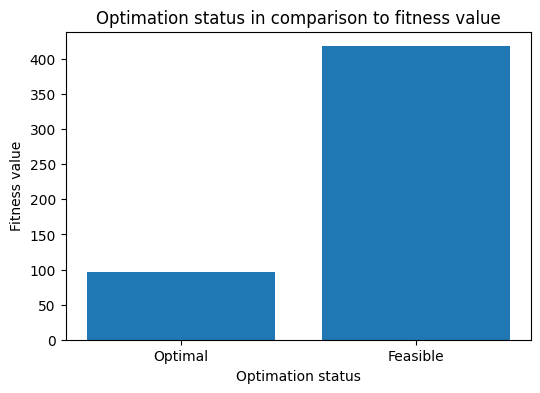

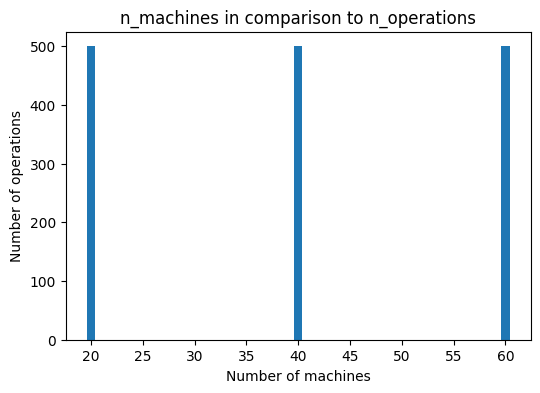

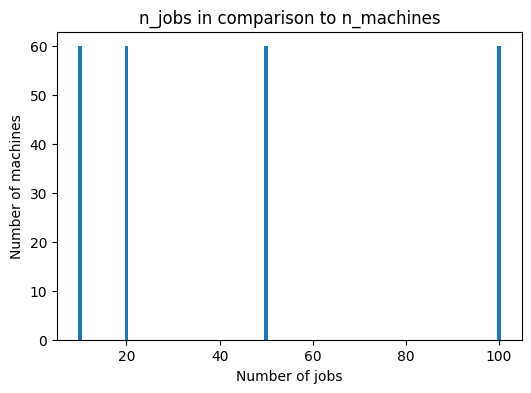

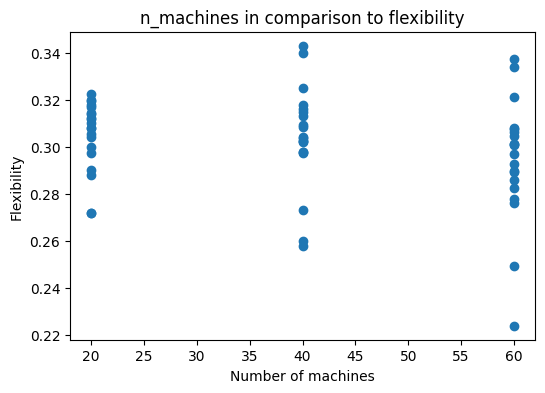

25.0% of all instances could be solved


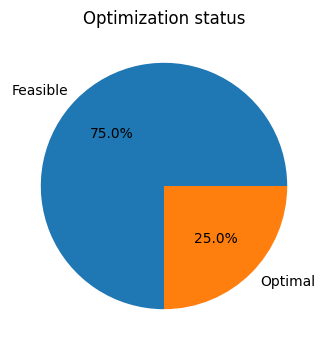

In [ ]:
show_all_plots(behnke, behnke_data)

In [ ]:
instances_to_be_repeated(behnke, "Behnke")

[]

#### Brandimarte

In [ ]:
brandimarte = pd.DataFrame([x for i, x in data.iterrows() if x["name"].startswith("1_Brandimarte")])
brandimarte_encodings = get_encodings_for_group(brandimarte)
brandimarte_data = extract_data_from_encodings(brandimarte_encodings)
brandimarte_data.describe()

n_jobs  n_machines  n_operations  flexibility  duration_variety
count  14.000000   14.000000     14.000000    14.000000         14.000000
mean   20.357143    8.714286    167.000000     0.297085          0.007867
std     8.195751    3.429029     77.727334     0.147104          0.004820
min    10.000000    4.000000     55.000000     0.100120          0.003521
25%    15.000000    6.000000    101.500000     0.202039          0.004358
50%    20.000000    9.000000    164.500000     0.292810          0.006127
75%    30.000000   10.000000    229.500000     0.342827          0.009858
max    30.000000   15.000000    284.000000     0.612069          0.018182

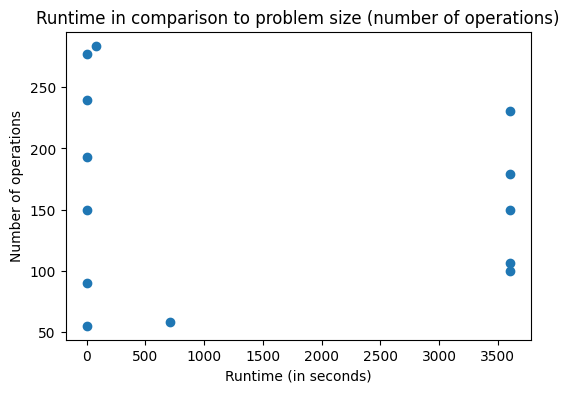

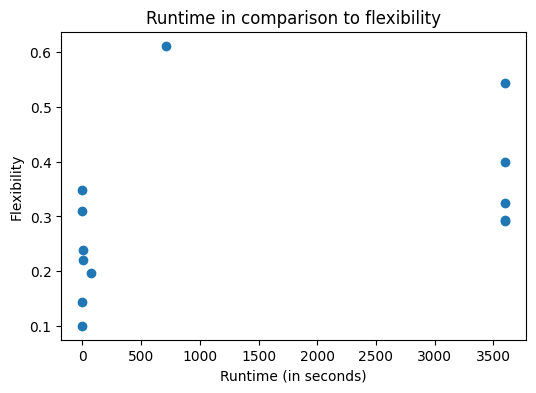

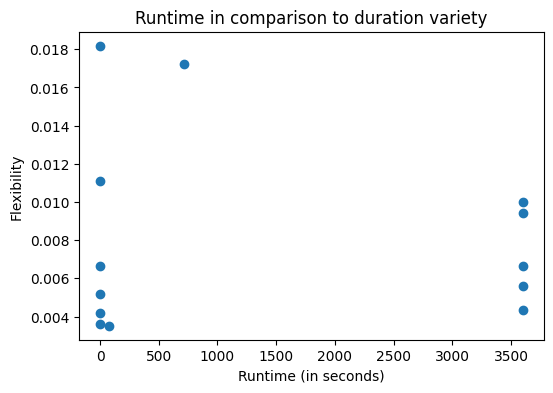

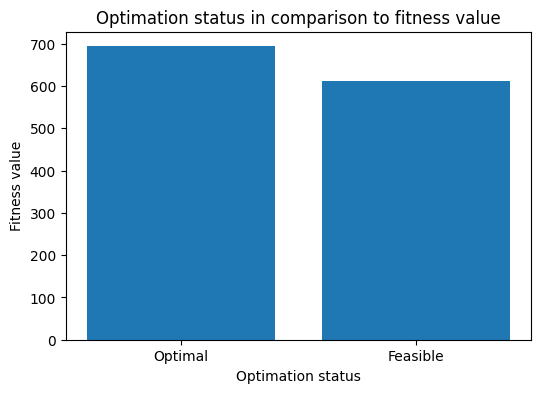

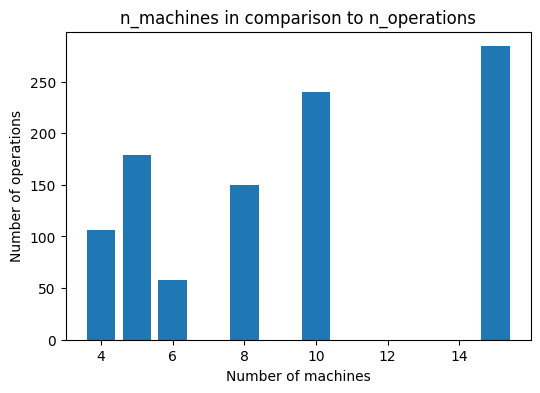

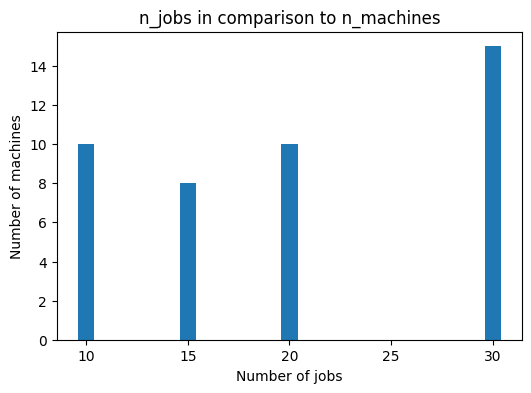

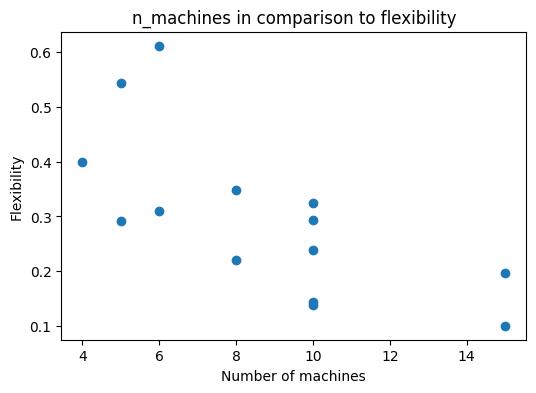

57.14285714285714% of all instances could be solved


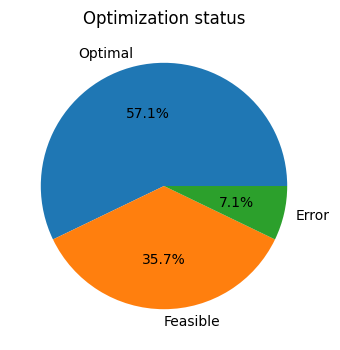

In [ ]:
show_all_plots(brandimarte, brandimarte_data)

In [ ]:
instances_to_be_repeated(brandimarte, "BrandimarteMk")

['BrandimarteMk10', 'BrandimarteMk8']

#### HurinkS

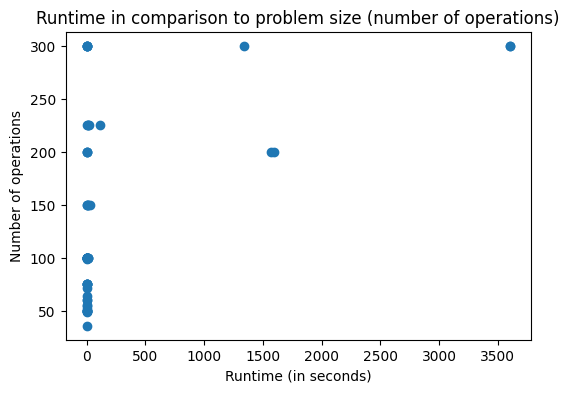

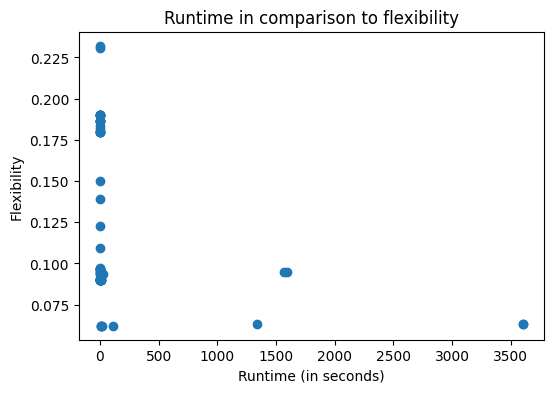

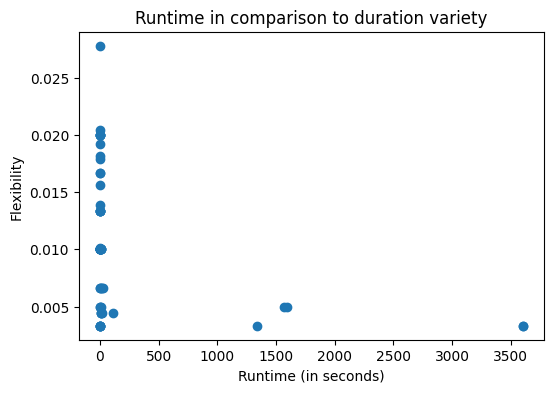

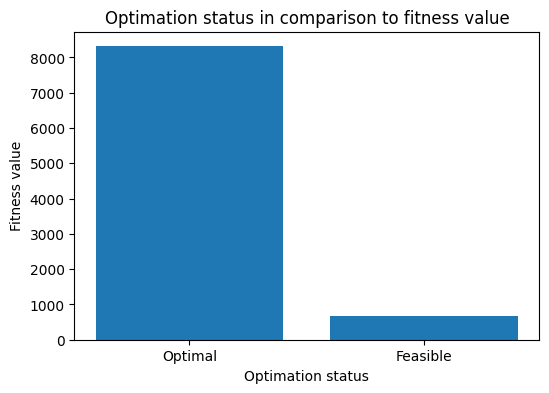

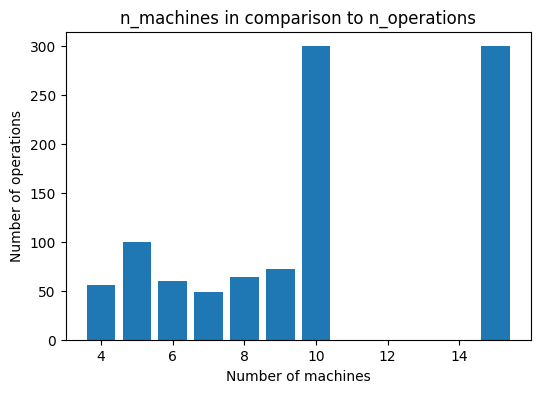

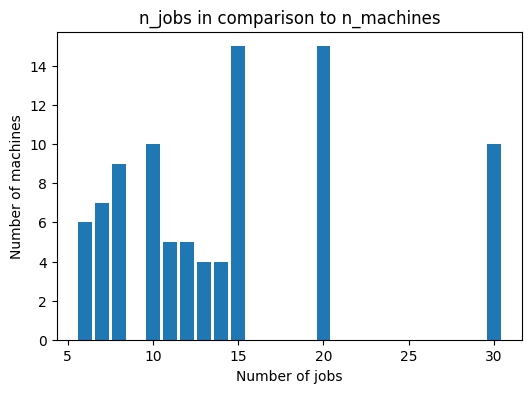

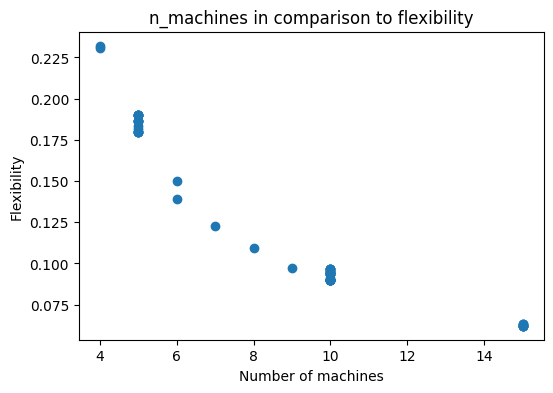

96.96969696969697% of all instances could be solved


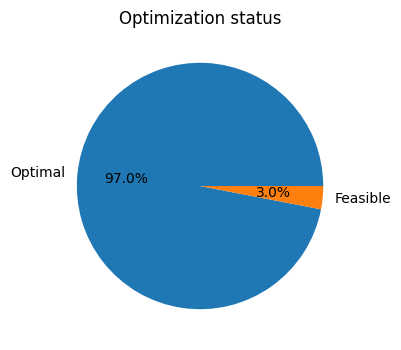

In [ ]:
hurinks = pd.DataFrame([x for i, x in data.iterrows() if x["name"].startswith("2a_HurinkS")])
hurinks_encodings = get_encodings_for_group(hurinks)
hurinks_data = extract_data_from_encodings(hurinks_encodings)
hurinks_data.describe()

show_all_plots(hurinks, hurinks_data)

In [ ]:
instances_to_be_repeated(hurinks, "HurinkSdata")

[]

#### HurinkE

In [ ]:
hurinke = pd.DataFrame([x for i, x in data.iterrows() if x["name"].startswith("2b_HurinkE")])
hurinke_encodings = get_encodings_for_group(hurinke)
hurinke_data = extract_data_from_encodings(hurinke_encodings)
hurinke_data.describe()

n_jobs  n_machines  n_operations  flexibility  duration_variety
count  66.000000   66.000000     66.000000    66.000000         66.000000
mean   14.757576    8.848485    133.378788     0.139186          0.010307
std     6.005281    3.235583     80.475465     0.057988          0.005566
min     6.000000    4.000000     36.000000     0.070222          0.003333
25%    10.000000    5.000000     75.000000     0.103000          0.005000
50%    15.000000   10.000000    100.000000     0.108500          0.010000
75%    20.000000   10.000000    200.000000     0.212000          0.013333
max    30.000000   15.000000    300.000000     0.281250          0.027778

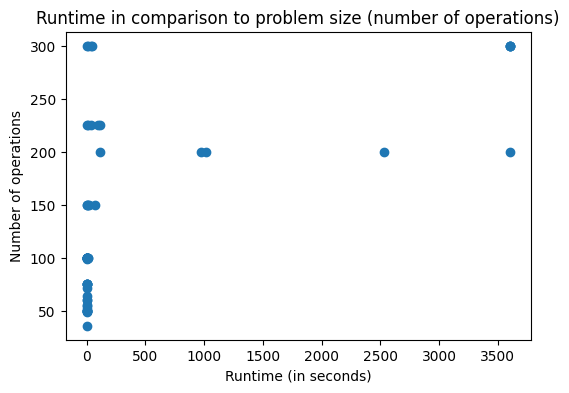

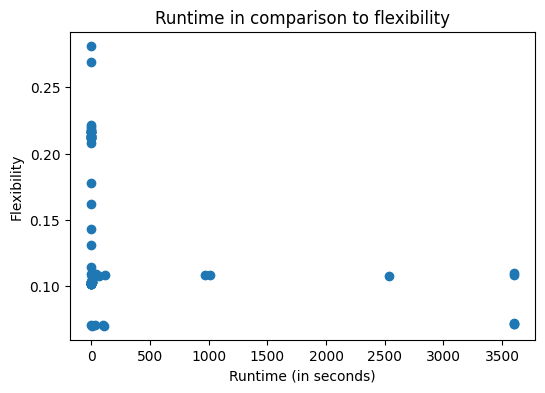

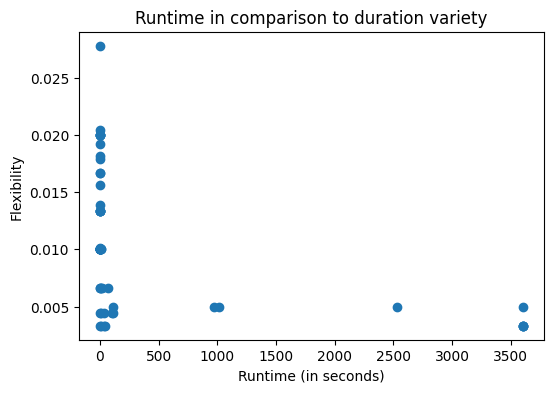

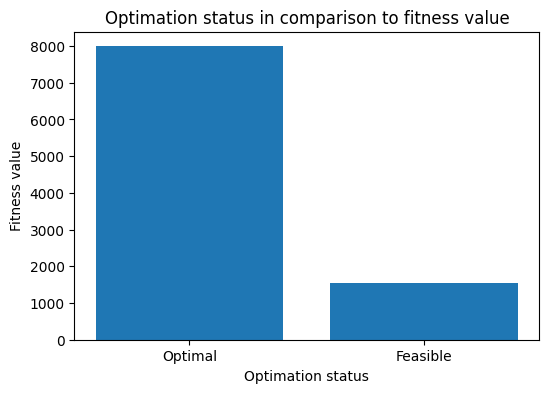

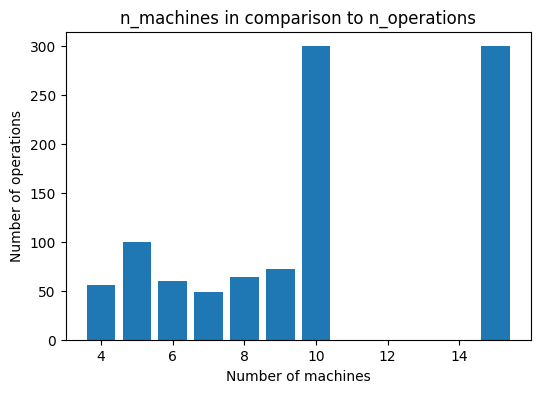

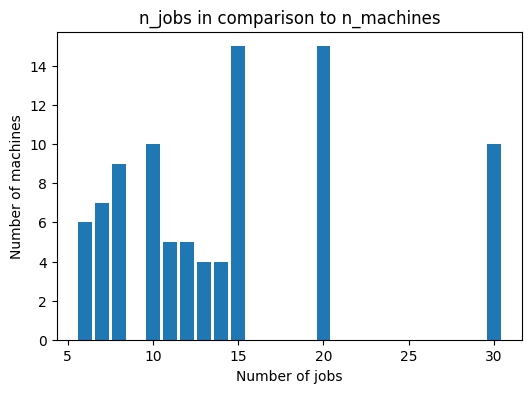

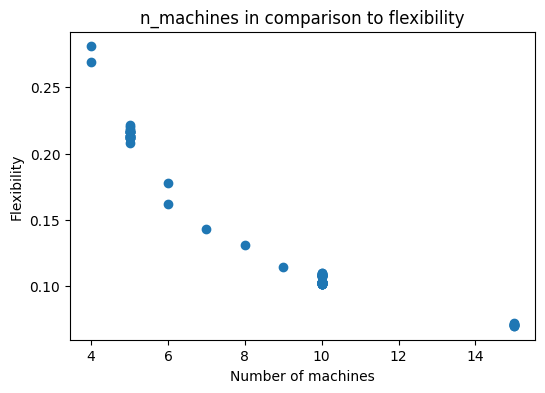

92.42424242424242% of all instances could be solved


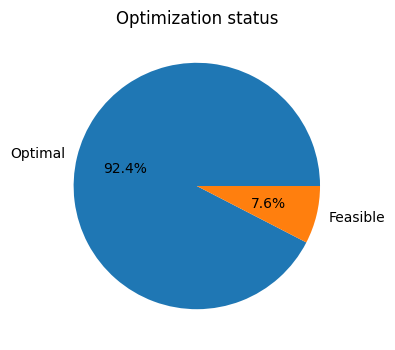

In [ ]:
show_all_plots(hurinke, hurinke_data)

In [ ]:
instances_to_be_repeated(hurinke, "HurinkEdata")

[]

#### HurinkR

In [ ]:
hurinkr = pd.DataFrame([x for i, x in data.iterrows() if x["name"].startswith("2c_HurinkR")])
hurinkr_encodings = get_encodings_for_group(hurinkr)
hurinkr_data = extract_data_from_encodings(hurinkr_encodings)
hurinkr_data.describe()

n_jobs  n_machines  n_operations  flexibility  duration_variety
count  66.000000   66.000000     66.000000    66.000000         66.000000
mean   14.757576    8.848485    133.378788     0.236801          0.010307
std     6.005281    3.235583     80.475465     0.095631          0.005566
min     6.000000    4.000000     36.000000     0.120593          0.003333
25%    10.000000    5.000000     75.000000     0.176000          0.005000
50%    15.000000   10.000000    100.000000     0.187667          0.010000
75%    20.000000   10.000000    200.000000     0.354667          0.013333
max    30.000000   15.000000    300.000000     0.446429          0.027778

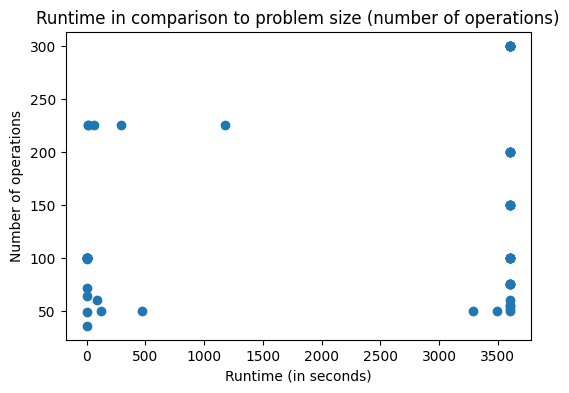

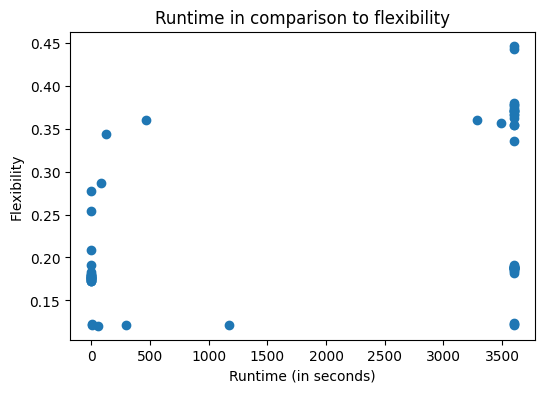

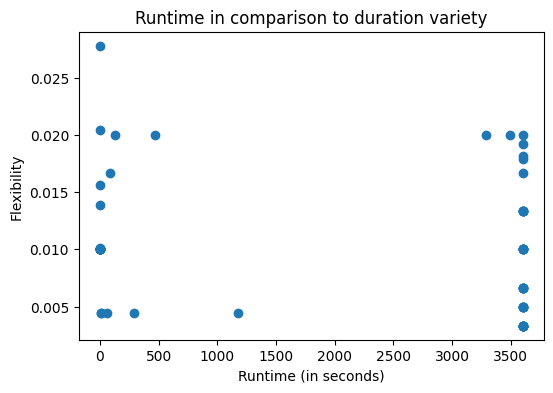

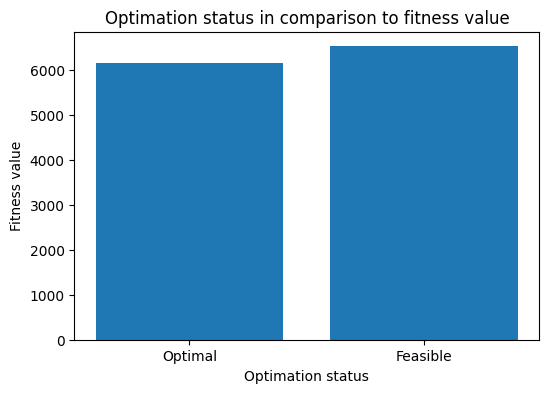

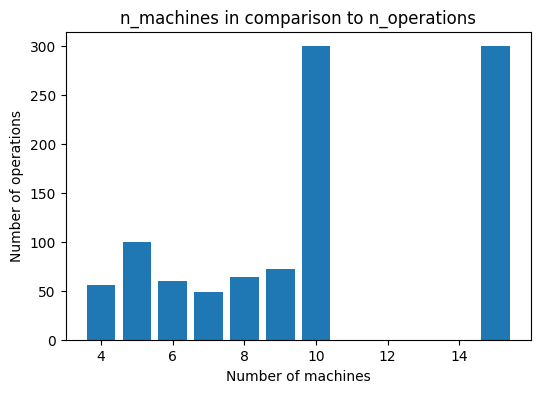

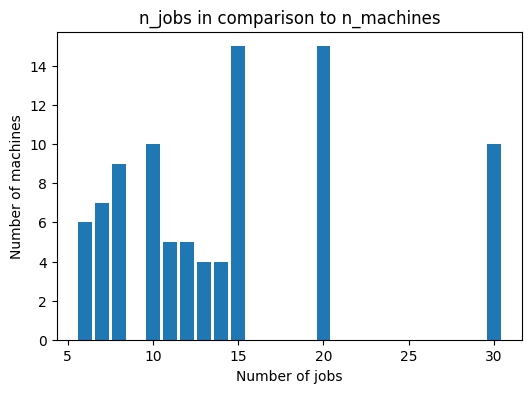

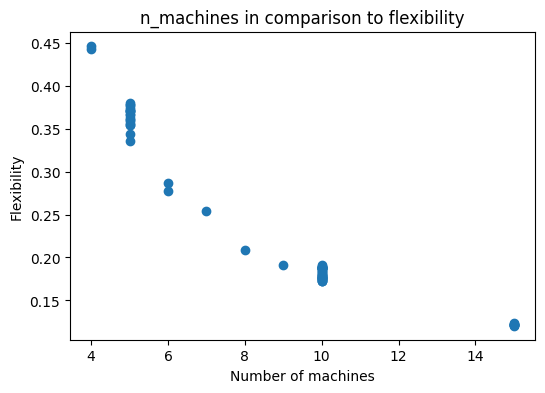

48.484848484848484% of all instances could be solved


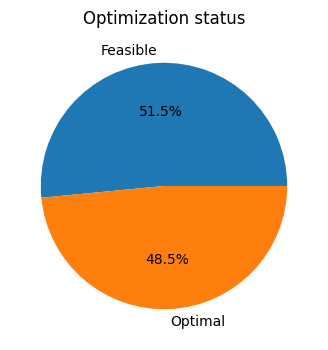

In [ ]:
show_all_plots(hurinkr, hurinkr_data)

In [ ]:
instances_to_be_repeated(hurinkr, "HurinkRdata")

[]

#### HurinkV

In [ ]:
hurinkv = pd.DataFrame([x for i, x in data.iterrows() if x["name"].startswith("2d_HurinkV")])
hurinkv_encodings = get_encodings_for_group(hurinkv)
hurinkv_data = extract_data_from_encodings(hurinkv_encodings)
hurinkv_data.describe()

n_jobs  n_machines  n_operations  flexibility  duration_variety
count  66.000000   66.000000     66.000000    66.000000         66.000000
mean   14.757576    8.848485    133.378788     0.438814          0.010307
std     6.005281    3.235583     80.475465     0.031943          0.005566
min     6.000000    4.000000     36.000000     0.390000          0.003333
25%    10.000000    5.000000     75.000000     0.417046          0.005000
50%    15.000000   10.000000    100.000000     0.428500          0.010000
75%    20.000000   10.000000    200.000000     0.452000          0.013333
max    30.000000   15.000000    300.000000     0.524038          0.027778

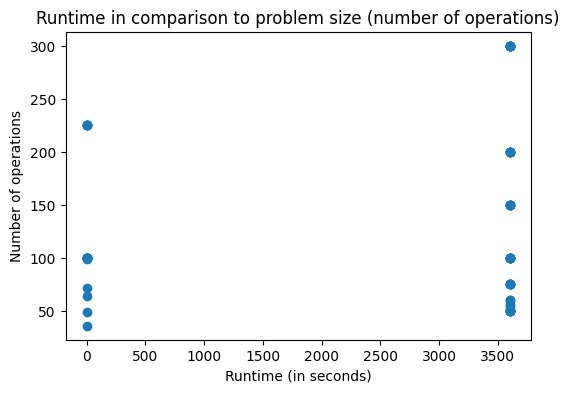

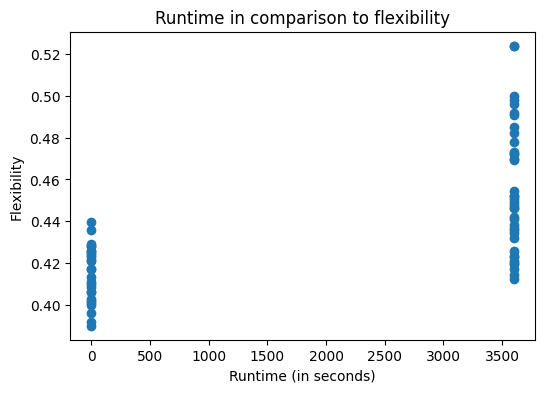

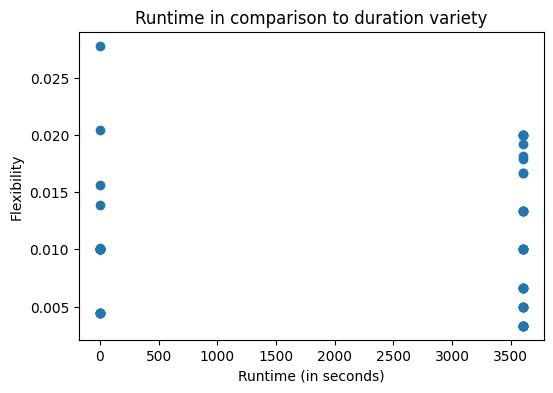

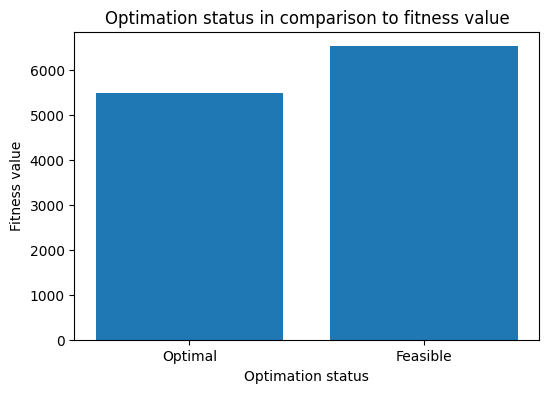

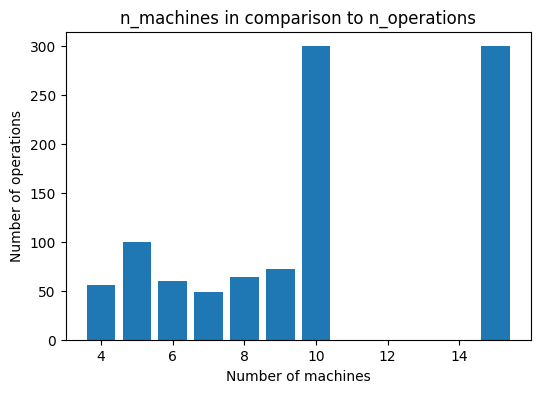

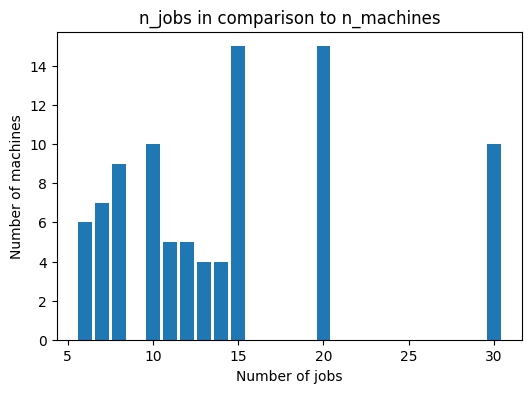

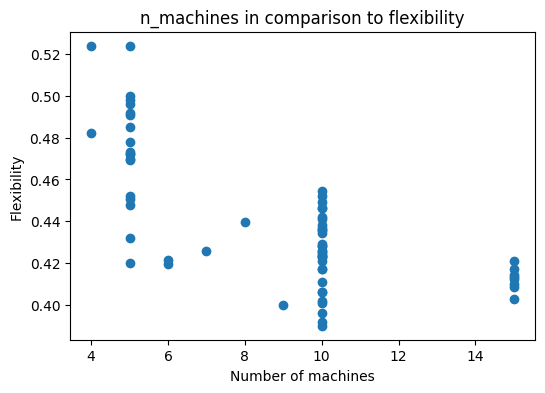

40.909090909090914% of all instances could be solved


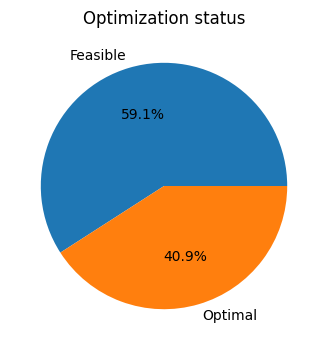

In [ ]:
show_all_plots(hurinkv, hurinkv_data)

In [ ]:
instances_to_be_repeated(hurinkv, "HurinkVdata")

[]

#### DPpaulli

In [ ]:
dppaulli = pd.DataFrame([x for i, x in data.iterrows() if x["name"].startswith("3_DPpaulli")])
dppaulli_encodings = get_encodings_for_group(dppaulli)
dppaulli_data = extract_data_from_encodings(dppaulli_encodings)
dppaulli_data.describe()

n_jobs  n_machines  n_operations  flexibility  duration_variety
count  18.00000   18.000000     18.000000    18.000000         18.000000
mean   15.00000    7.666667    292.000000     0.305360          0.003700
std     4.20084    2.114377     80.239348     0.131599          0.001078
min    10.00000    5.000000    196.000000     0.128682          0.002584
25%    10.00000    5.000000    196.000000     0.206122          0.002584
50%    15.00000    8.000000    293.000000     0.285788          0.003413
75%    20.00000   10.000000    387.000000     0.460204          0.005102
max    20.00000   10.000000    387.000000     0.479070          0.005102

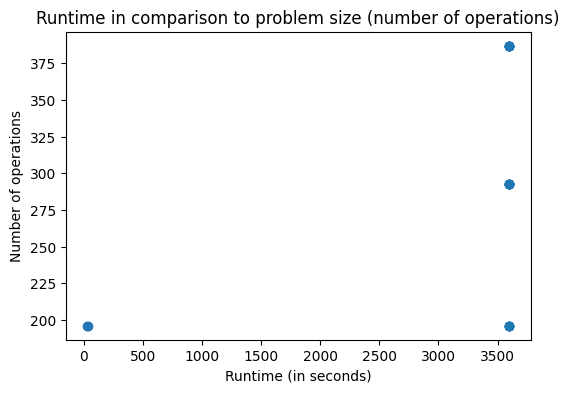

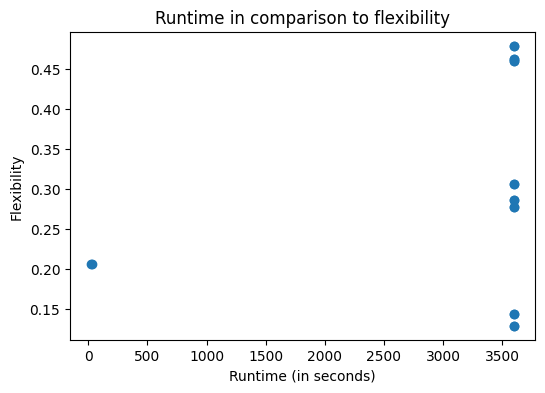

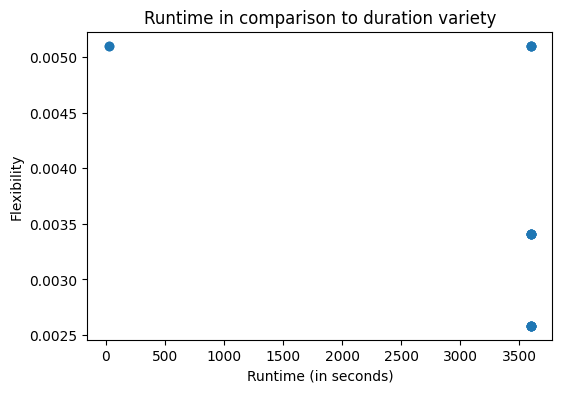

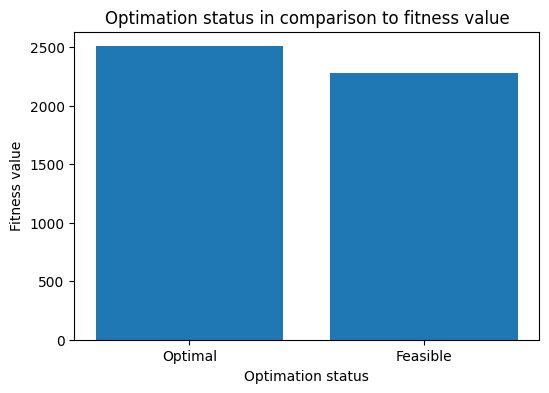

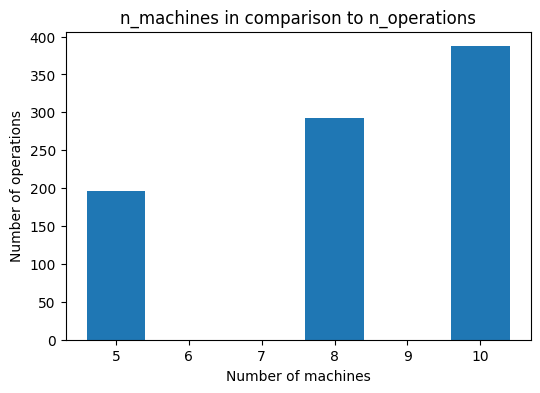

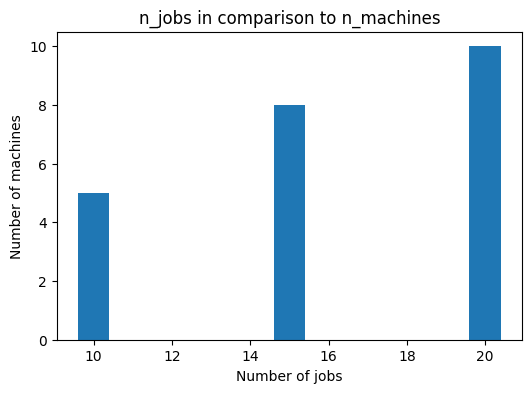

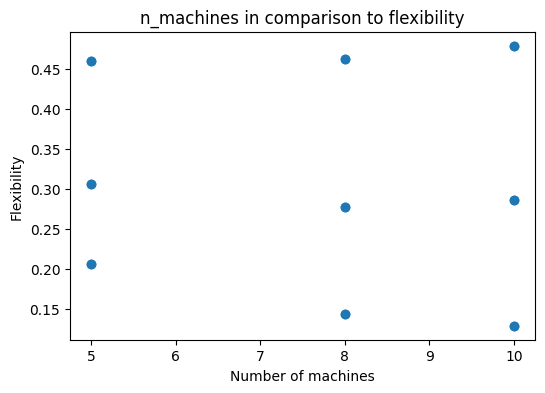

11.11111111111111% of all instances could be solved


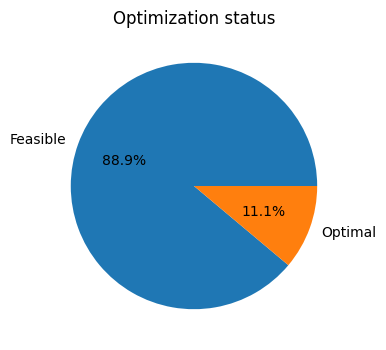

In [ ]:
show_all_plots(dppaulli, dppaulli_data)

In [ ]:
instances_to_be_repeated(dppaulli, "DPpaulli")

[]

#### ChambersBarnes

In [ ]:
chambersbarnes = pd.DataFrame([x for i, x in data.iterrows() if x["name"].startswith("4_ChambersBarnes")])
chambersbarnes_encodings = get_encodings_for_group(chambersbarnes)
chambersbarnes_data = extract_data_from_encodings(chambersbarnes_encodings)
chambersbarnes_data.describe()

n_jobs  n_machines  n_operations  flexibility  duration_variety
count  21.000000   21.000000     21.000000    21.000000         21.000000
mean   13.333333   13.666667    158.333333     0.081852          0.007037
std     2.415229    2.536402     52.638706     0.014291          0.002339
min    10.000000   11.000000    100.000000     0.062222          0.004444
25%    10.000000   12.000000    100.000000     0.062222          0.004444
50%    15.000000   13.000000    150.000000     0.090000          0.006667
75%    15.000000   16.000000    225.000000     0.093333          0.010000
max    15.000000   18.000000    225.000000     0.093333          0.010000

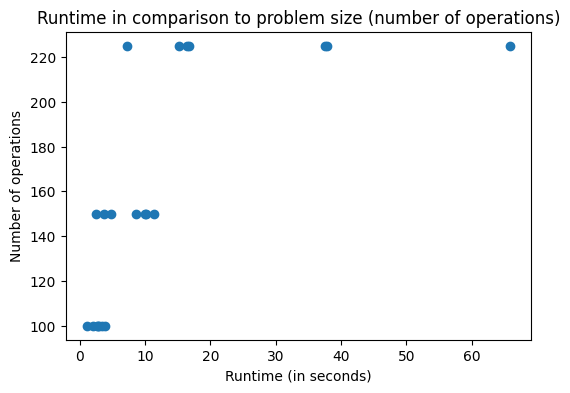

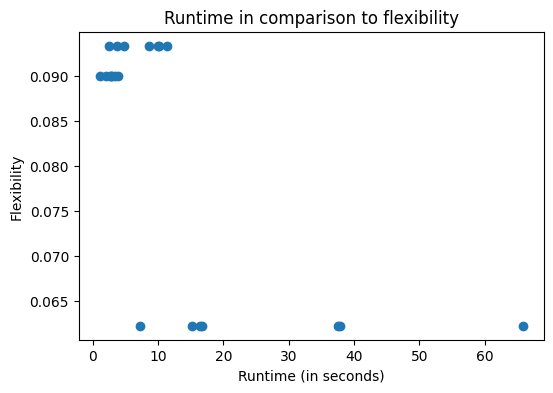

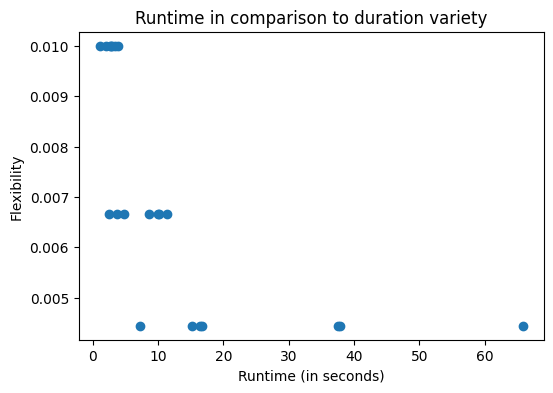

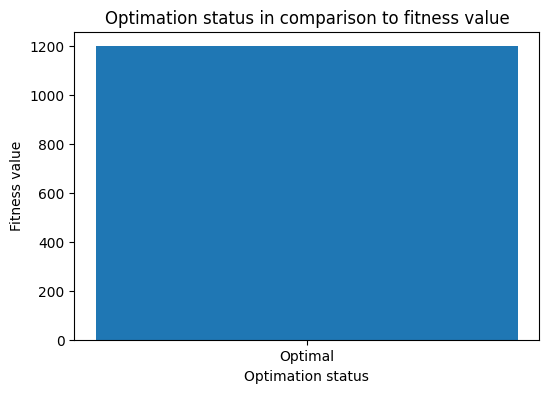

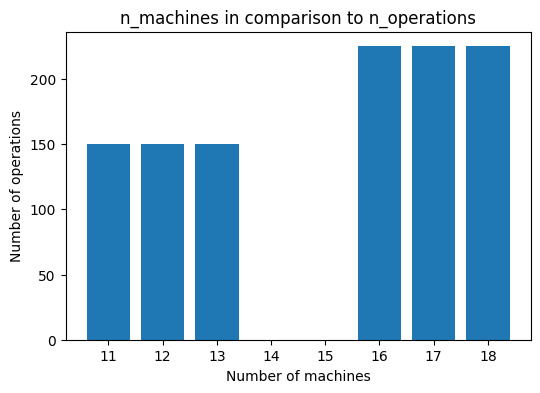

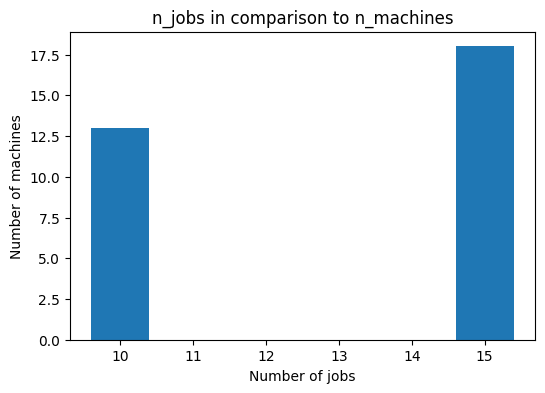

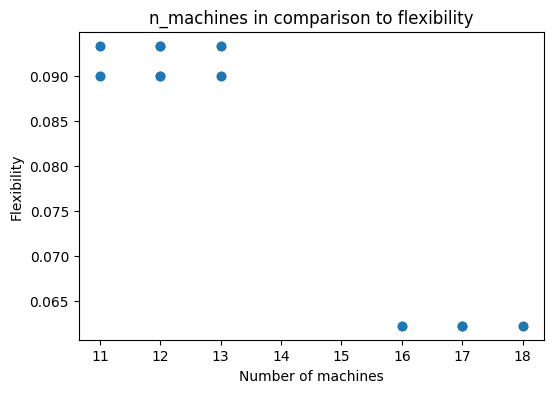

100.0% of all instances could be solved


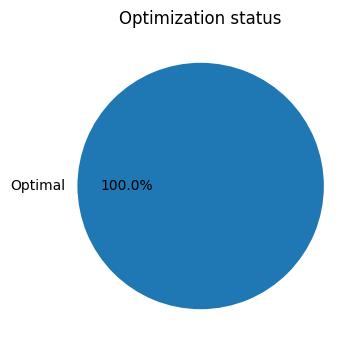

In [ ]:
show_all_plots(chambersbarnes, chambersbarnes_data)

In [ ]:
instances_to_be_repeated(chambersbarnes, "ChambersBarnes")

[]

#### Kacem

In [ ]:
kacem = pd.DataFrame([x for i, x in data.iterrows() if x["name"].startswith("5_Kacem")])
kacem_encodings = get_encodings_for_group(kacem)
kacem_data = extract_data_from_encodings(kacem_encodings)
kacem_data.describe()

n_jobs  n_machines  n_operations  flexibility  duration_variety
count    4.00     4.00000       4.00000     4.000000          4.000000
mean     9.75     8.00000      31.75000     0.889614          0.042252
std      4.50     2.44949      18.15443     0.040171          0.028418
min      4.00     5.00000      12.00000     0.833333          0.017857
25%      8.50     6.50000      24.75000     0.880747          0.029464
50%     10.00     8.50000      29.50000     0.898276          0.033908
75%     11.25    10.00000      36.50000     0.907143          0.046695
max     15.00    10.00000      56.00000     0.928571          0.083333

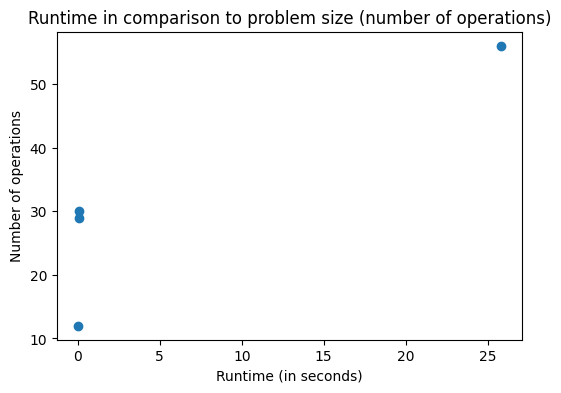

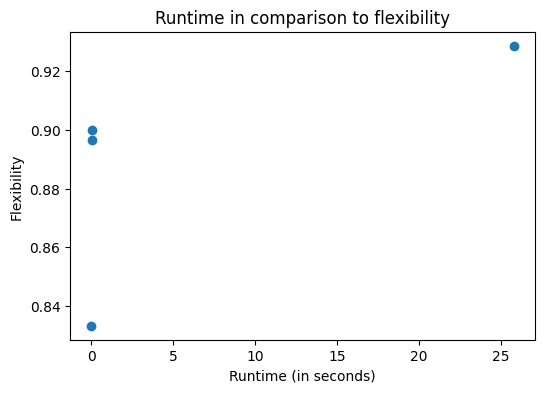

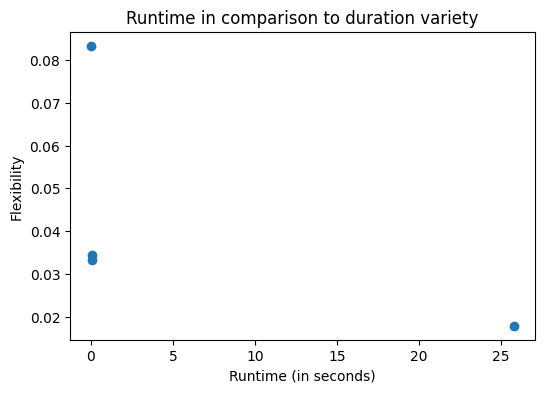

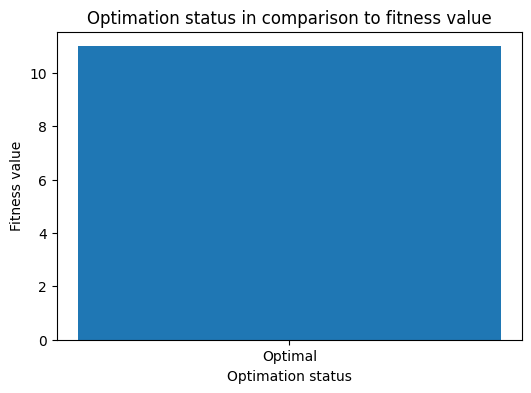

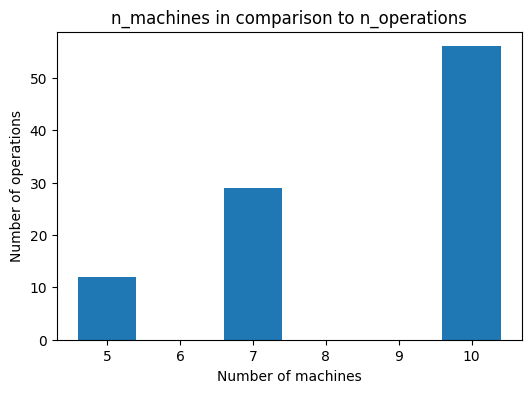

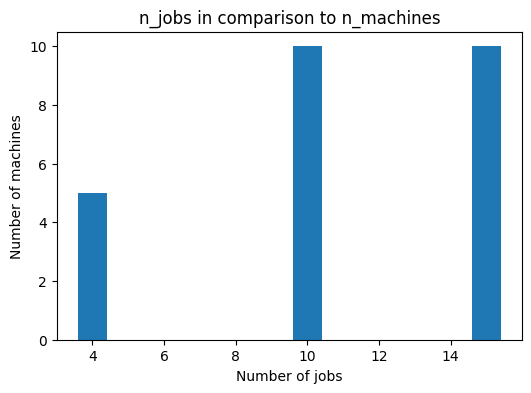

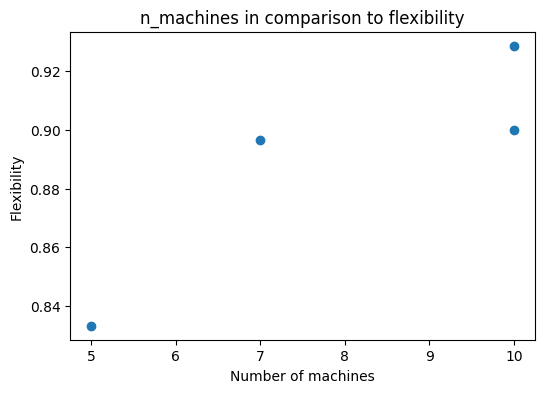

100.0% of all instances could be solved


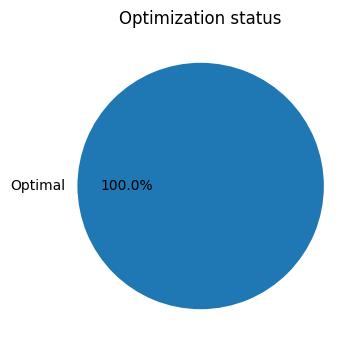

In [ ]:
show_all_plots(kacem, kacem_data)

In [ ]:
instances_to_be_repeated(kacem, "Kacem")

[]

#### Fattahi

In [ ]:
fattahi = pd.DataFrame([x for i, x in data.iterrows() if x["name"].startswith("6_Fattahi")])
fattahi_encodings = get_encodings_for_group(fattahi)
fattahi_data = extract_data_from_encodings(fattahi_encodings)
fattahi_data.describe()

n_jobs  n_machines  n_operations  flexibility  duration_variety
count  20.000000    20.00000     20.000000    20.000000         20.000000
mean    5.350000     5.10000     17.400000     0.357130          0.097808
std     3.013566     2.35975     13.268086     0.109249          0.070441
min     2.000000     2.00000      4.000000     0.250000          0.020833
25%     3.000000     2.75000      8.250000     0.276042          0.046131
50%     4.500000     5.50000     13.500000     0.323129          0.075000
75%     7.250000     7.00000     21.750000     0.392361          0.125000
max    12.000000     8.00000     48.000000     0.666667          0.250000

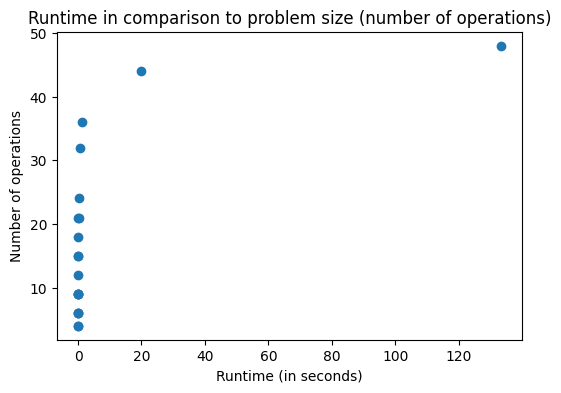

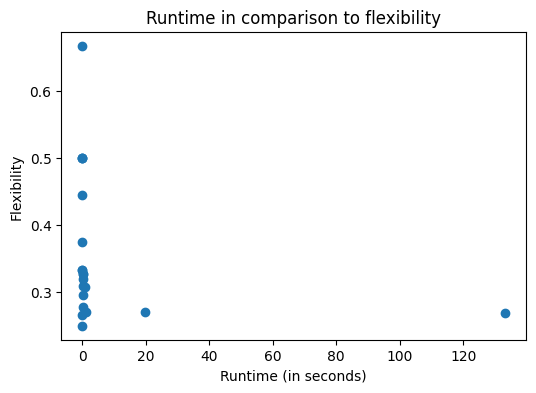

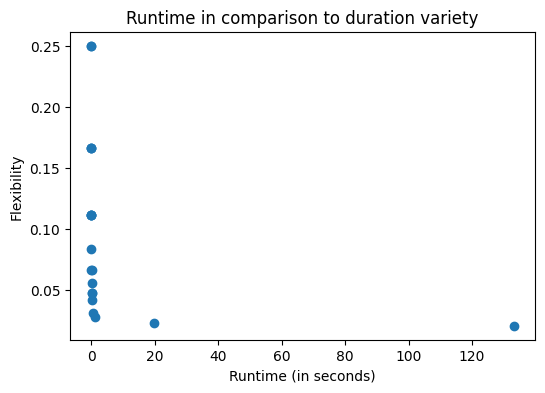

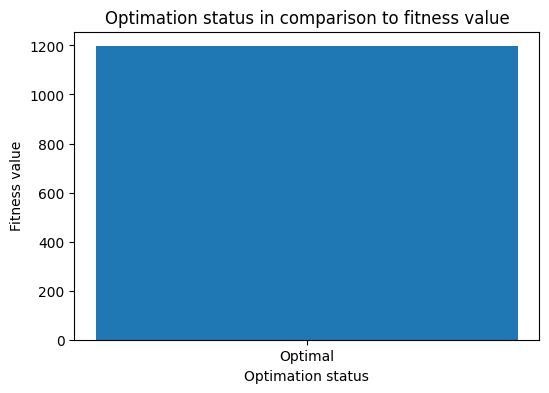

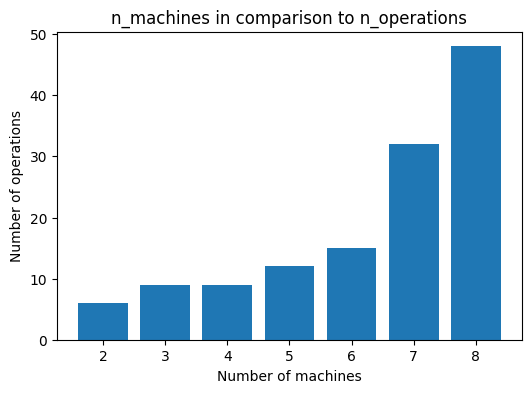

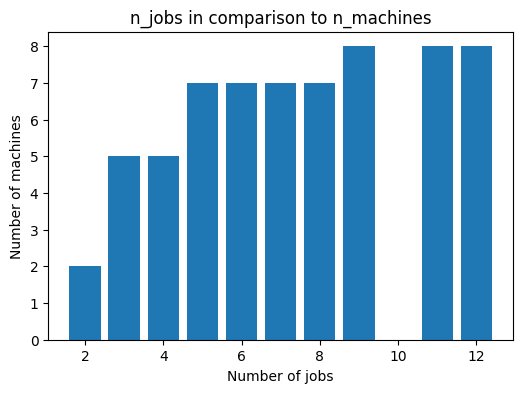

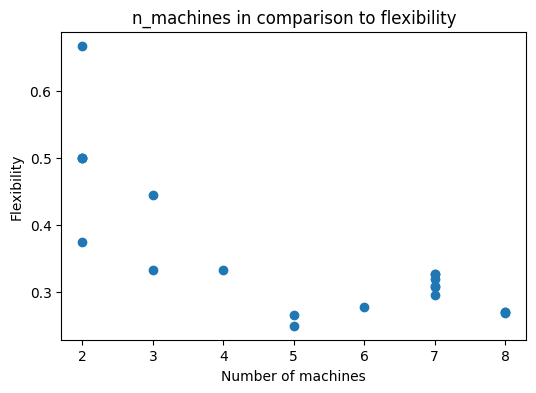

100.0% of all instances could be solved


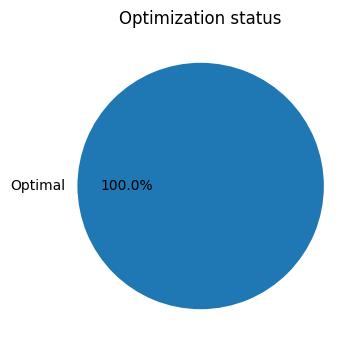

In [ ]:
show_all_plots(fattahi, fattahi_data)

In [ ]:
instances_to_be_repeated(fattahi, "Fattahi")

[]

name                   39
optimization_status    39
fitness_value          39
lower_bound            39
runtime                39
result_vector1         39
result_vector2         39
result_vector3         39
peak_cpu               39
peak_ram               39
resource_history       39
best_result_history    39
dtype: int64

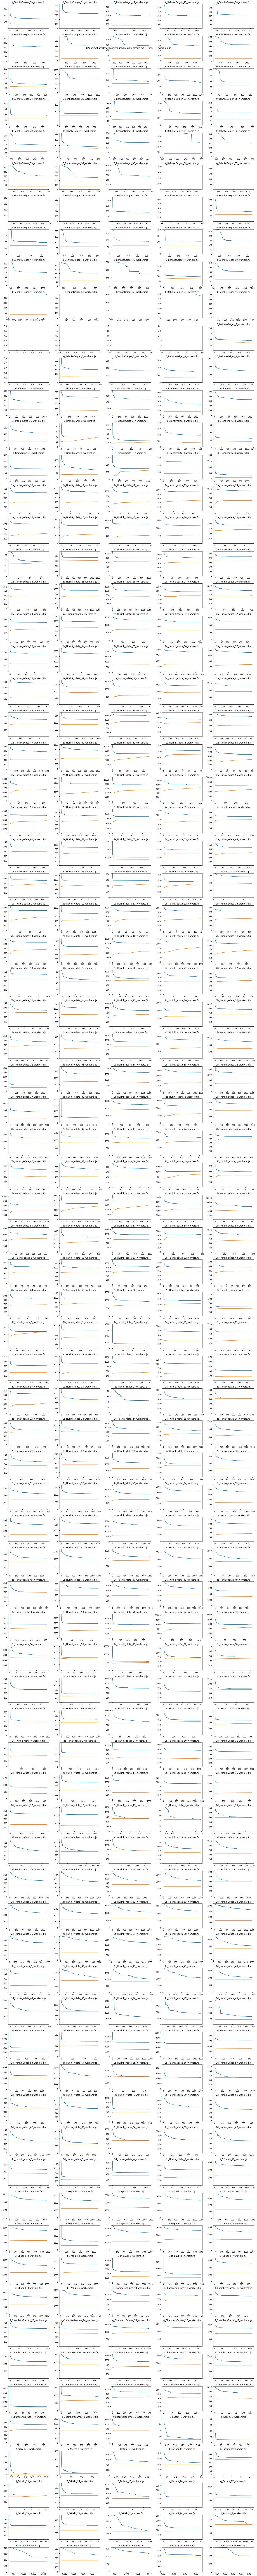

In [94]:
# <timestamp, fitness, lower bound>
from ast import literal_eval
cols = 5
rows = 80
fig, axs = plt.subplots(rows, cols)
fig.set_figheight(200)
fig.set_figwidth(20)
fig.suptitle(f'{file} - Fitness + LowerBounds')
for index, row in data.iterrows():
    #print(index)
    timestamps = []
    fitness = []
    lower_bound = []
    #print(row['best_result_history'])
    try:
        values = pd.eval(row['best_result_history'])
        for entry in values:
            
            timestamps.append(entry[0])
            fitness.append(entry[1])
            lower_bound.append(entry[2])
        #axs[int(index / cols), index % cols]
        axs[int(index / cols), index % cols].set_ylim(0, fitness[1])
        axs[int(index / cols), index % cols].plot(timestamps, fitness)
        axs[int(index / cols), index % cols].plot(timestamps, lower_bound)
        axs[int(index / cols), index % cols].set_title(f'{row["name"]}')
    except:
        #print(row)
        pass
plt.tight_layout()
#plt.show()


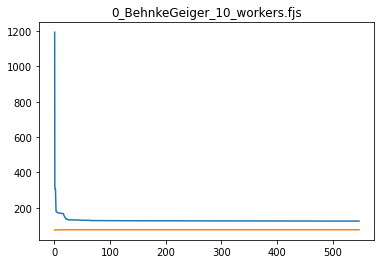

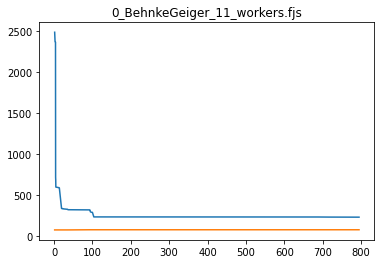

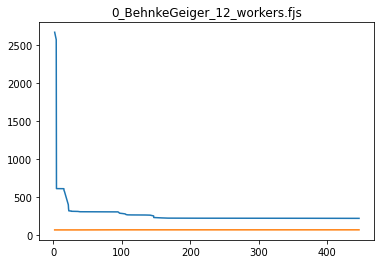

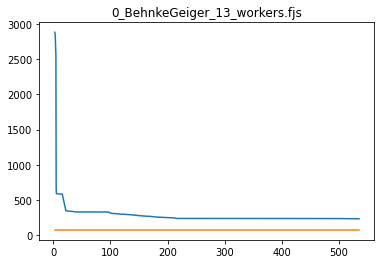

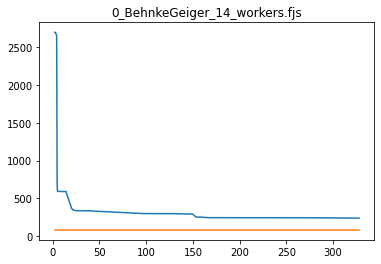

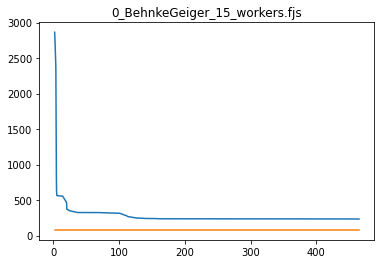

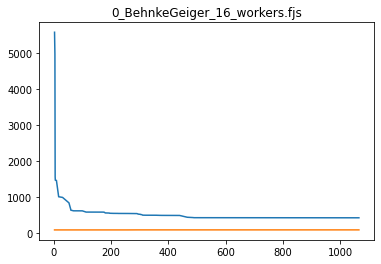

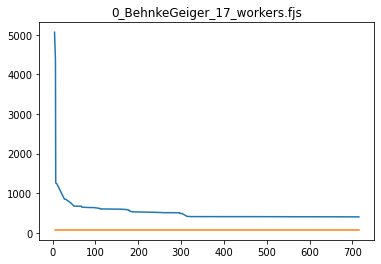

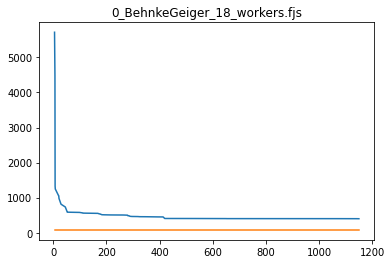

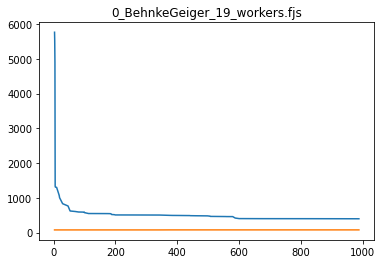

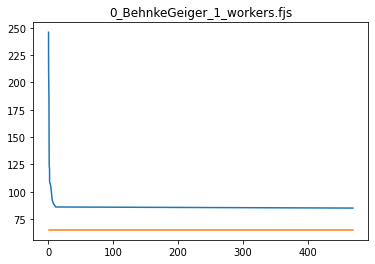

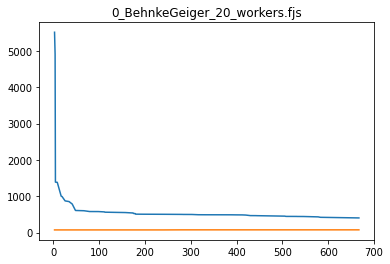

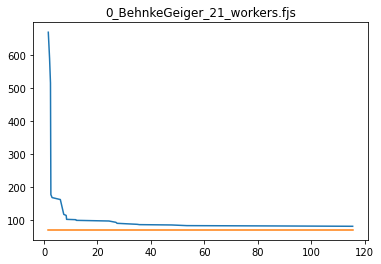

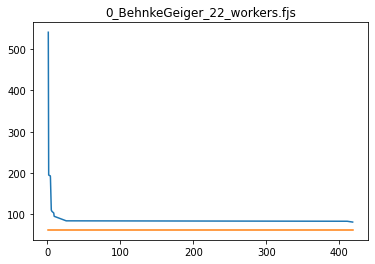

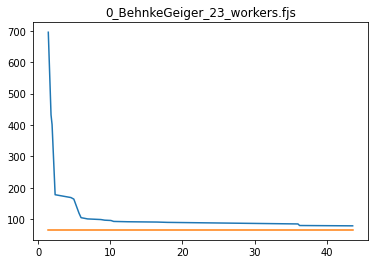

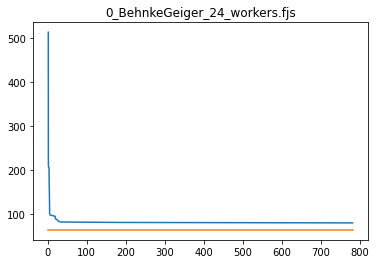

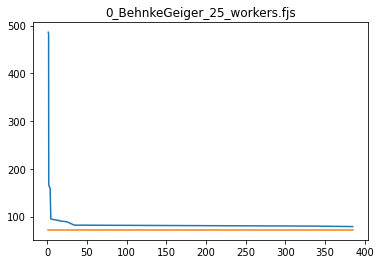

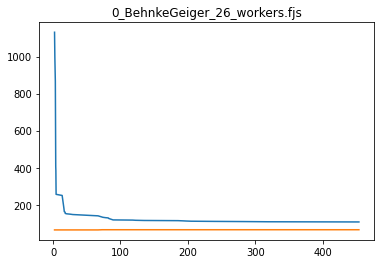

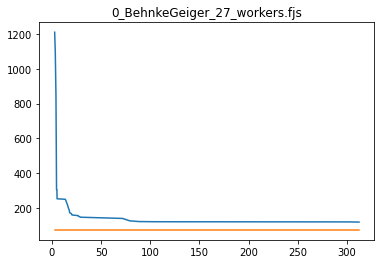

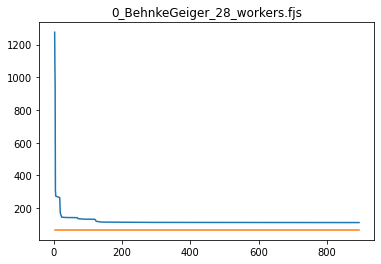

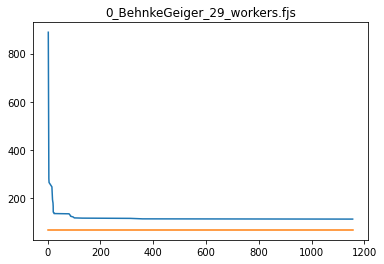

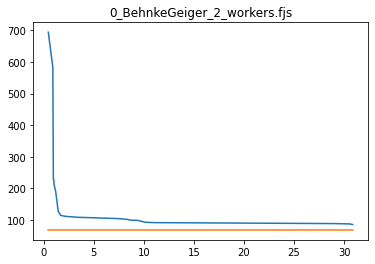

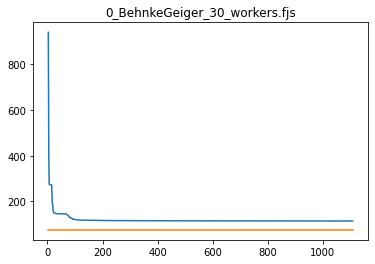

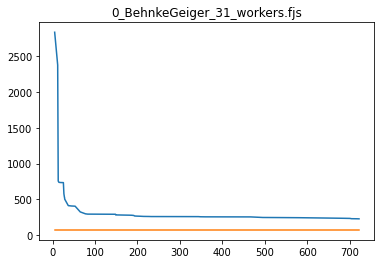

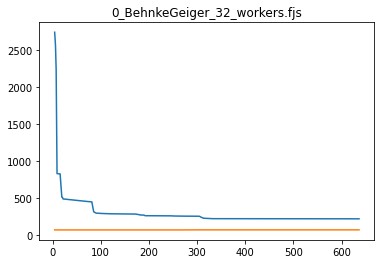

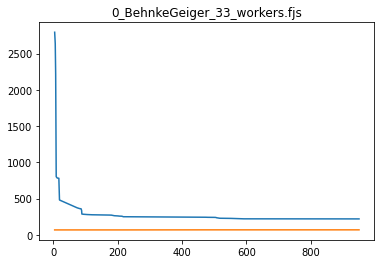

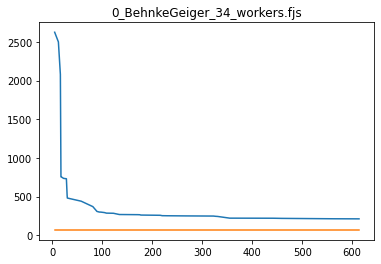

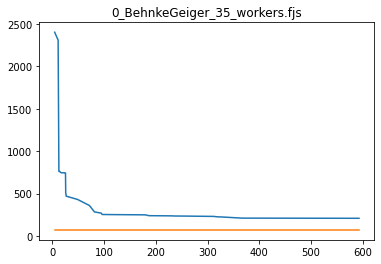

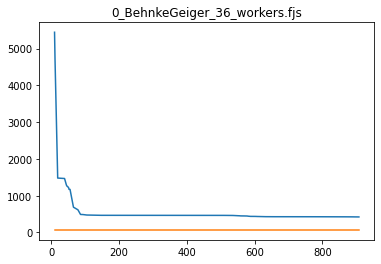

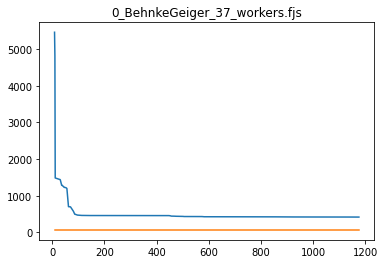

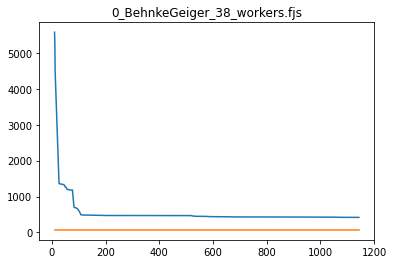

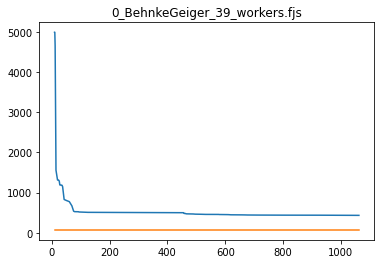

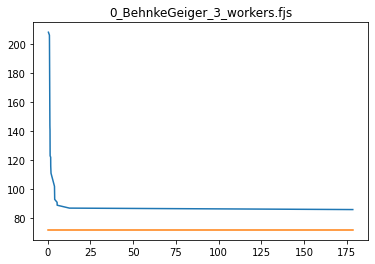

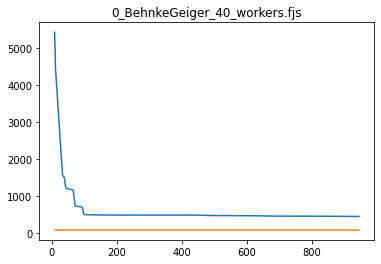

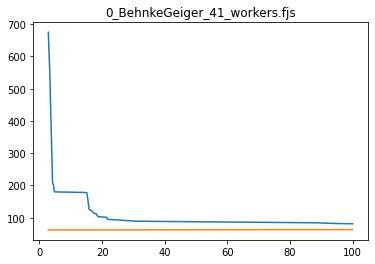

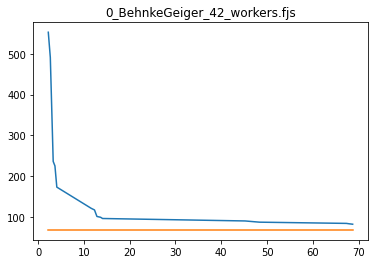

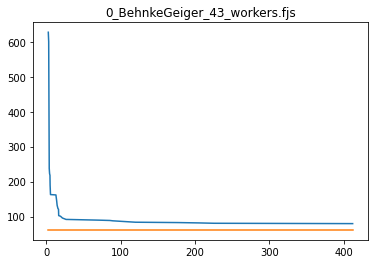

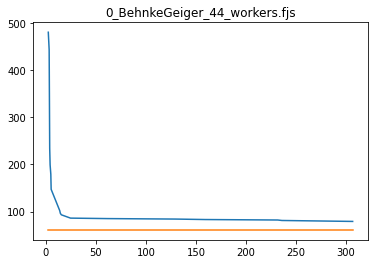

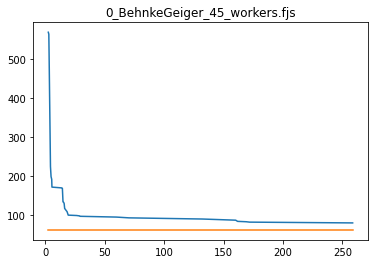

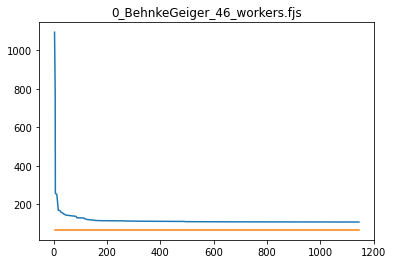

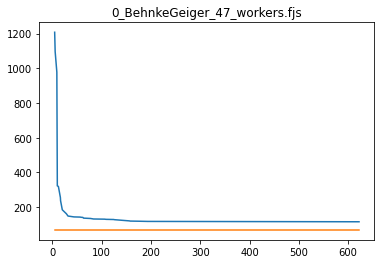

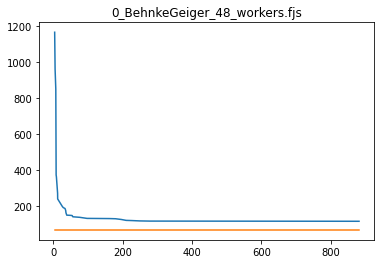

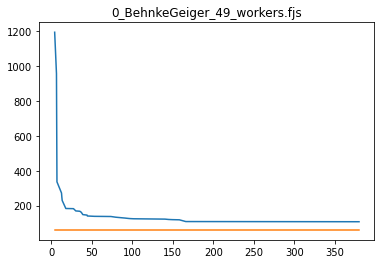

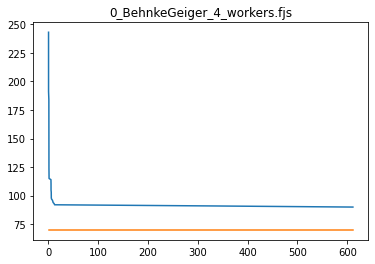

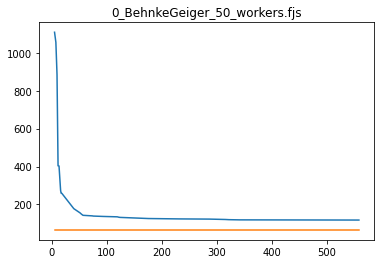

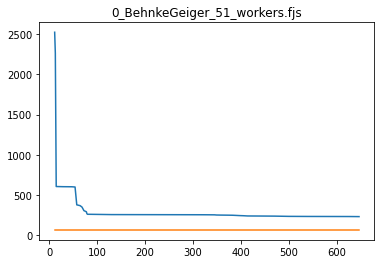

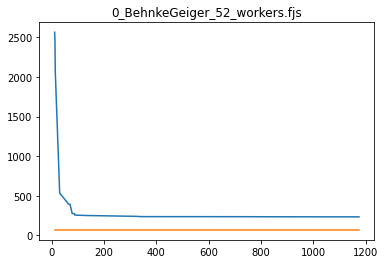

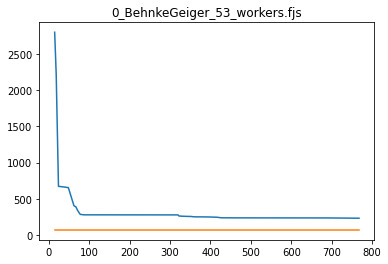

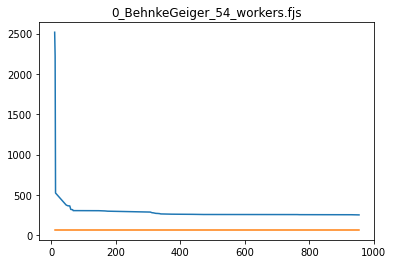

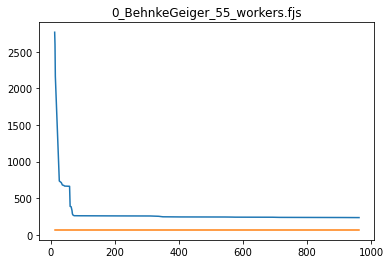

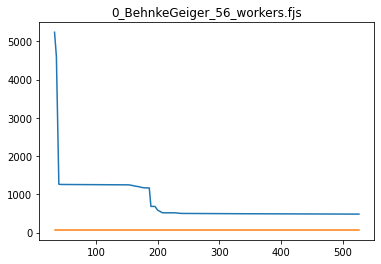

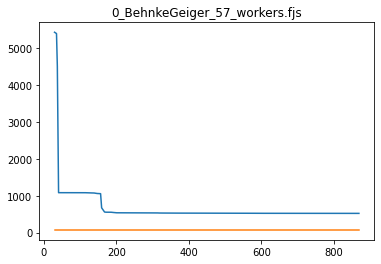

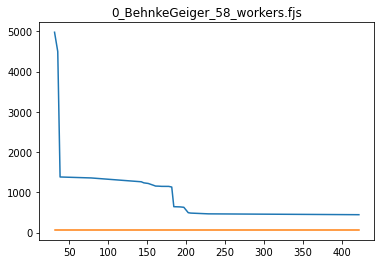

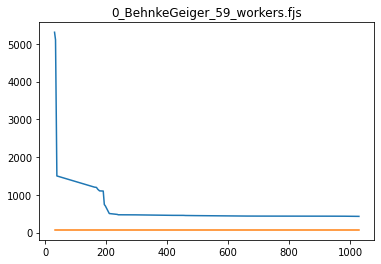

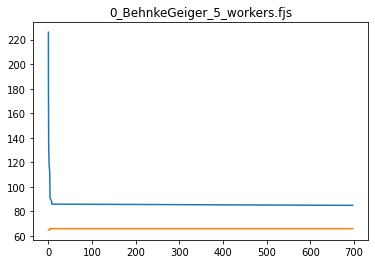

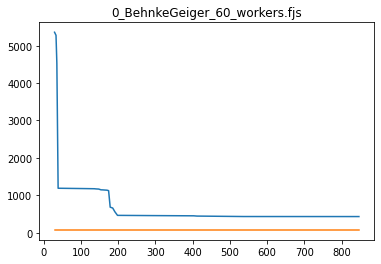

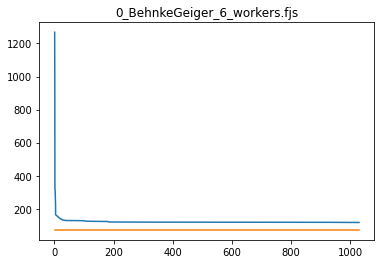

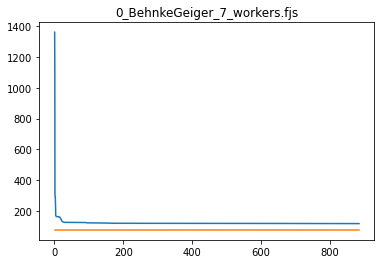

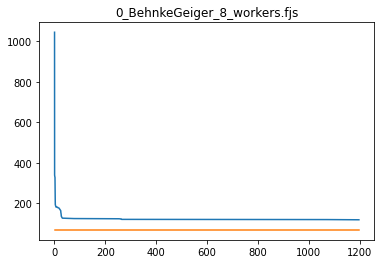

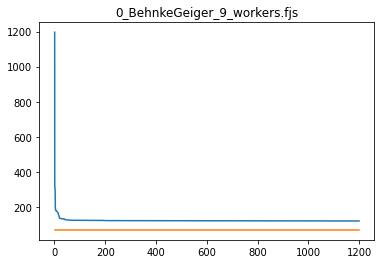

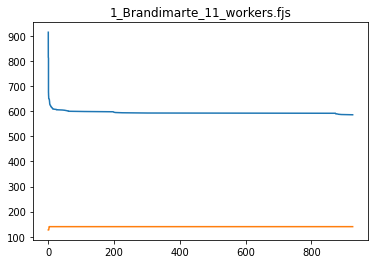

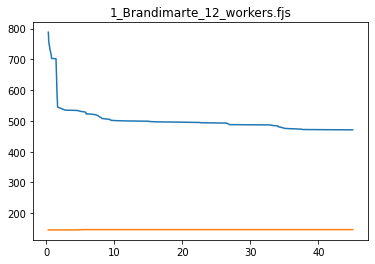

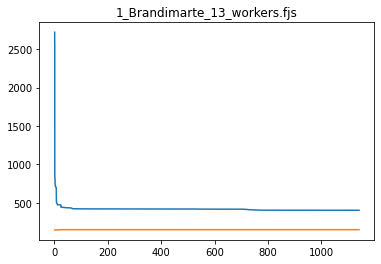

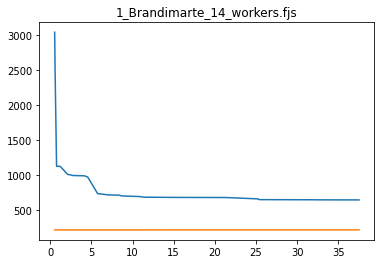

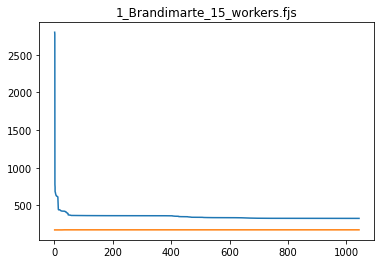

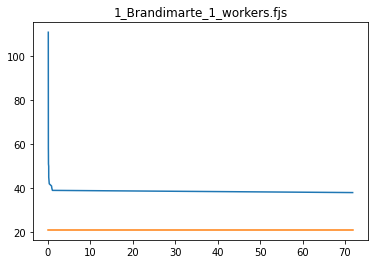

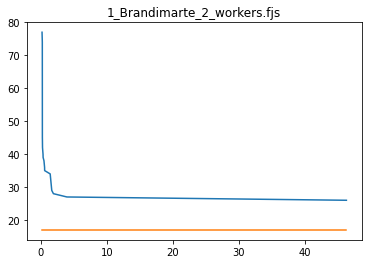

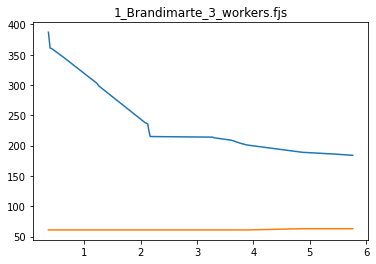

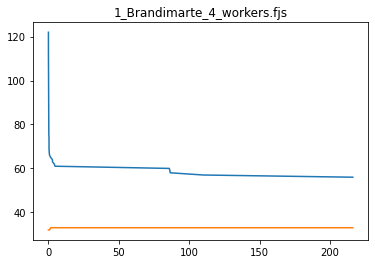

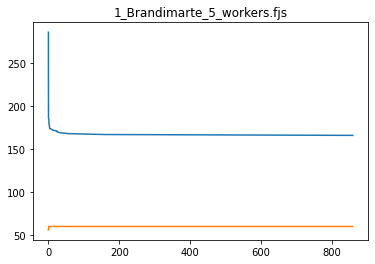

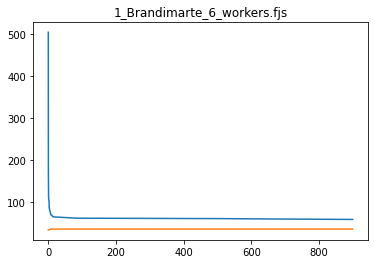

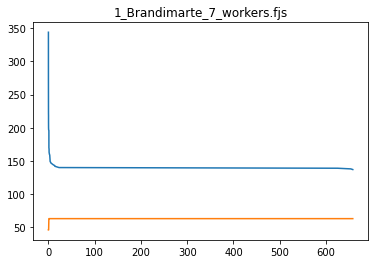

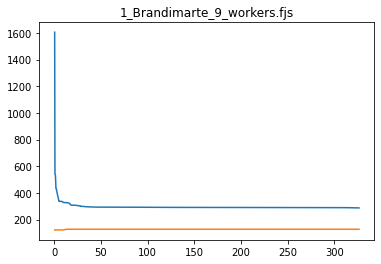

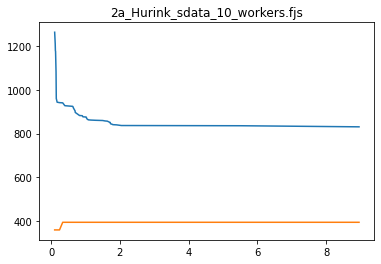

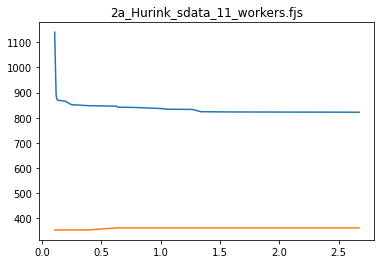

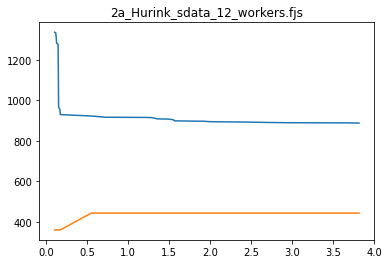

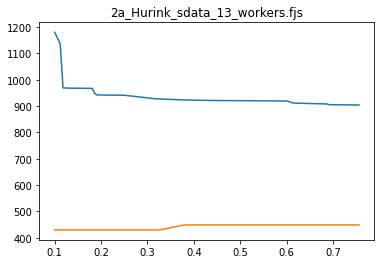

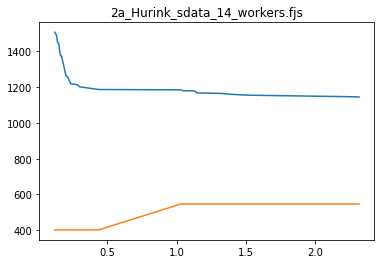

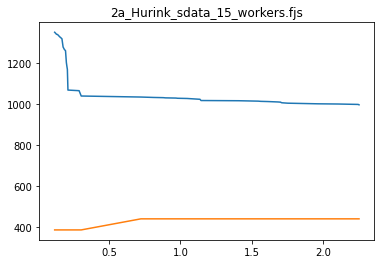

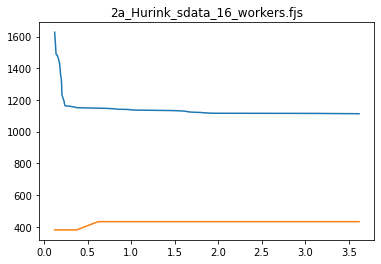

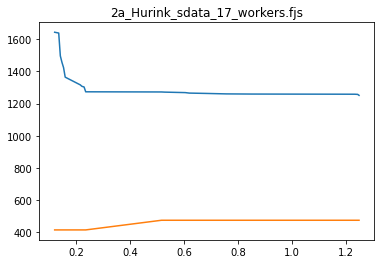

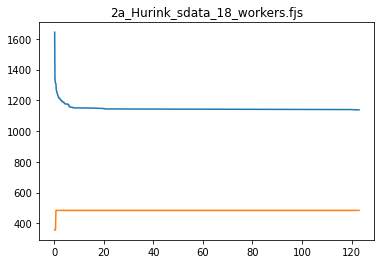

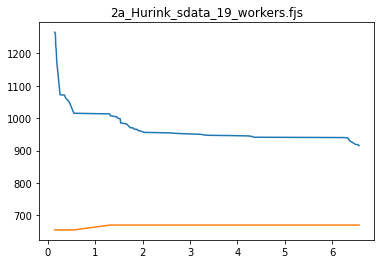

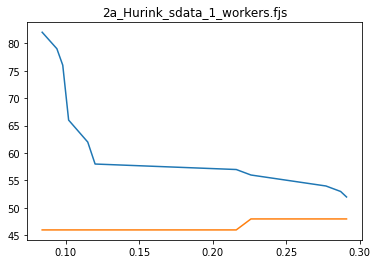

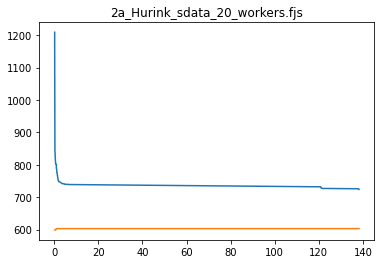

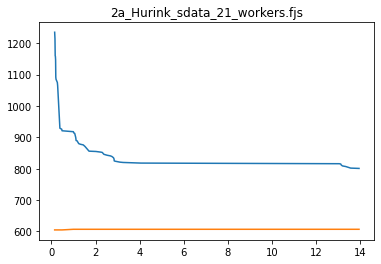

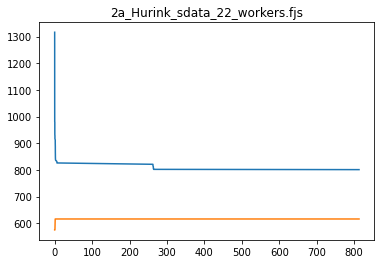

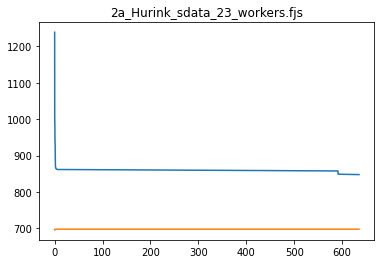

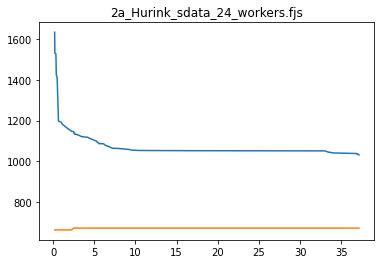

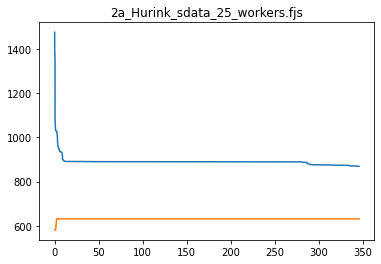

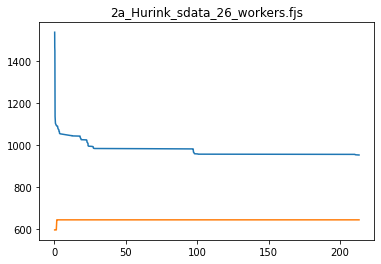

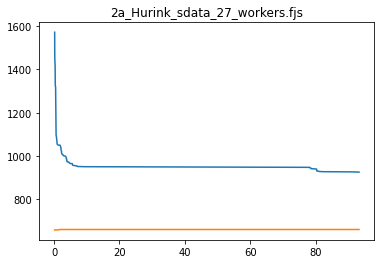

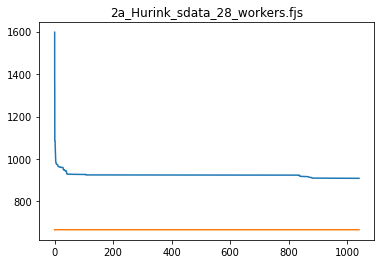

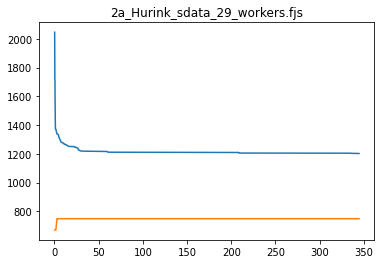

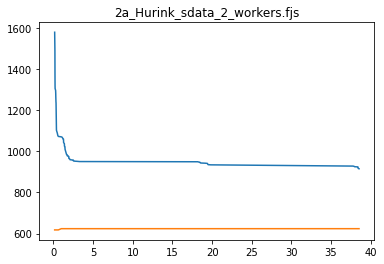

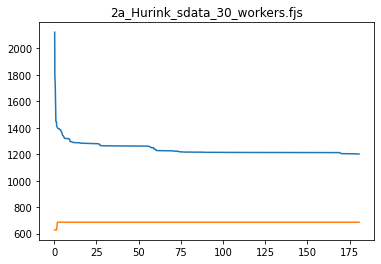

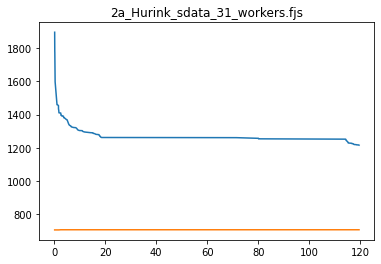

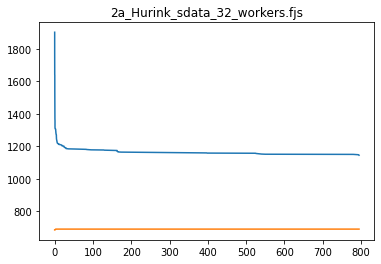

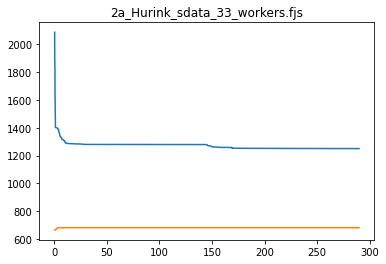

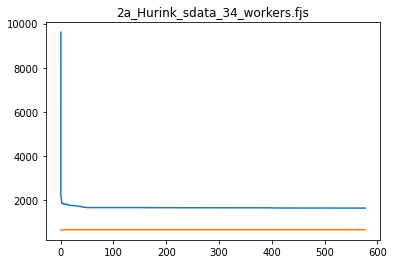

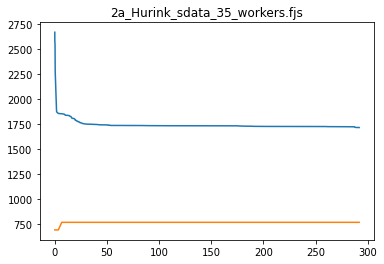

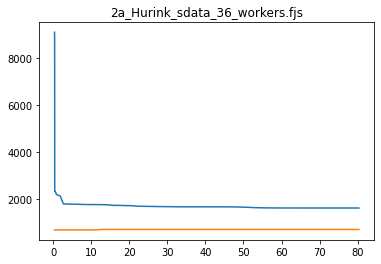

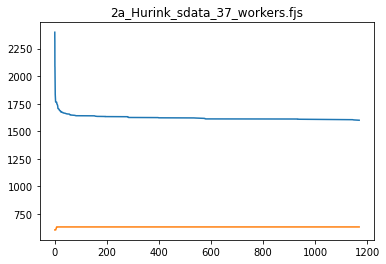

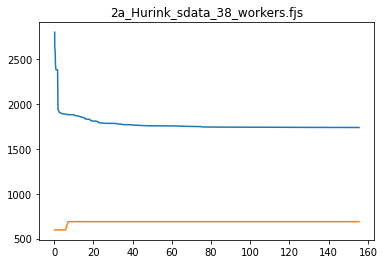

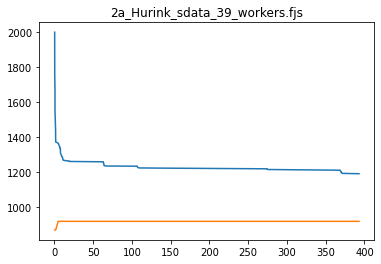

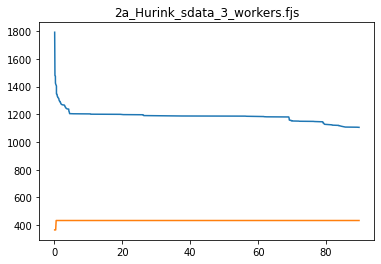

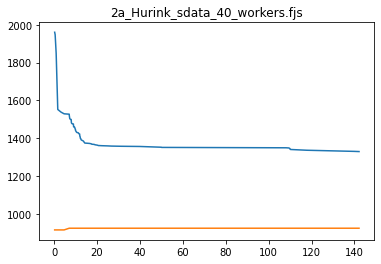

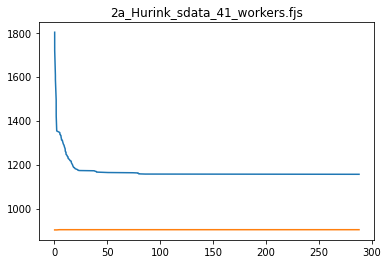

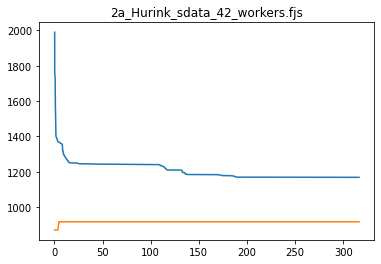

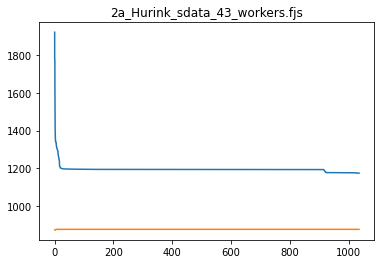

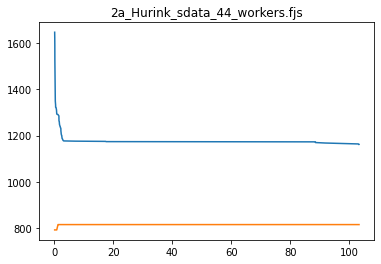

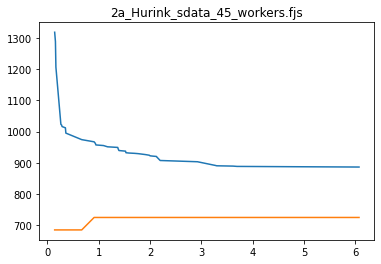

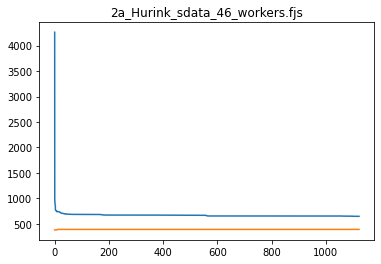

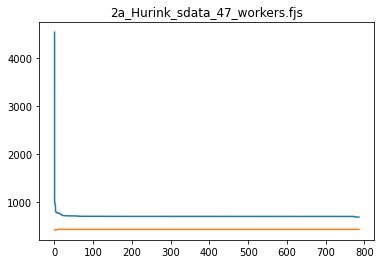

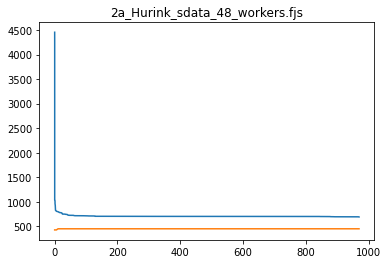

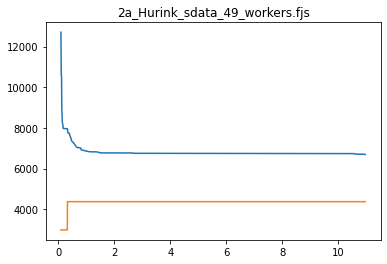

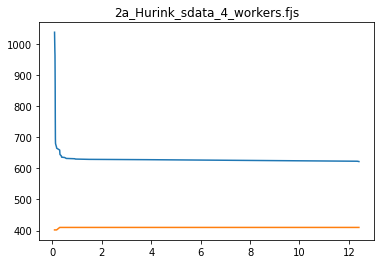

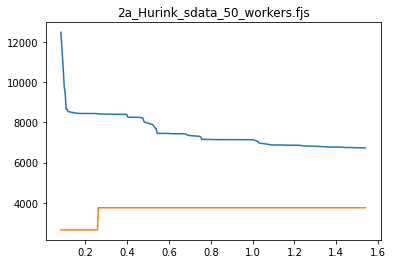

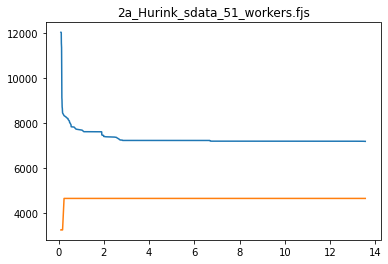

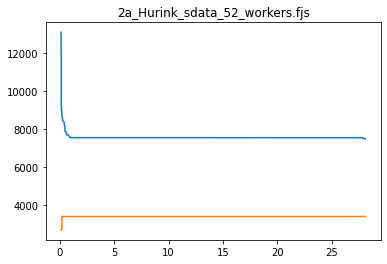

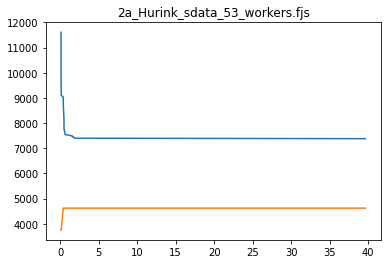

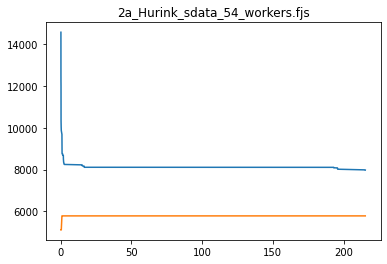

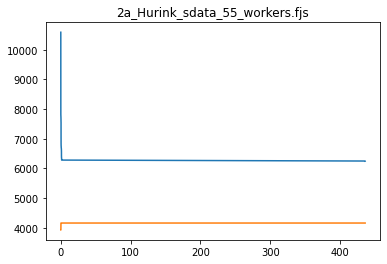

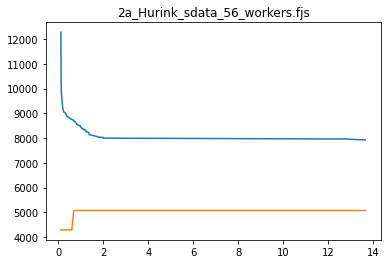

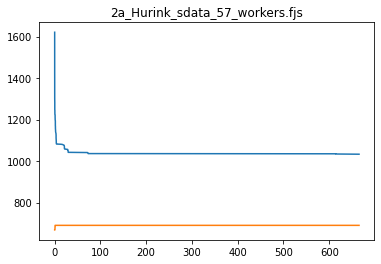

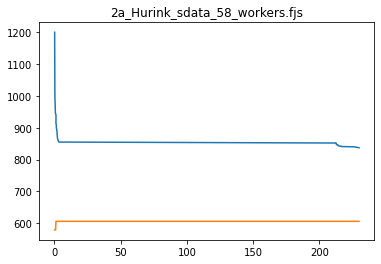

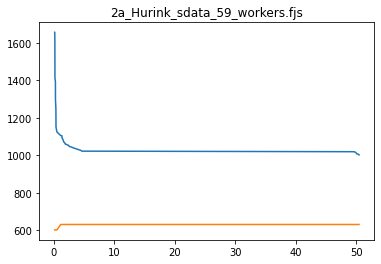

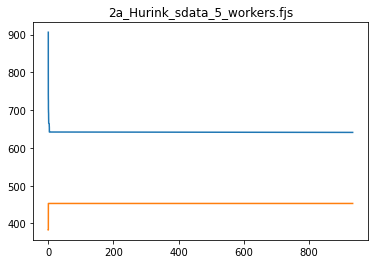

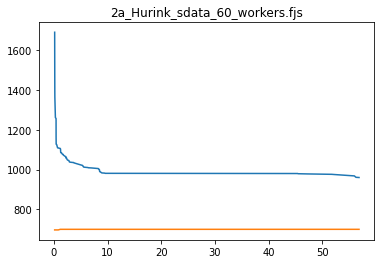

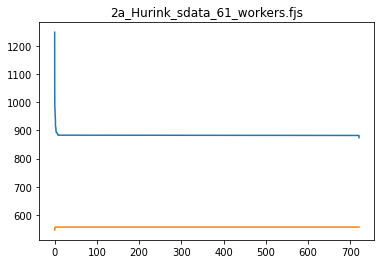

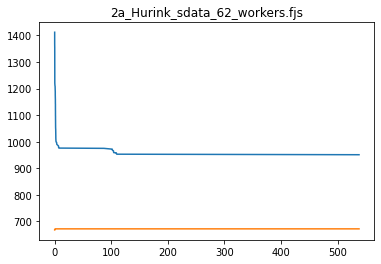

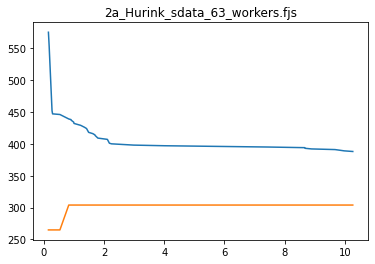

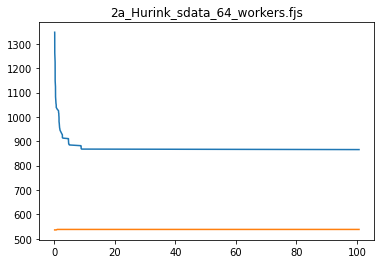

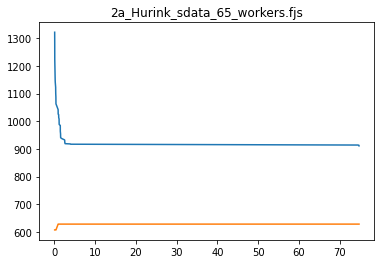

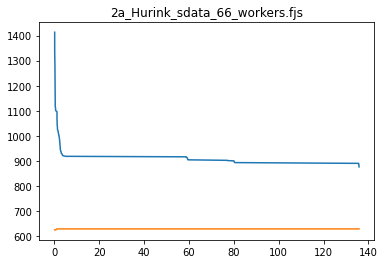

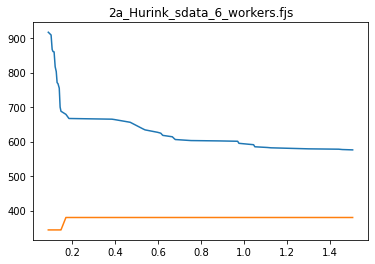

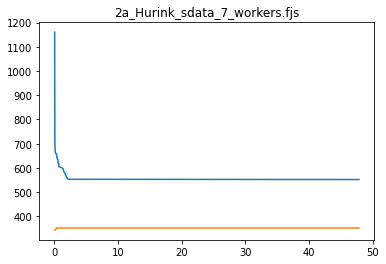

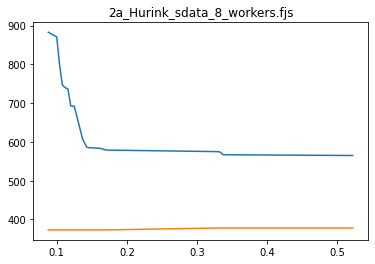

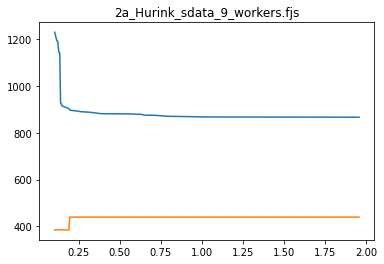

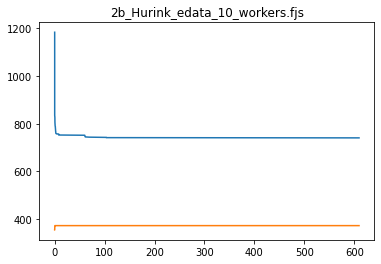

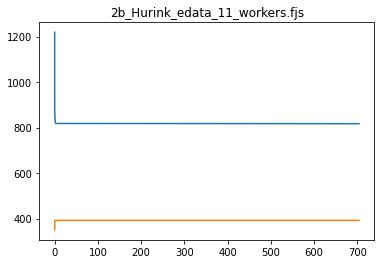

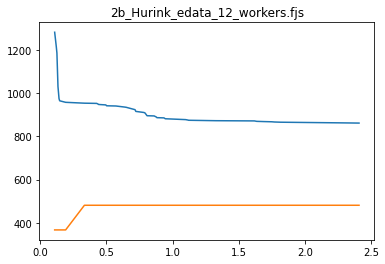

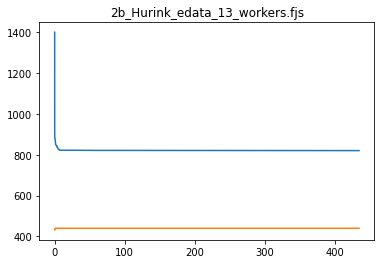

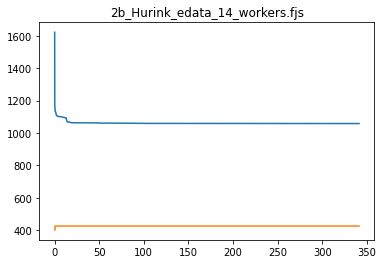

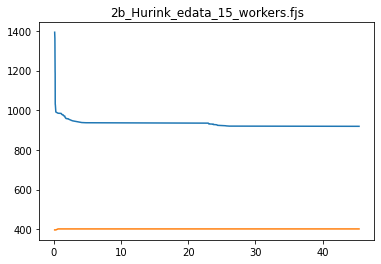

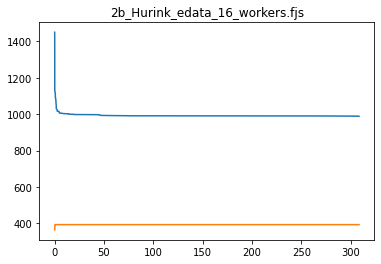

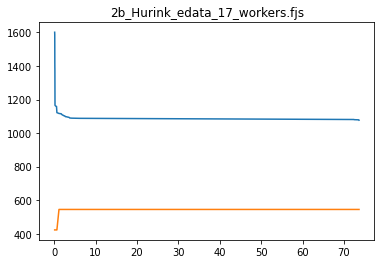

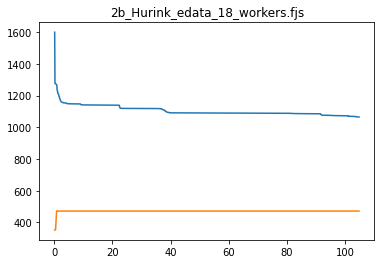

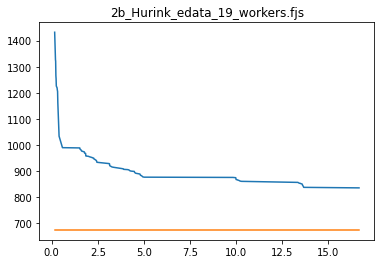

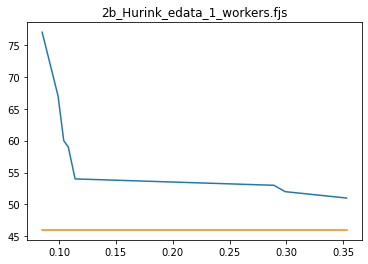

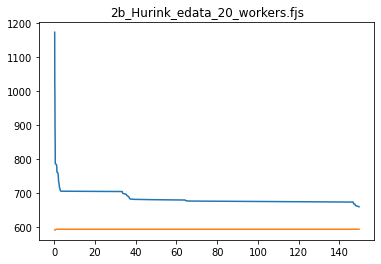

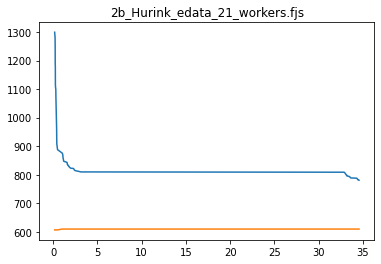

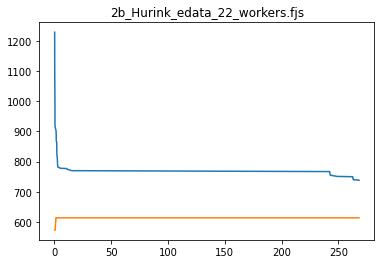

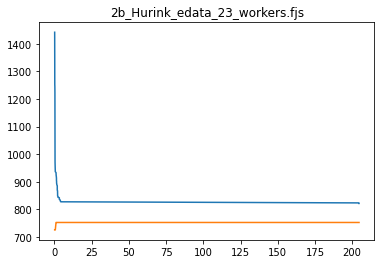

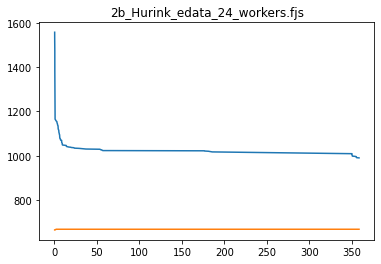

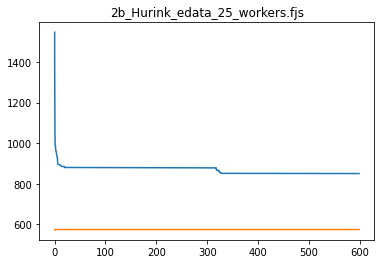

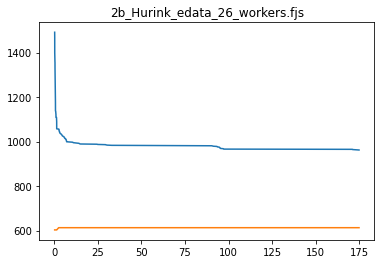

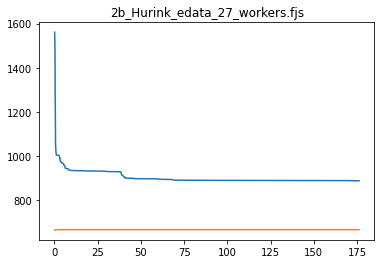

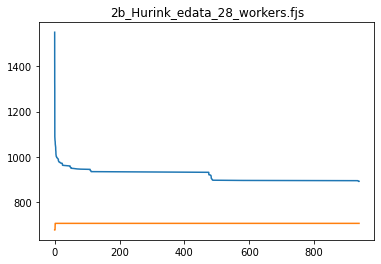

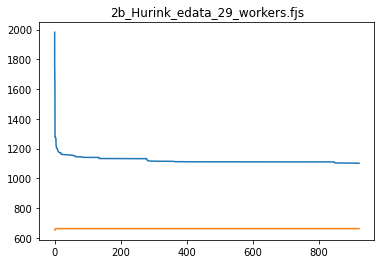

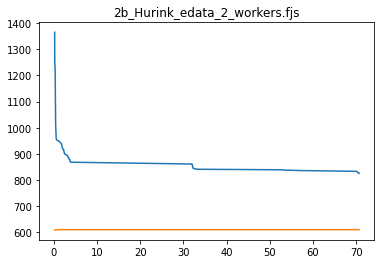

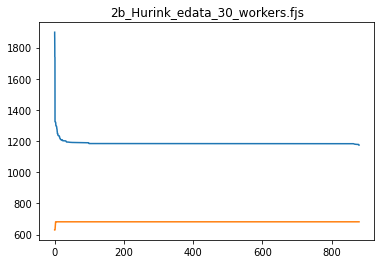

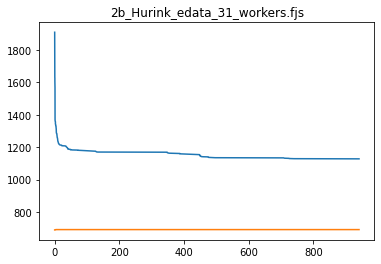

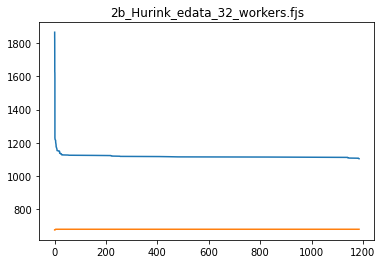

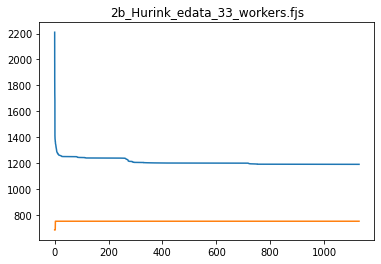

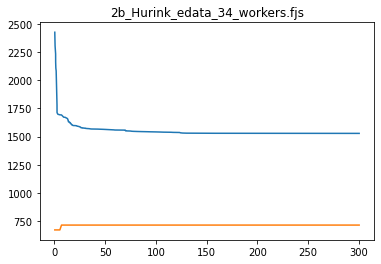

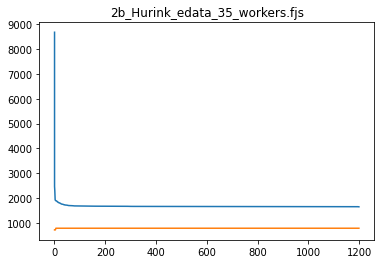

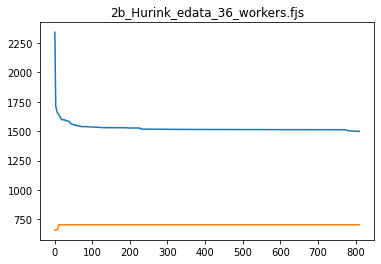

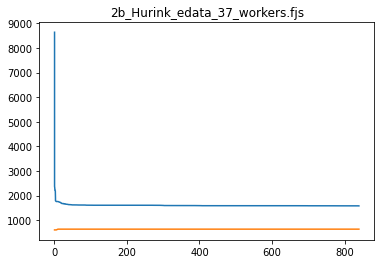

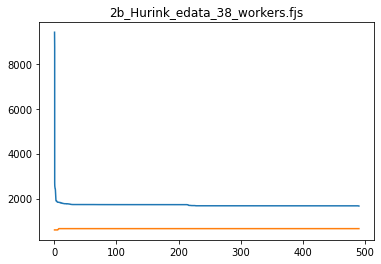

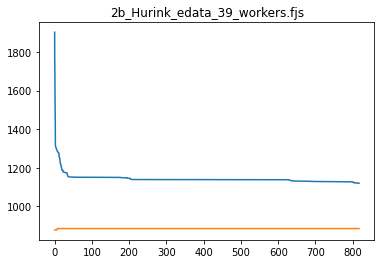

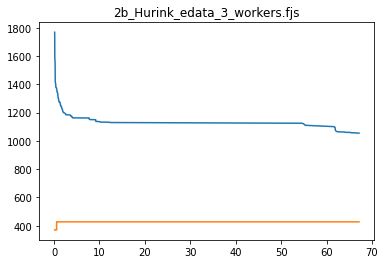

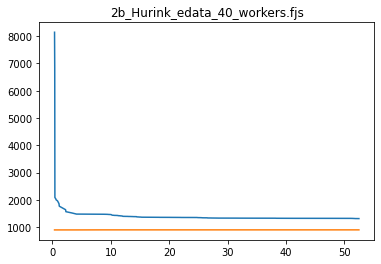

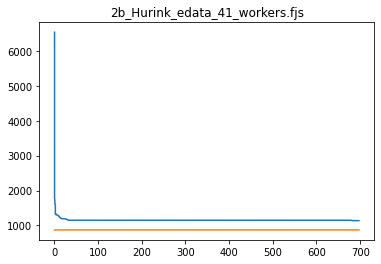

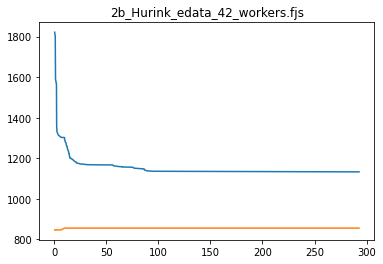

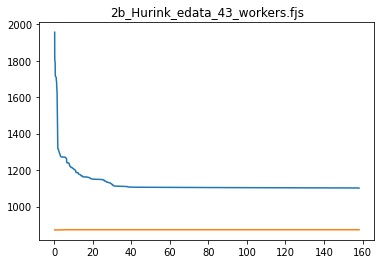

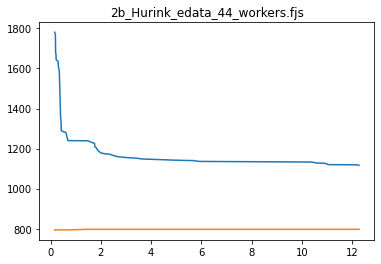

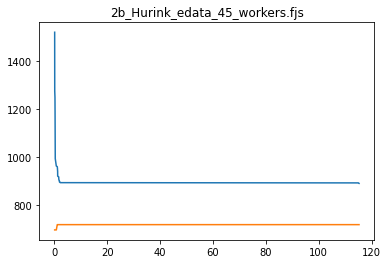

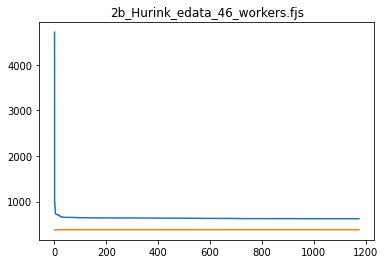

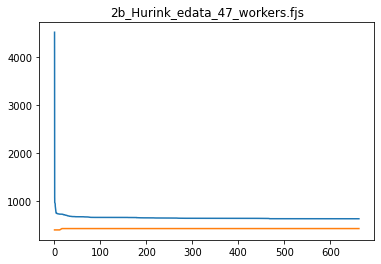

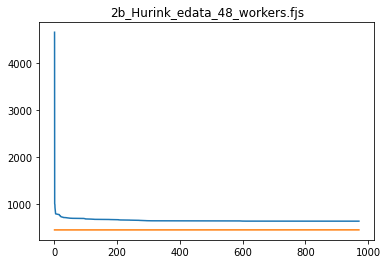

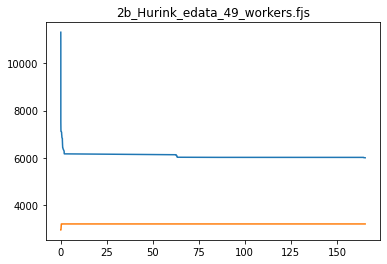

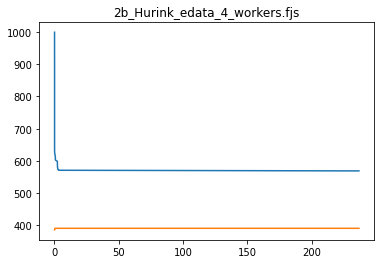

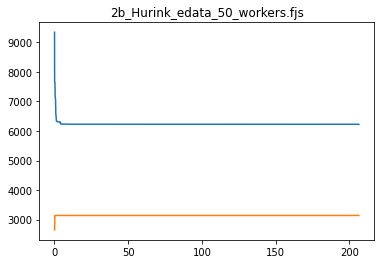

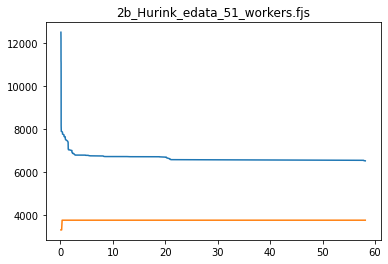

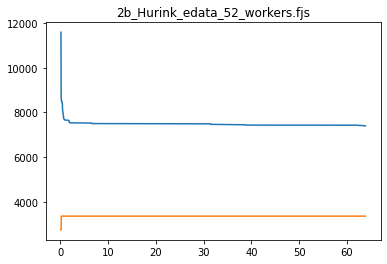

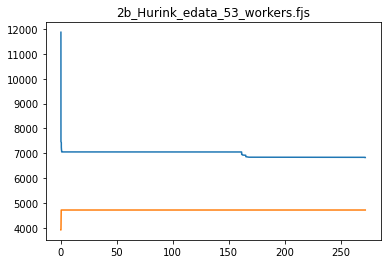

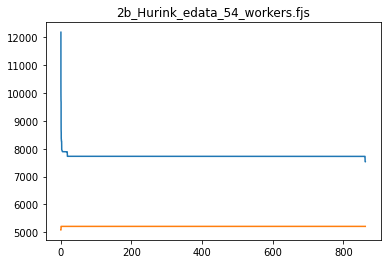

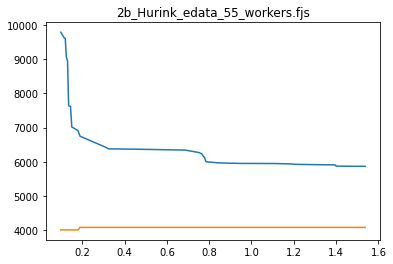

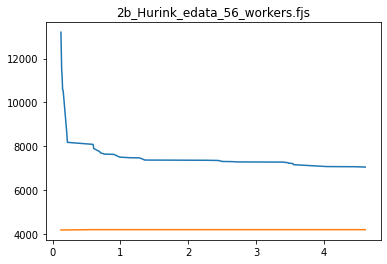

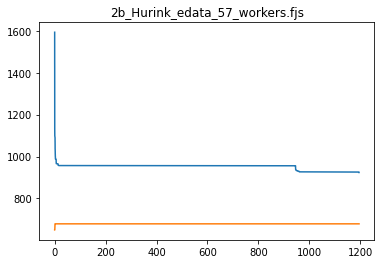

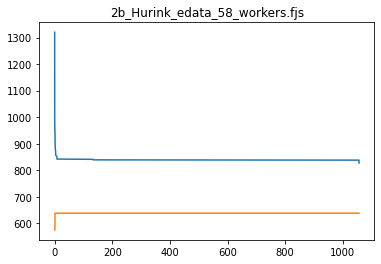

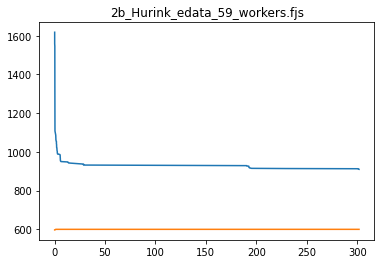

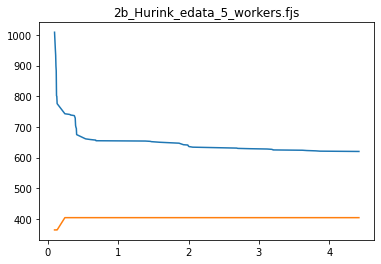

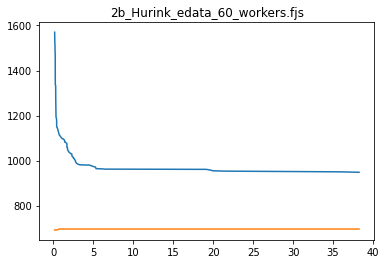

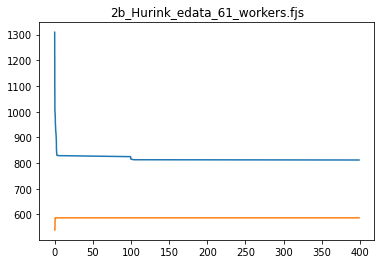

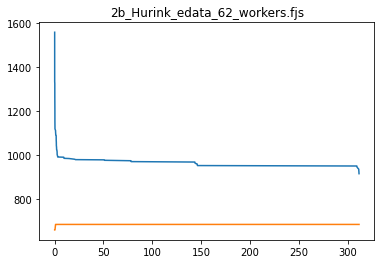

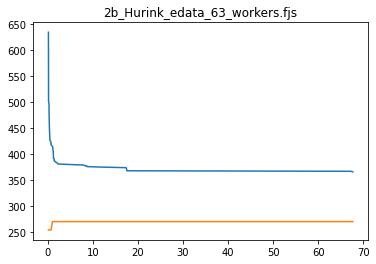

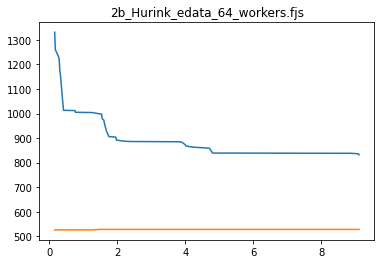

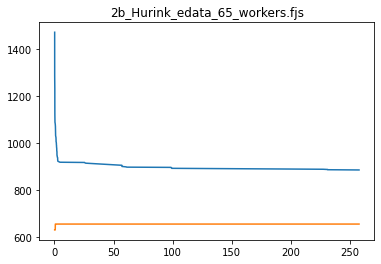

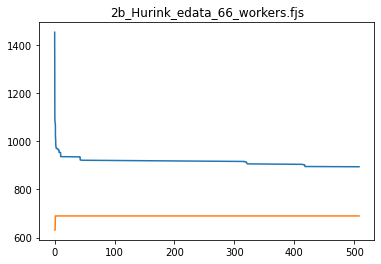

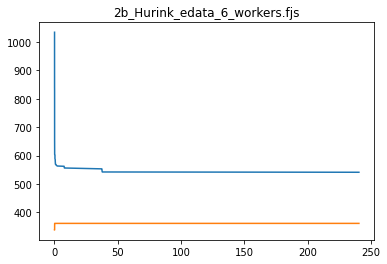

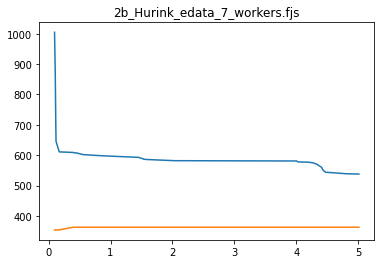

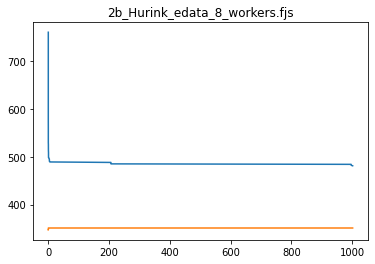

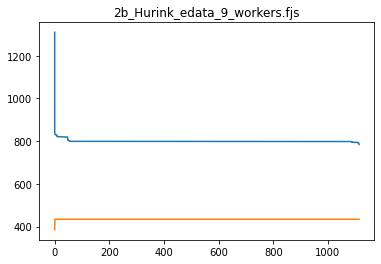

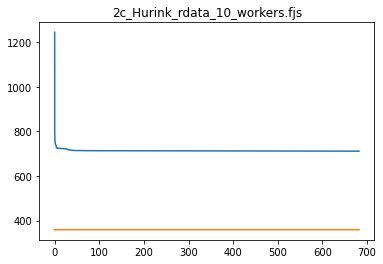

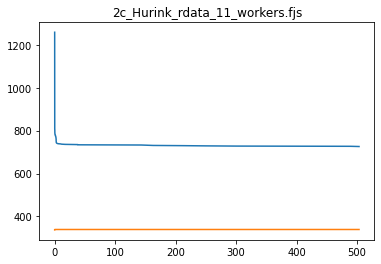

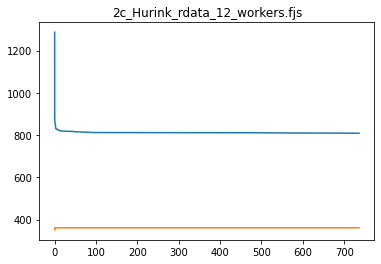

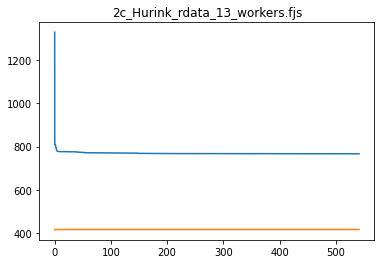

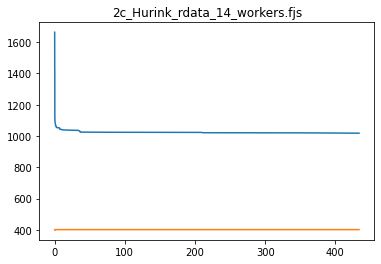

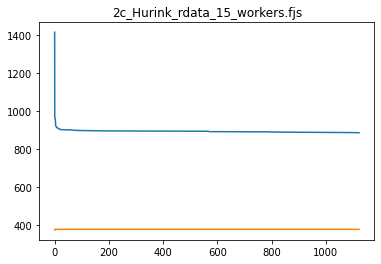

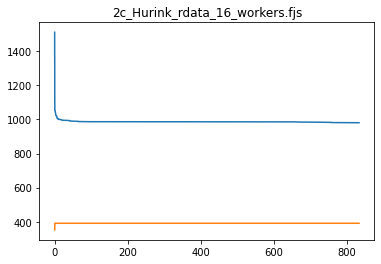

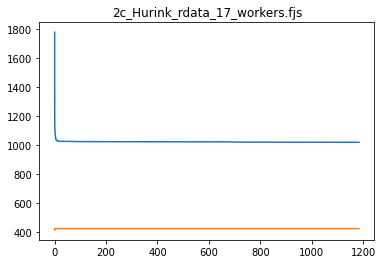

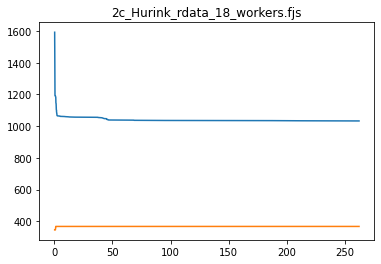

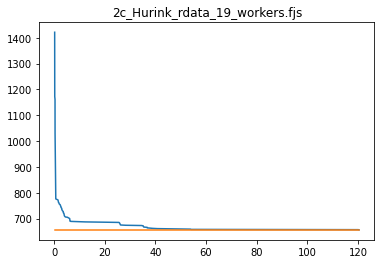

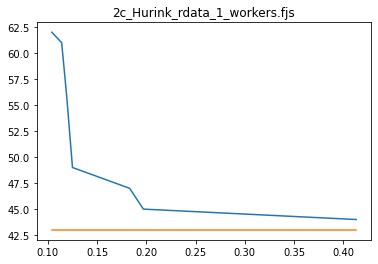

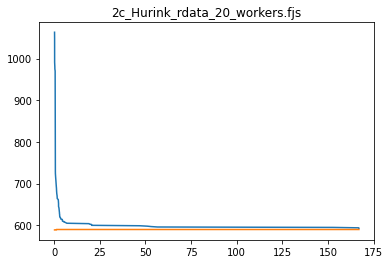

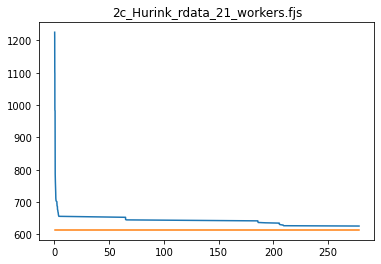

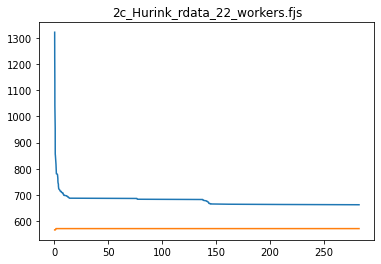

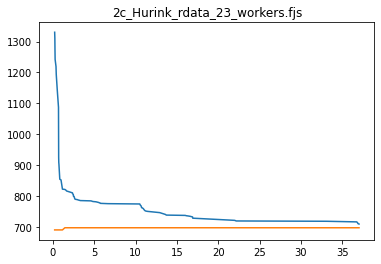

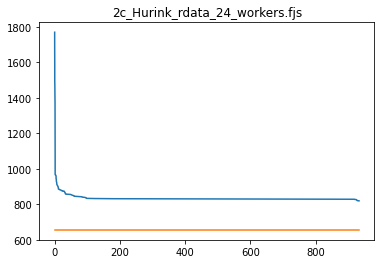

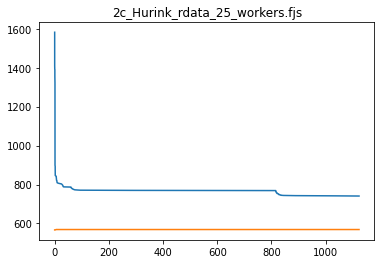

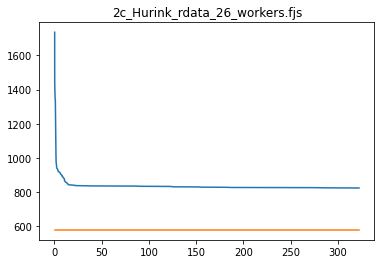

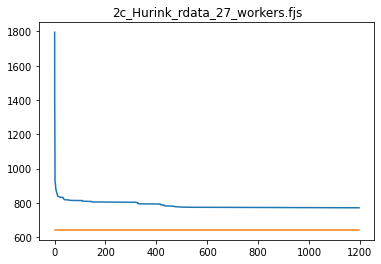

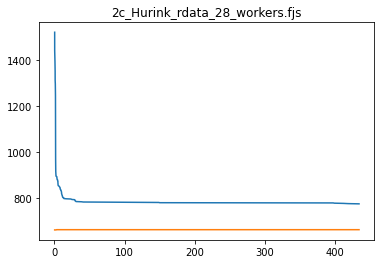

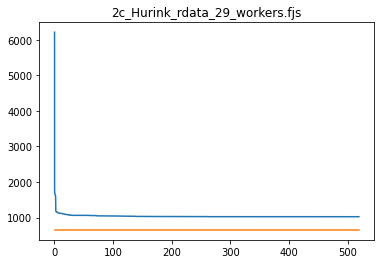

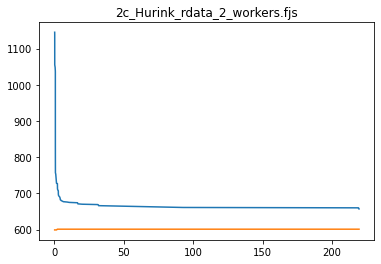

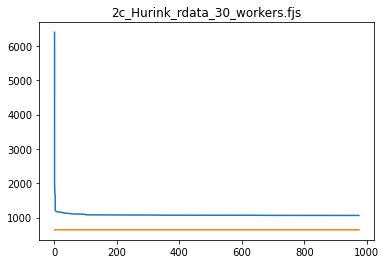

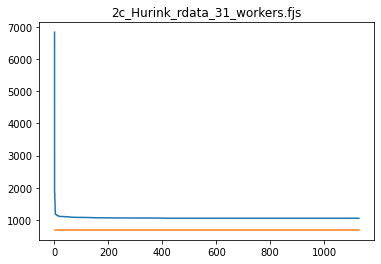

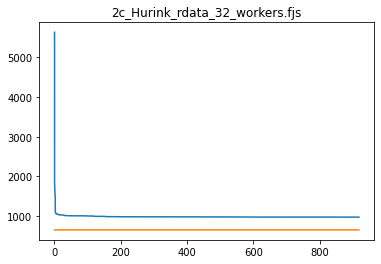

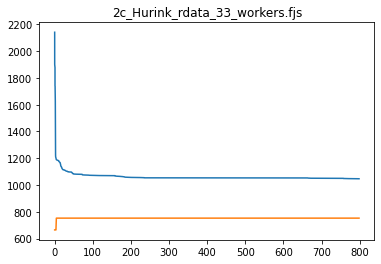

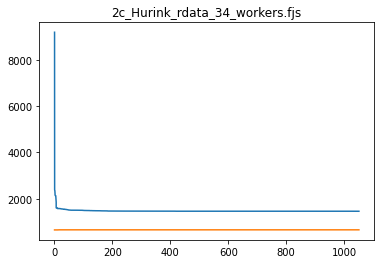

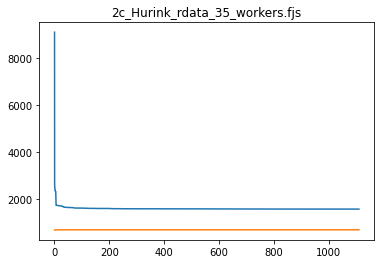

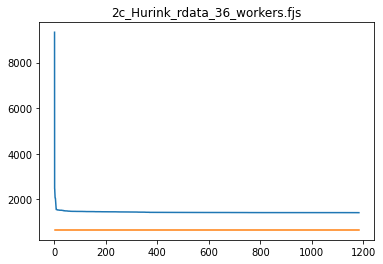

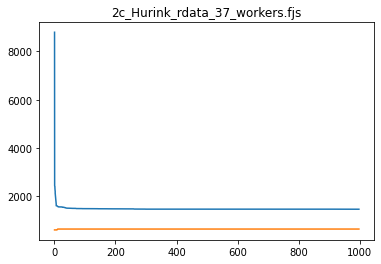

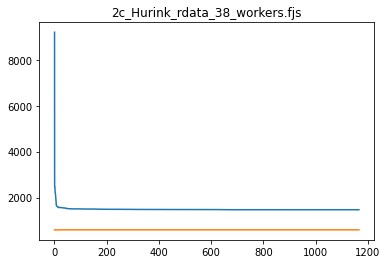

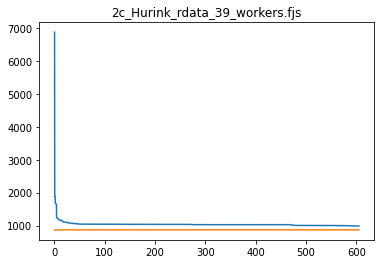

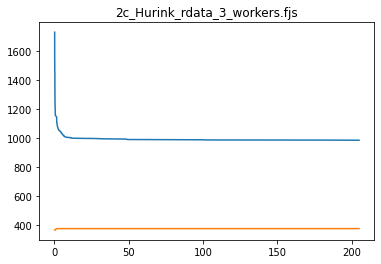

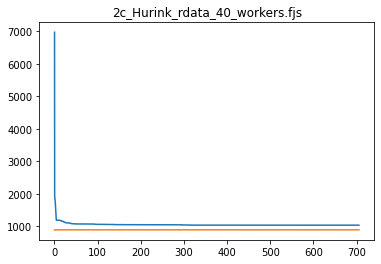

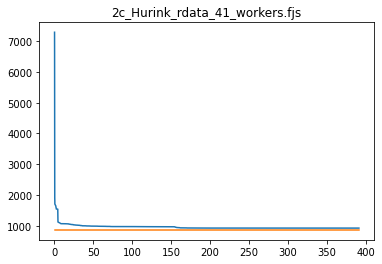

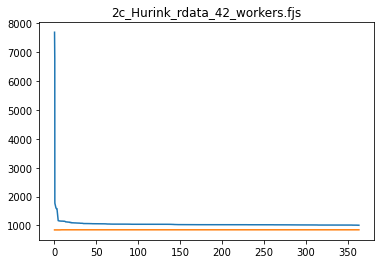

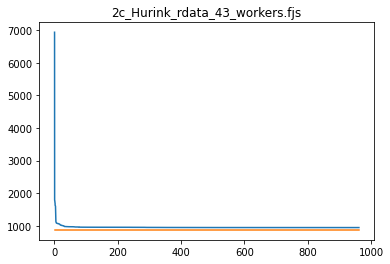

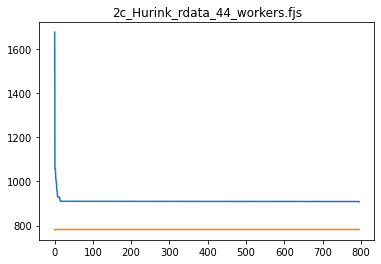

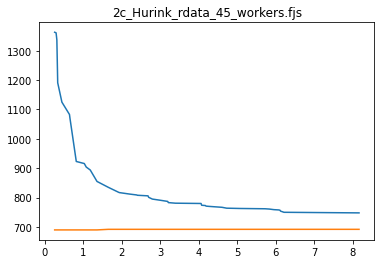

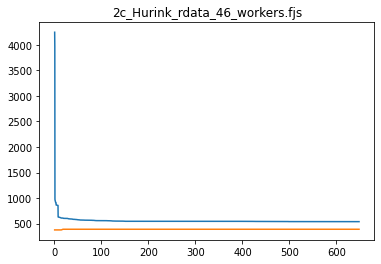

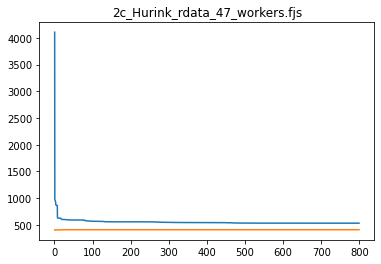

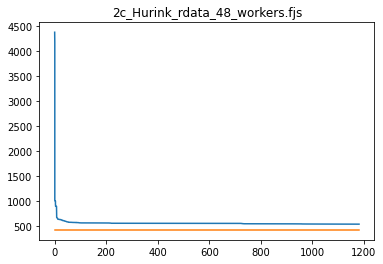

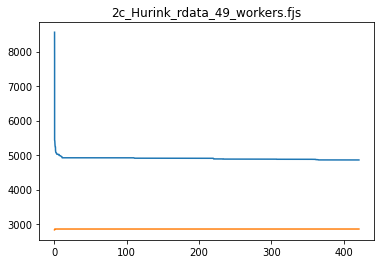

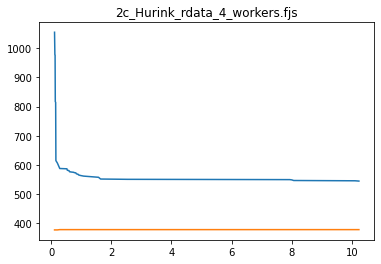

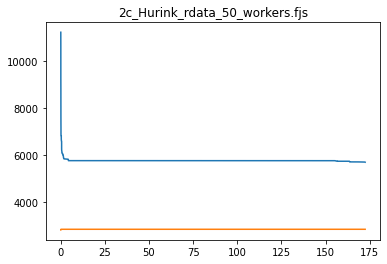

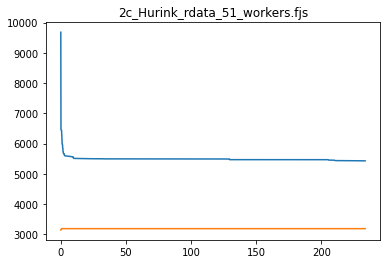

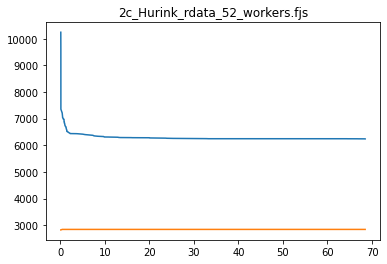

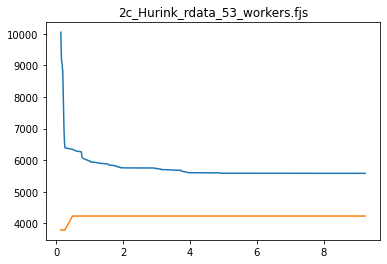

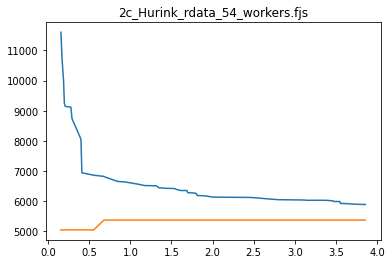

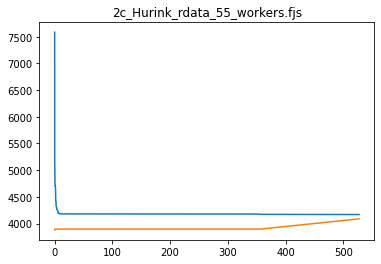

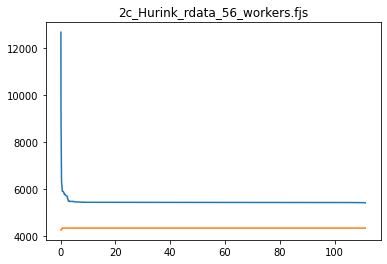

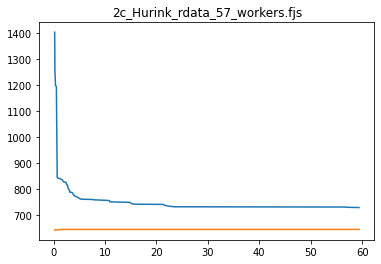

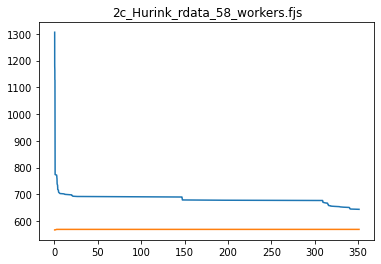

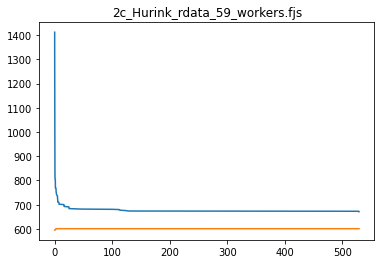

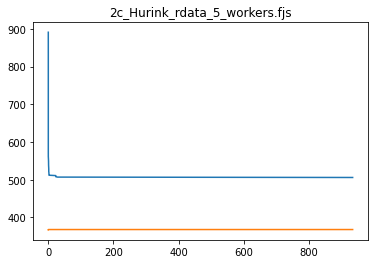

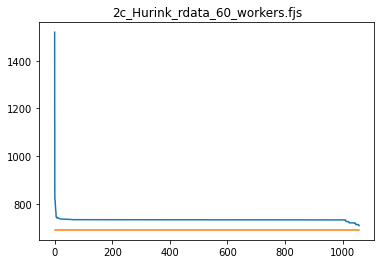

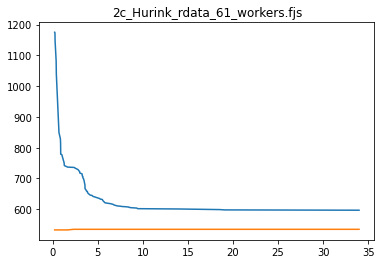

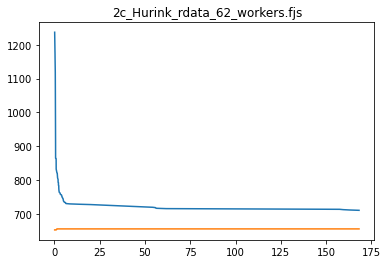

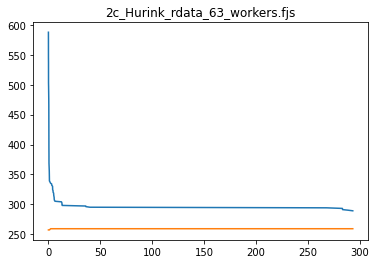

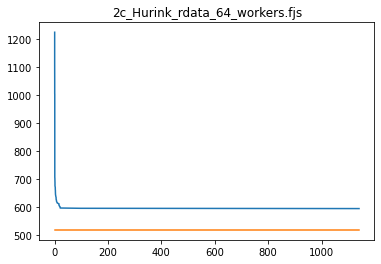

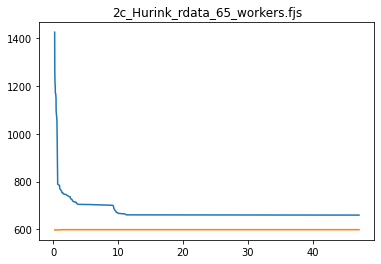

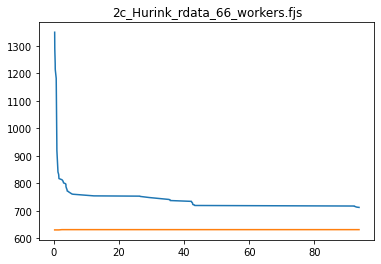

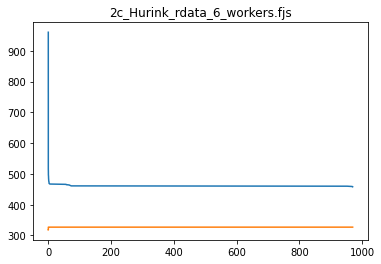

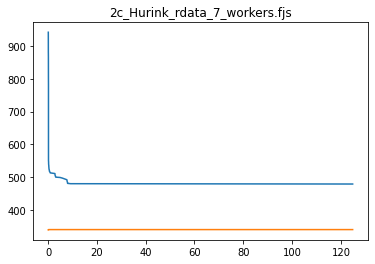

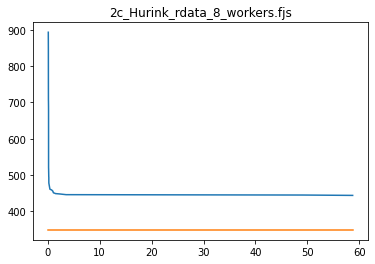

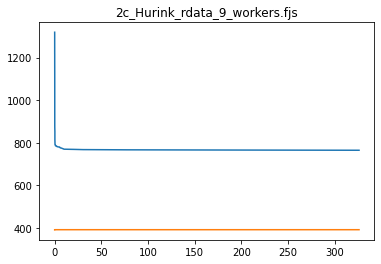

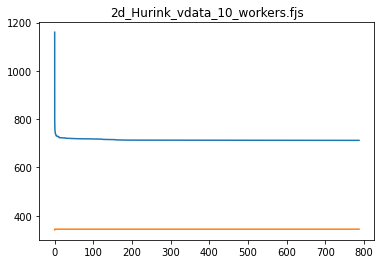

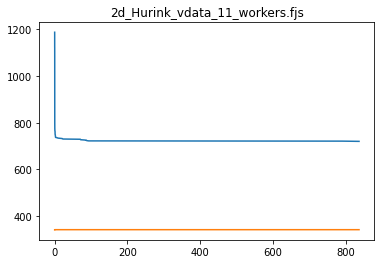

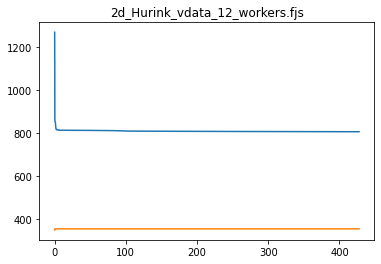

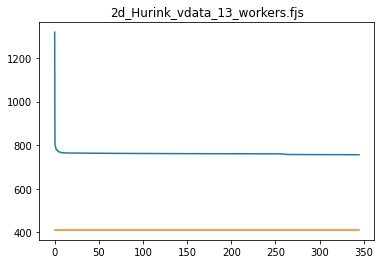

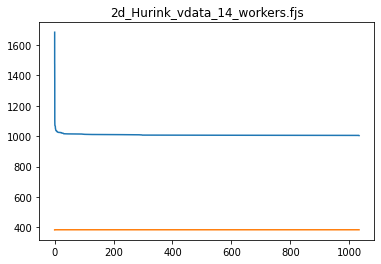

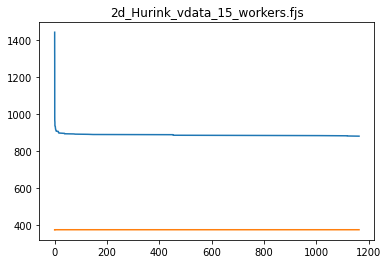

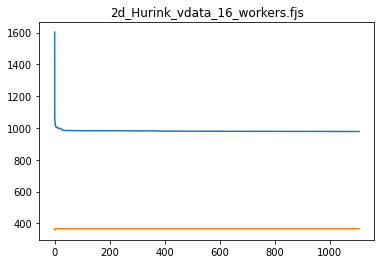

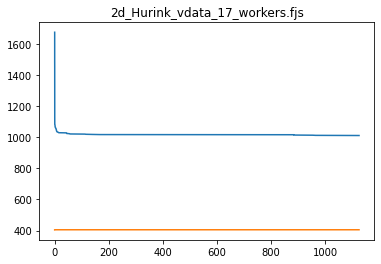

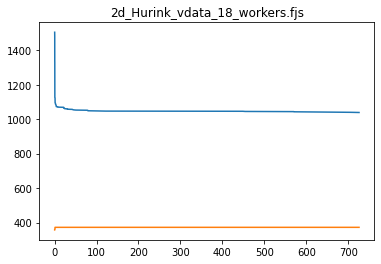

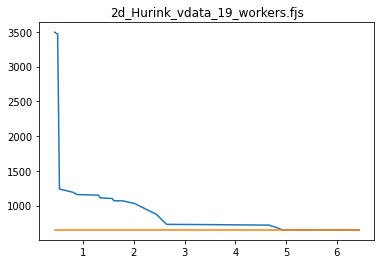

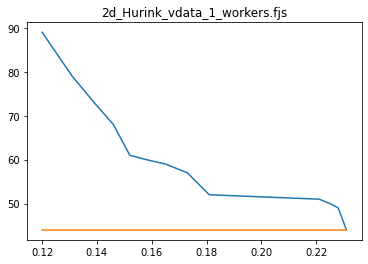

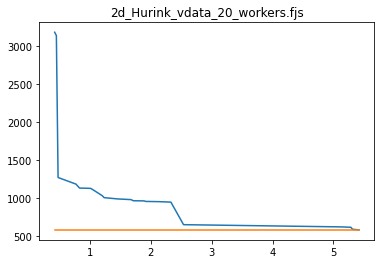

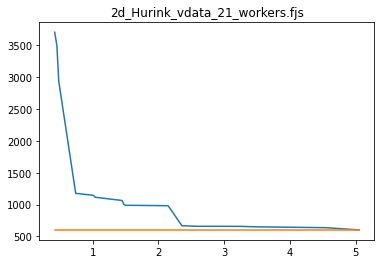

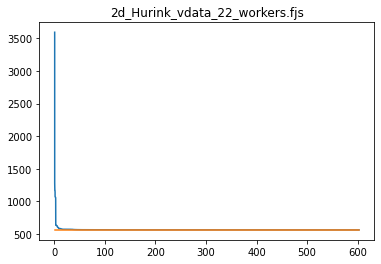

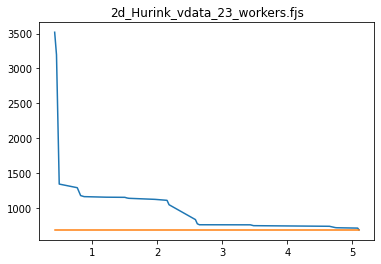

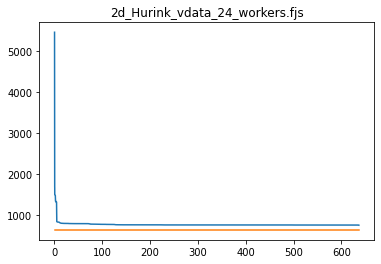

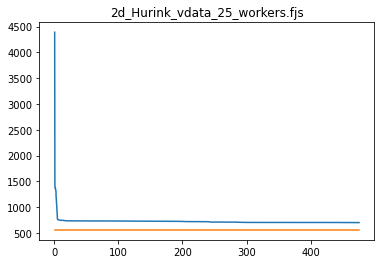

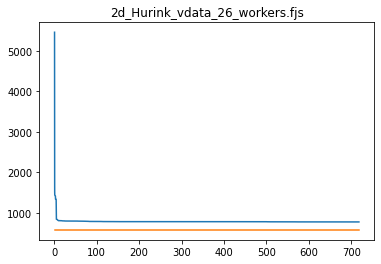

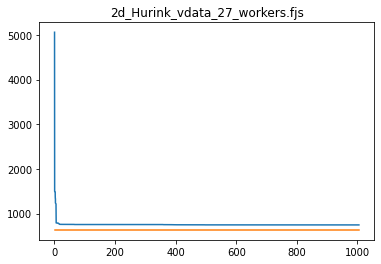

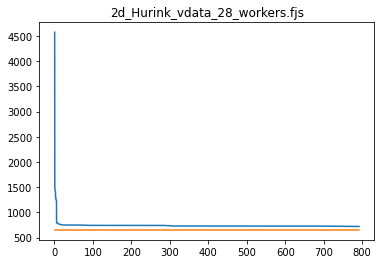

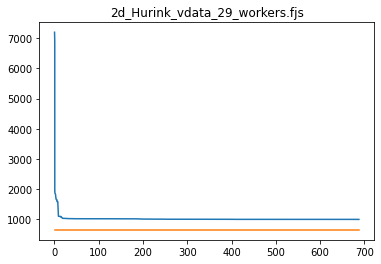

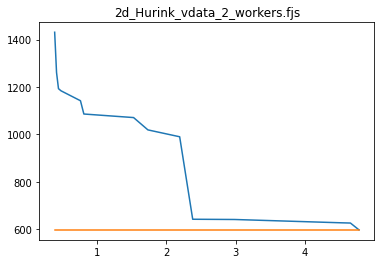

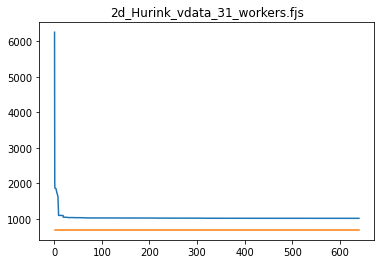

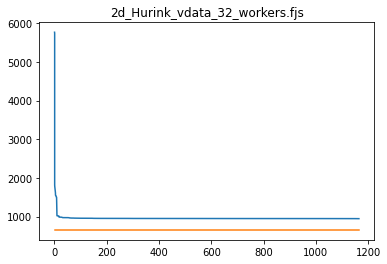

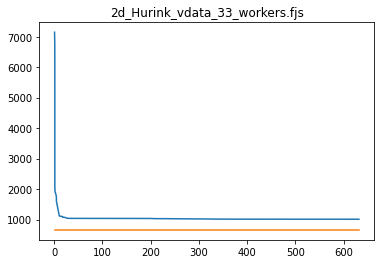

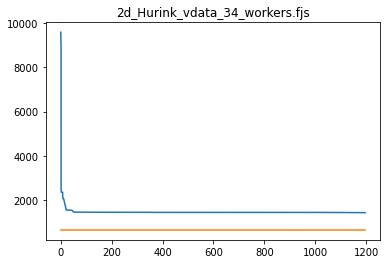

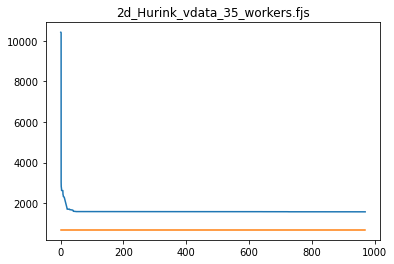

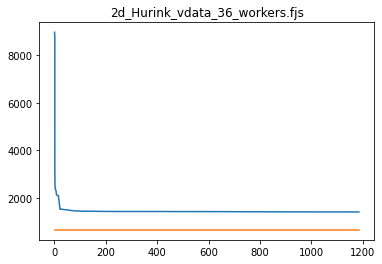

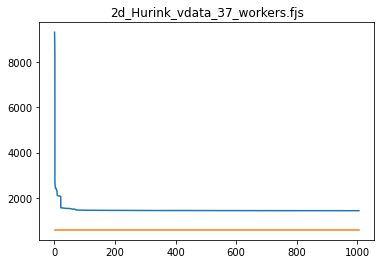

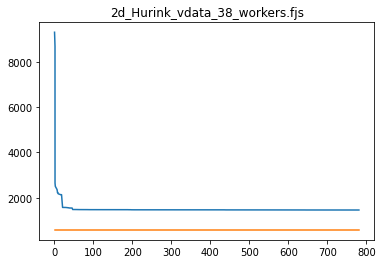

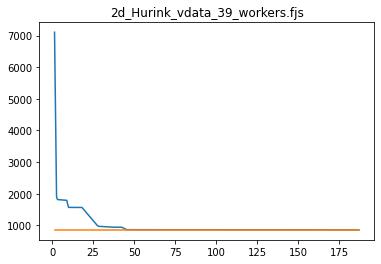

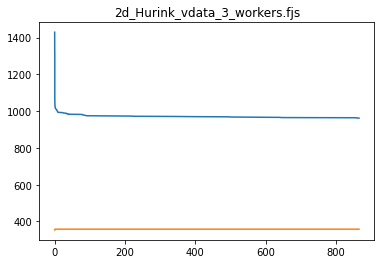

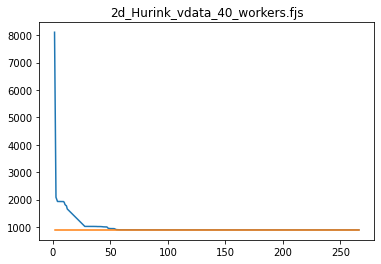

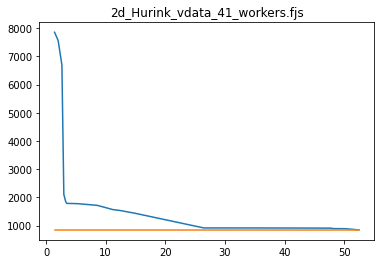

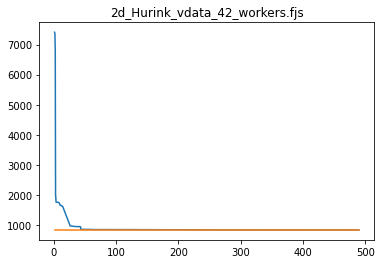

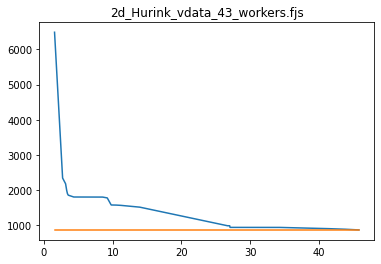

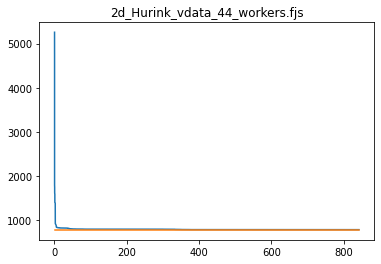

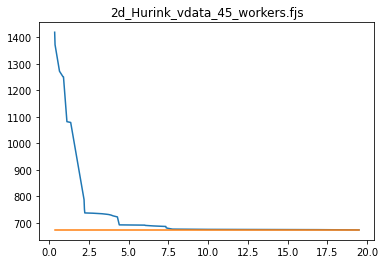

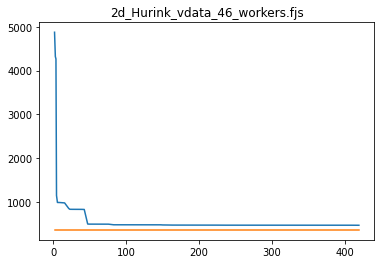

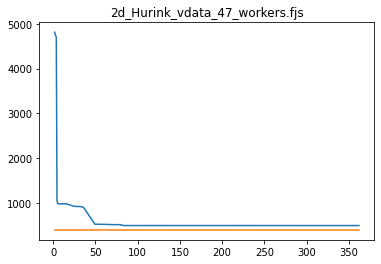

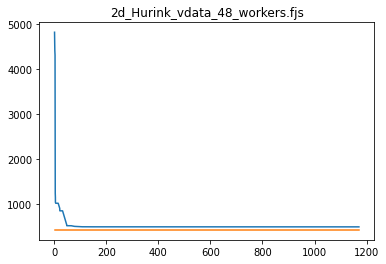

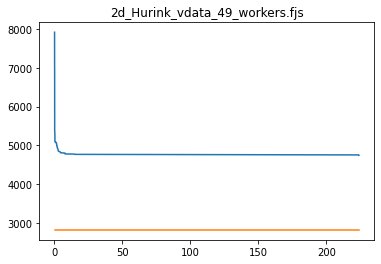

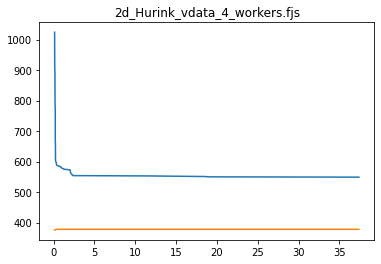

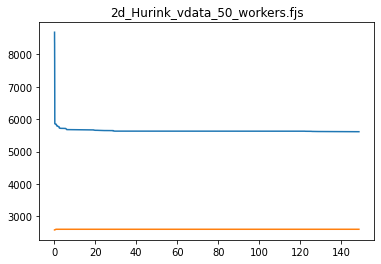

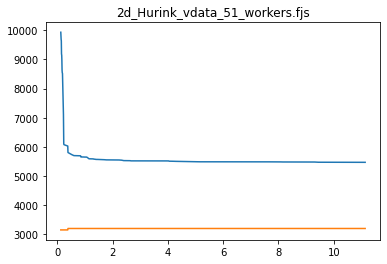

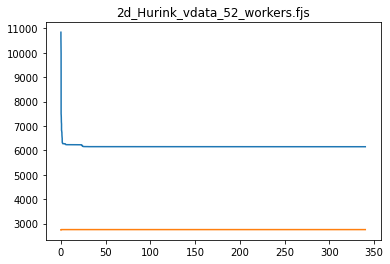

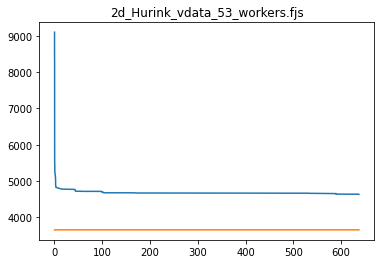

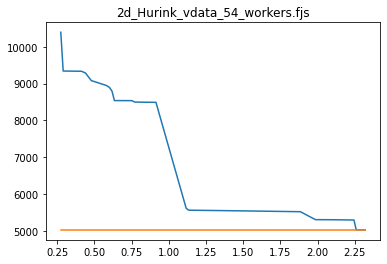

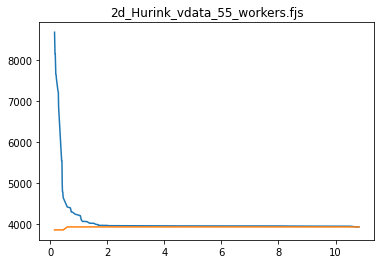

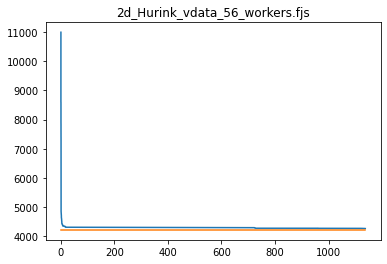

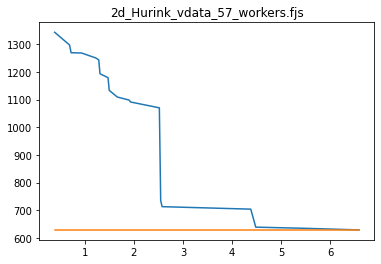

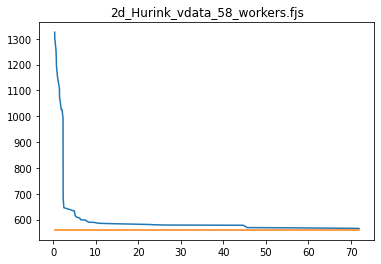

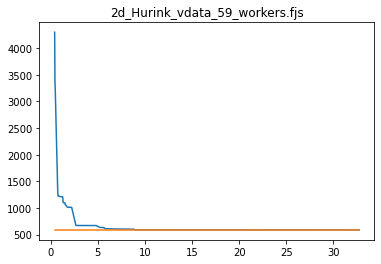

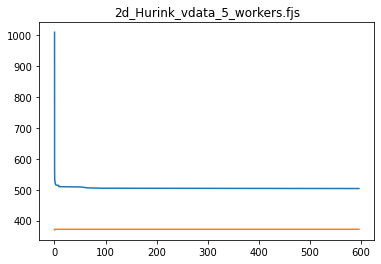

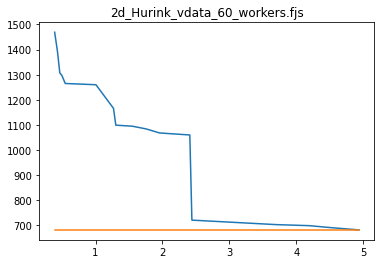

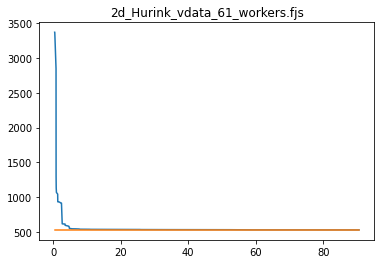

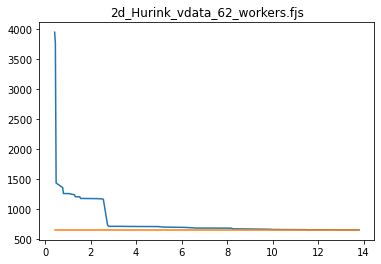

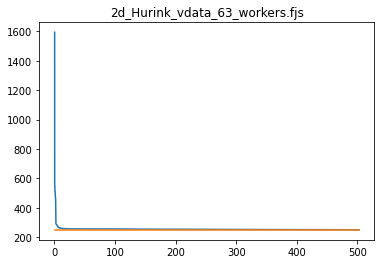

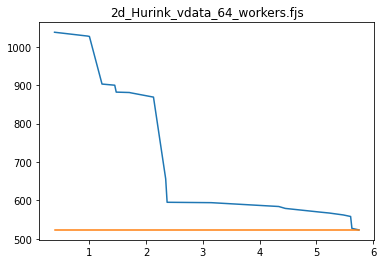

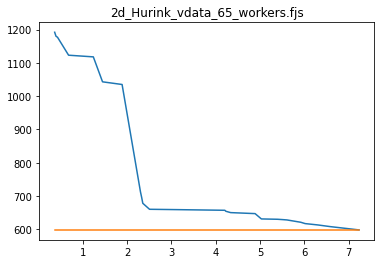

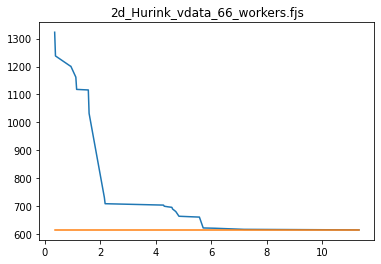

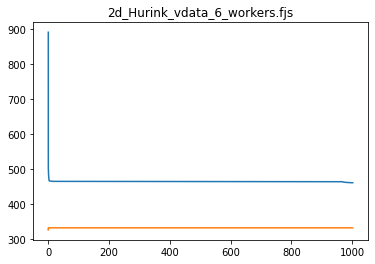

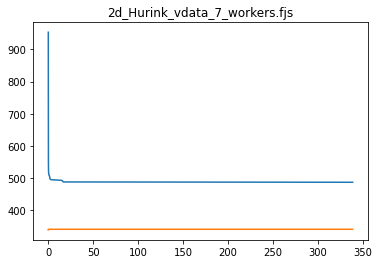

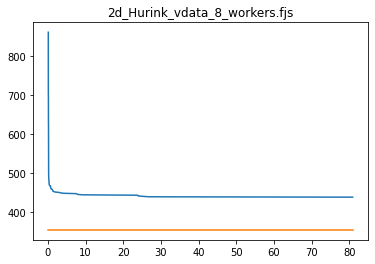

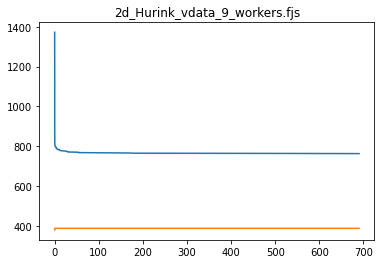

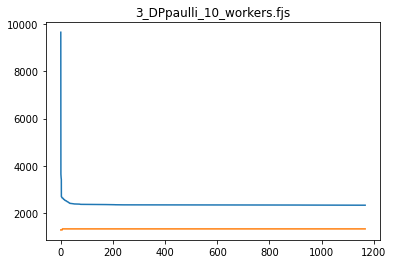

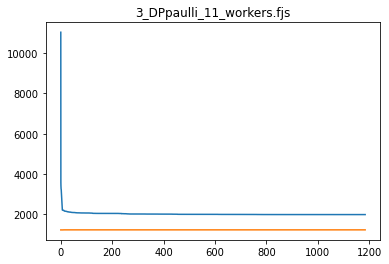

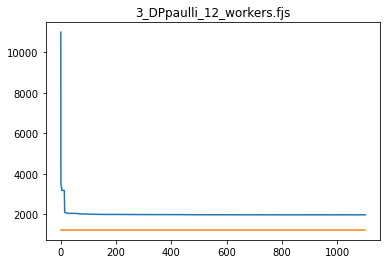

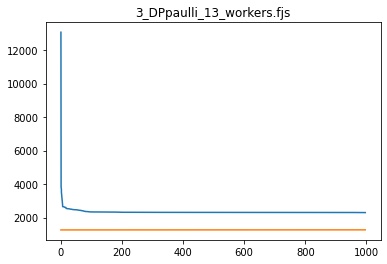

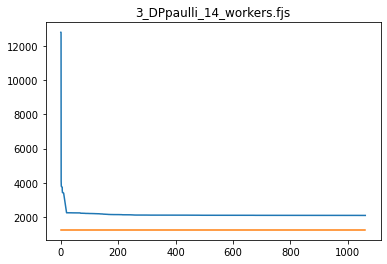

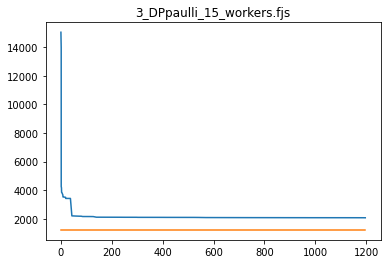

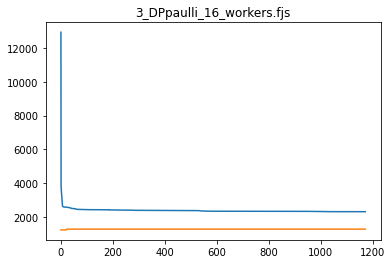

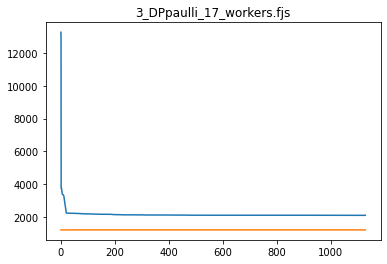

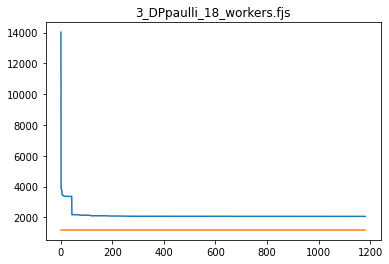

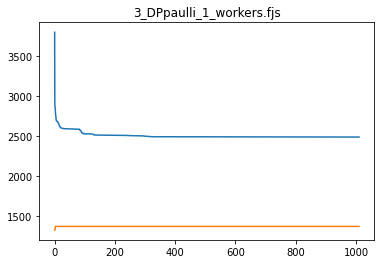

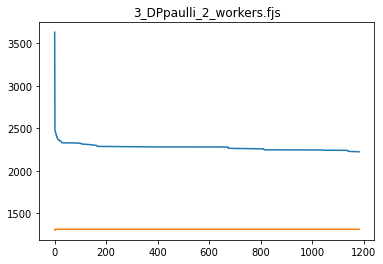

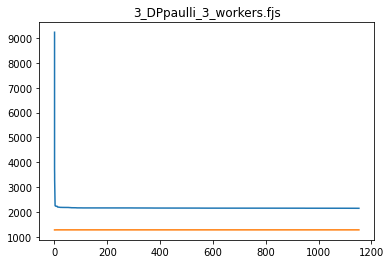

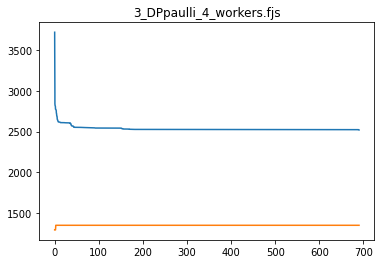

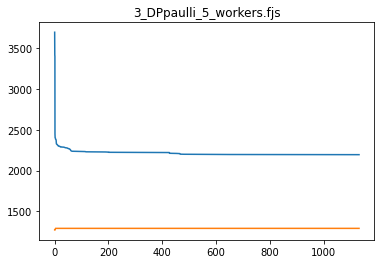

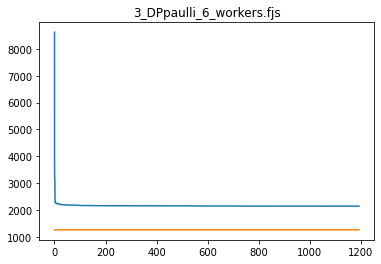

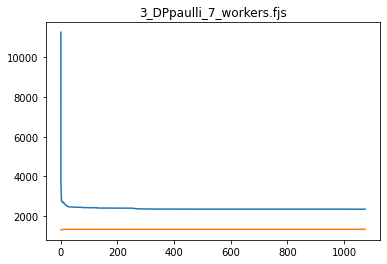

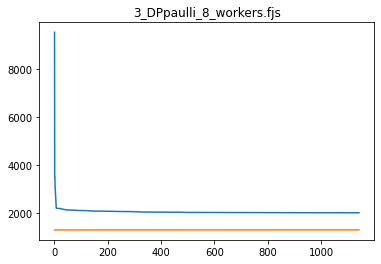

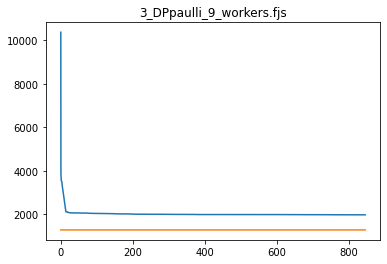

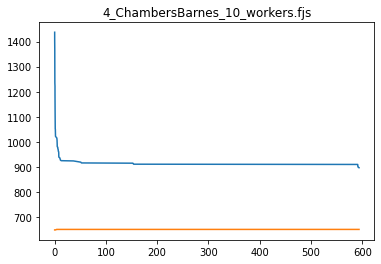

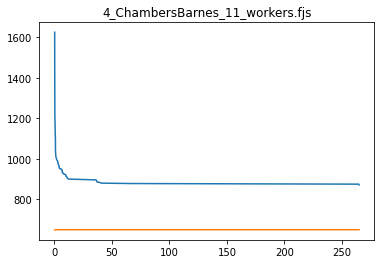

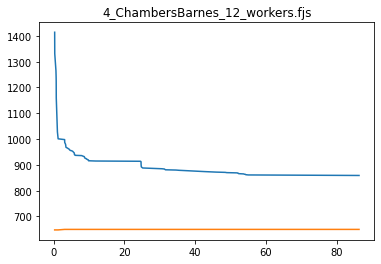

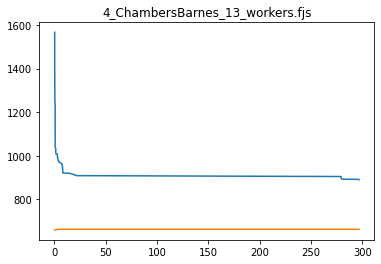

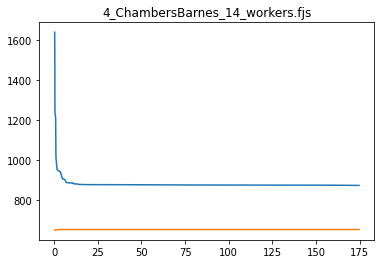

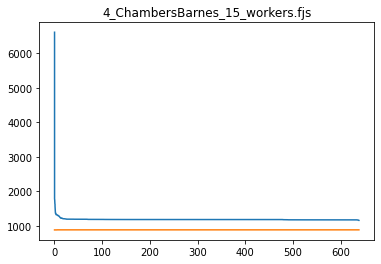

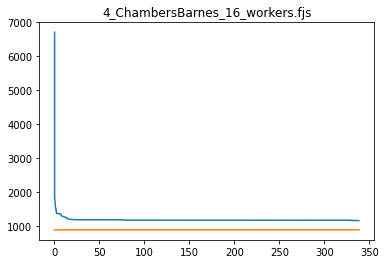

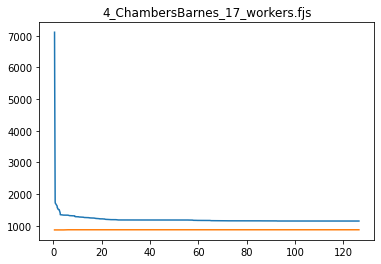

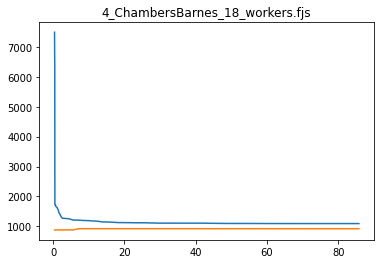

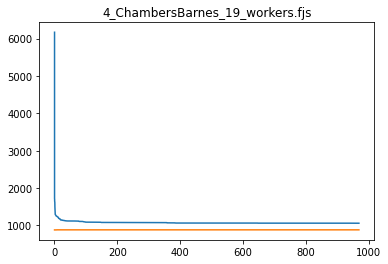

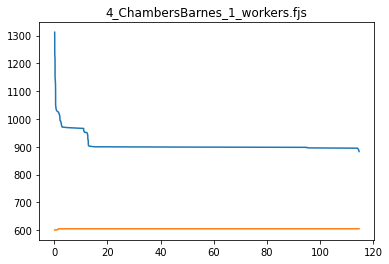

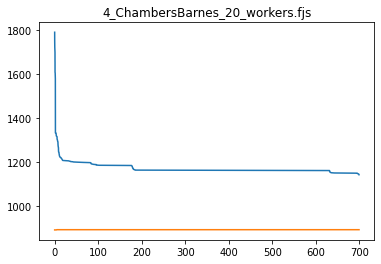

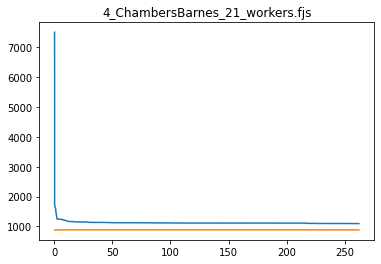

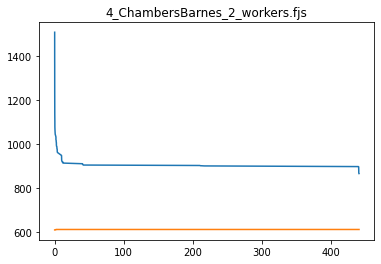

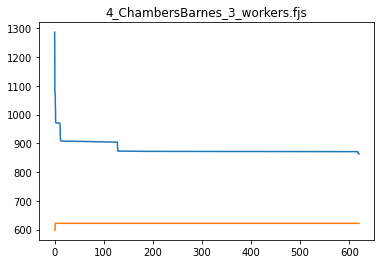

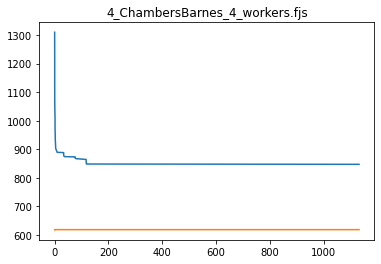

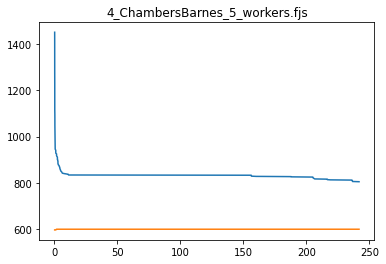

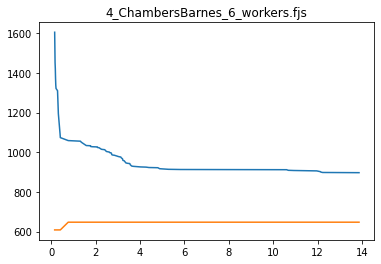

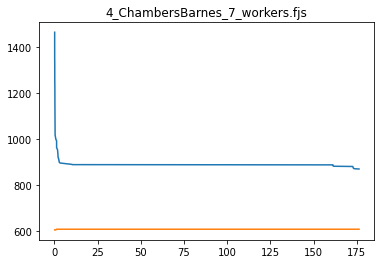

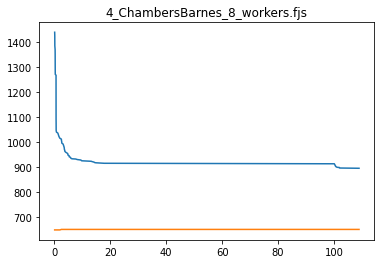

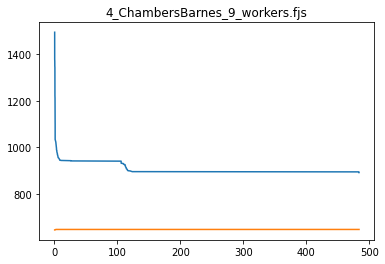

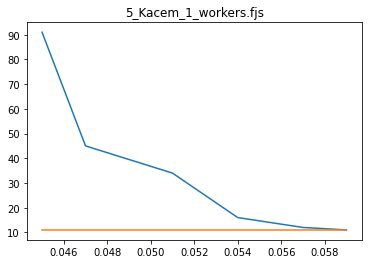

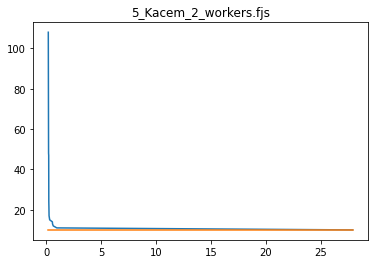

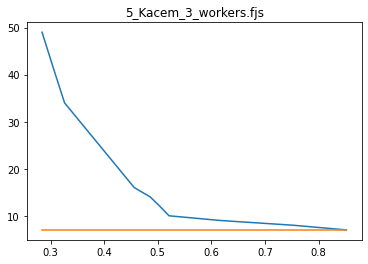

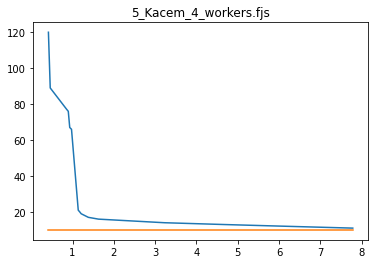

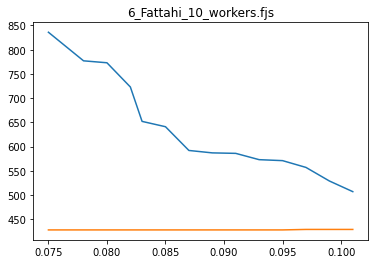

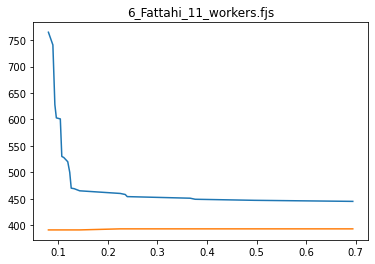

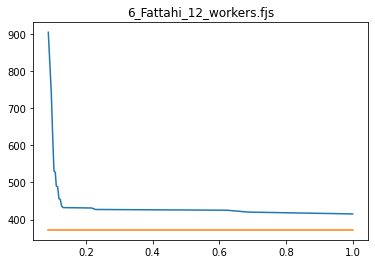

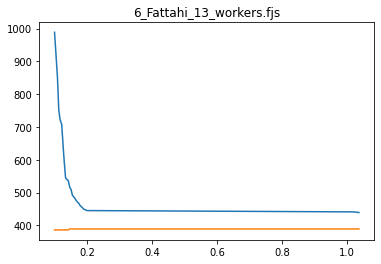

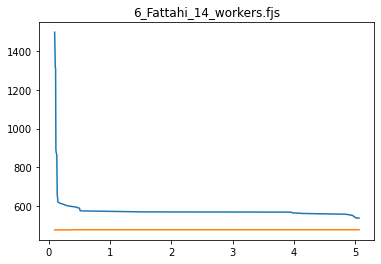

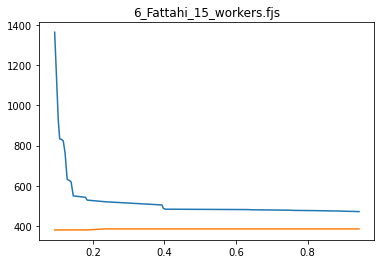

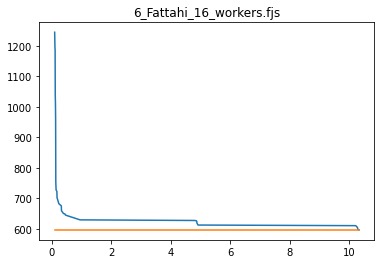

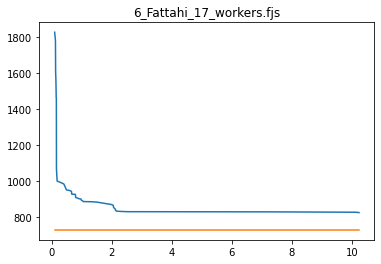

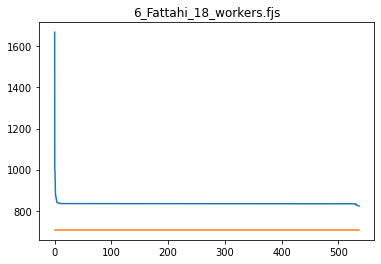

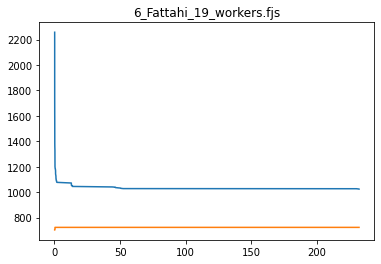

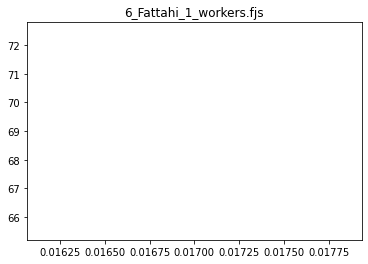

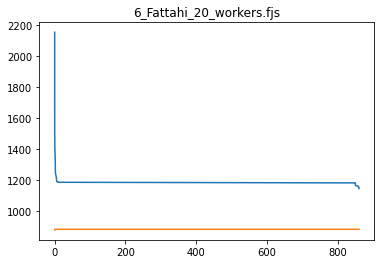

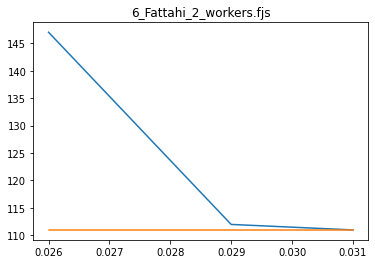

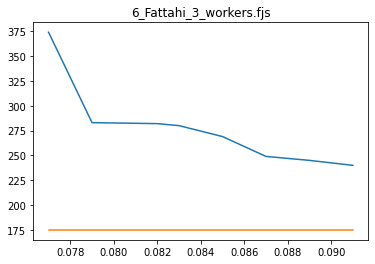

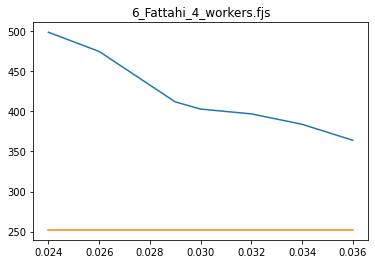

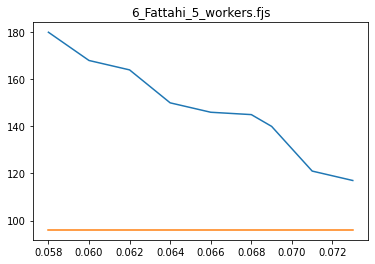

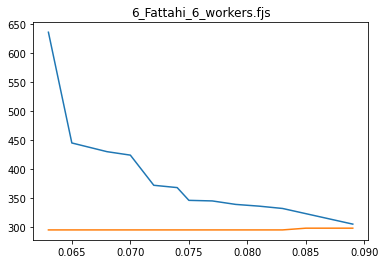

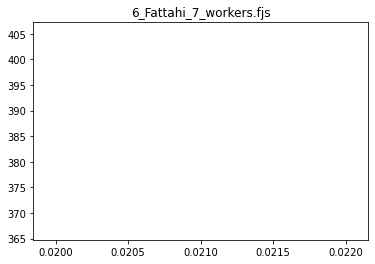

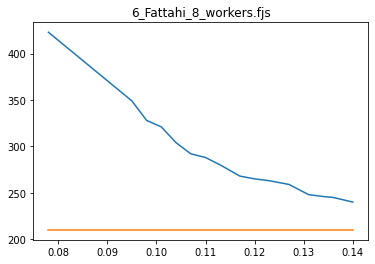

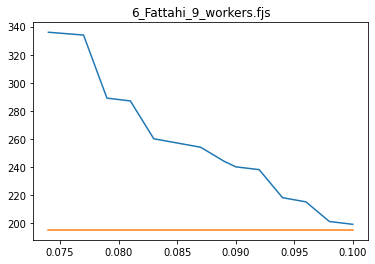

In [ ]:
# <timestamp, fitness, lower bound>
from ast import literal_eval

fig.suptitle(f'{file} - Fitness + LowerBounds')
for index, row in data.iterrows():
    #print(index)
    timestamps = []
    fitness = []
    lower_bound = []
    #print(row['best_result_history'])
    try:
        values = pd.eval(row['best_result_history'])
        for entry in values:
            
            timestamps.append(entry[0])
            fitness.append(entry[1])
            lower_bound.append(entry[2])
        #axs[int(index / cols), index % cols]
        plt.title(f'{row["name"]}')
        plt.plot(timestamps, fitness)
        plt.plot(timestamps, lower_bound)
        plt.show()
    except:
        #print(row)
        pass
#plt.tight_layout()
